Class for audio spliting 

In [3]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import librosa
from librosa import display
import progressbar
import soundfile as sf

In [0]:
class Data_cutting():
  def __init__(self, input_path, output_path, mint_t = 0.01):
    self.data_paths = [input_path+ "/" + i for i in os.listdir(input_path)]
    self.out_put_path = output_path
    self.file_quantity = len(self.data_paths)
    self.min_time = mint_t


  
  def data_generator(self):# create data genetaor to open wav files in one folder
    for i in self.data_paths:
      print(i)
      data, rate = librosa.load(i)
      try:
        yield np.mean(data, axis=1), rate
      except IndexError:
        yield data, rate


  def envelope(self,y, rate, threshold):# function for detecting silence 
    print("starting envelope\n")        # by marking time span with low vlaue of 
    min_time = self.min_time*y.shape[0] # mean of absolute amplitude 
    window = int(min_time)
    mask = []
    k = 0
    with progressbar.ProgressBar(max_value=y.shape[0]) as bar:
      yy = pd.Series(y).abs()
      roll = yy.rolling(window,1, True).mean()
      for j in roll:
        if j > threshold:
          mask.append(1)
        else:
          mask.append(0)
        bar.update(k)
        k += 1
    return np.array(mask)
  
  def energy(self,y, rate, threshold):# funtion for detecting silence 
    print("starting envelope\n")      # by marking time with low vlue of
    min_time = self.min_time*y.shape[0] # energy density
    window = int(min_time)
    mask = []
    k = 0
    with progressbar.ProgressBar(max_value=y.shape[0]) as bar:
      yy = pd.Series(y).pow(2)
      roll = yy.rolling(window,1, True).sum()
      for j in roll:
        if j/window > threshold:
          mask.append(1)
        else:
          mask.append(0)
        bar.update(k)
        k += 1
    return np.array(mask)
        


  def see_graph(self, start, end, masked, data):# function for plotting of audio spliting
    masked = pd.DataFrame(masked * 0.5)
    graph = plt.figure(figsize = (10, 5))
    ax = graph.add_subplot(1, 1, 1)
    ax.plot(masked[start:end][0].to_list(), color = "red")
    ax.plot(data[start:end][0].to_list())
    plt.show()


  def index_selecting(self,mask):# selecting indexes of start and end of each splitted part of audio 
    print("\n starting index selecting \n")
    mask[0] = 0
    SS_array = []
    with progressbar.ProgressBar(max_value=mask.shape[0]-1) as bar:
      for i in range(1,mask.shape[0]-1):
        if (mask[i-1] == 0) and (mask[i] == 1):
          SS_array.append(i)
        if (mask[i] == 1 ) and (mask[i + 1] == 0):
          SS_array.append(i)
        bar.update(i)

    
    return np.array(SS_array)


  def delete_to_short(self,indexes, rate):# deleting to shork audio pieces
    selected_indexes = []
    print("\n starting deleting to short files\n")
    with progressbar.ProgressBar(max_value=indexes.shape[0]-1) as bar:
      for i in range(0, indexes.shape[0], 2):
        if indexes[i+1] - indexes[i] > 0.02*rate:
          selected_indexes.append(indexes[i])
          selected_indexes.append(indexes[i+1])
        bar.update(i)
    return np.array(selected_indexes)


  def setense_split(self, my_data,rate,indexs, output_path, file_name, idn):# slices the origin wav file in many small audio files 
    print("\n starting writing files \n")                                   # by using created mask
    with progressbar.ProgressBar(max_value=indexs.shape[0]) as bar:
      for i in range(0,indexs.shape[0],2):  
        sf.write(output_path + "/" + file_name +"_"+ idn + "_"+ str(int(i/2)) + ".wav" , my_data[indexs[i]:indexs[i+1]],rate)
        bar.update(i)
    print("Complete")
    return None 

  # def create_cutted_files(self, part_num):
  #   piece = self.data_paths.shape[0]//part_num
  #   partted_data = []
  #   for i in range(0,self.data_paths.shape[0]-piece,piece):
  #     partted_data.append(self.data_paths[i:i+piece])
  #   partted_data.append(self.data_paths[piece*part_num:])
  #   self.partted_data = partted_data
  #   return np.array(self.partted_data)
  
  def data_cuuting(self, threshold, file_name): # data cutting for 
    for data, rate in self.data_generator():
      mask = self.envelope(data, rate, threshold)
      SS_indexes = self.index_selecting(mask)
      SS_indexes = self.delete_to_short(SS_indexes, rate)
      self.setense_split(data,rate,SS_indexes,  self.out_put_path, file_name)






  
      


**Data Analist**

opening files


In [0]:
data, rate = librosa.load("/content/drive/My Drive/Colab Notebooks/new project/new data/recordings/recordings/english142.mp3")

In [0]:
data, rate = librosa.load("/content/drive/My Drive/Colab Notebooks/new project/new data/recordings/recordings/afrikaans1.mp3")

**Spliting data**

In [0]:
data.shape

(556036,)

In [0]:
sam = Data_cutting("/content/drive/My Drive/Colab Notebooks/new project/new data/recordings/recordings", "/content/drive/My Drive/Colab Notebooks/new project/new data/cleaned data", 0.01)

In [0]:
arr = df(np.arange(10))

In [0]:
sam.min_time

0.01

In [0]:
rate

22050

In [0]:
mask = sam.energy(data, rate, 0.001)

 20% (92766 of 458029) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (458029 of 458029) |################| Elapsed Time: 0:00:00 Time:  0:00:00


In [0]:
np.unique(mask, return_counts= True)

(array([0, 1]), array([ 81966, 376063]))

In [0]:
df_data = pd.DataFrame(data)

Visualization of audio spliting

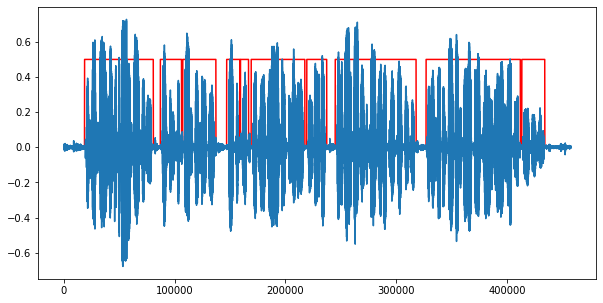

In [0]:
sam.see_graph(0, 500000, mask, df_data)

**The Genetic algoritm optimizer**


creating the genetic algoritm for selections parameters for high quality audio spliting


In [0]:
from pandas import DataFrame as df

In [0]:
def optimize(param):
  my_object = Data_cutting("/content/drive/My Drive/Colab Notebooks/new project/new data/recordings/recordings", "/content/drive/My Drive/Colab Notebooks/new project/new data/cleaned data", param[0])
  word_count = []
  batch = np.random.choice(my_object.data_paths, 20, replace=False)
  for i in batch:
    data, rate = librosa.load(i)
    mask = my_object.envelope(data, rate, param[1])
    index = my_object.index_selecting(mask)
    word_count.append(index.shape[0]/2)
  return np.mean(word_count)

  

In [0]:
def genetic(pop_num, param_num, target ,funton):
  population = [np.random.random_sample((param_num)) for i in np.arange(pop_num)]
  generation = df(population)
  acc = 0.5
  i = 0
  generation[param_num] = [funton(i) for i in population]
  while((acc > 0.1) and (generation.shape[0] > 10)):
    print("generaton number " + str(i))
    generation = generation[(generation[param_num] > target - acc*target) & (generation[param_num] < target + acc*target)]
    gens = generation[generation.columns[:-1]].values[:generation.shape[0]//5]
    mutant_gens = []
    for i in gens.T:
      np.random.shuffle(i)
      mutant_gens.append(i)
    mutant_gens = np.array(mutant_gens)
    mutant = df(mutant_gens.T)
    mutant[param_num] = [funton(i) for i in mutant.values]
    generation.append(mutant)
    acc += -0.01
    i += 1
  return generation

In [0]:
gens = genetic(100, 2, 69 ,optimize)
gens.to_csv("/content/drive/My Drive/Colab Notebooks/new project/new data/recordings/param.csv")

 15% (89253 of 587577) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (587577 of 587577) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (89253 of 587576) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (587576 of 587576) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (92108 of 485100) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (485100 of 485100) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (85967 of 485099) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (485099 of 485099) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (88592 of 538364) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (538364 of 538364) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (81777 of 538363) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (538363 of 538363) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (45167 of 396460) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (396460 of 396460) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (45167 of 396459) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (396459 of 396459) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  2% (15613 of 616704) |                 | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (616704 of 616704) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (46839 of 616703) |#                | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (616703 of 616703) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 20% (93413 of 461222) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (461222 of 461222) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (87574 of 461221) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (461221 of 461221) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (89944 of 710550) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (710550 of 710550) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (80949 of 710549) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (710549 of 710549) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (97665 of 551105) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (551105 of 551105) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (83712 of 551104) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (551104 of 551104) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (90319 of 475680) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (475680 of 475680) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (90319 of 475679) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (475679 of 475679) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (97230 of 548653) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (548653 of 548653) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (83340 of 548652) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (548652 of 548652) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (96712 of 848913) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (848913 of 848913) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (64475 of 848912) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (848912 of 848912) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (86596 of 526236) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (526236 of 526236) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (79935 of 526235) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (526235 of 526235) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 30% (133485 of 439386) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (439386 of 439386) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (83428 of 439385) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (439385 of 439385) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (95118 of 683116) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (683116 of 683116) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (77824 of 683115) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (683115 of 683115) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (89593 of 471852) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (471852 of 471852) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (89592 of 471851) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (471851 of 471851) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (81039 of 533501) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (533501 of 533501) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (81038 of 533500) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (533500 of 533500) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (92663 of 457522) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (457522 of 457522) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (86872 of 457521) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (457521 of 457521) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (93950 of 618503) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (618503 of 618503) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (93950 of 618502) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (618502 of 618502) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (93136 of 735767) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (735767 of 735767) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (83822 of 735766) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (735766 of 735766) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (90632 of 596655) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (596655 of 596655) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (90631 of 596654) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (596654 of 596654) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (92994 of 524747) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (524747 of 524747) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (86351 of 524746) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (524746 of 524746) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (95022 of 938335) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (938335 of 938335) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (71266 of 938334) |#                | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (938334 of 938334) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 12% (93538 of 738945) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (738945 of 738945) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (84184 of 738944) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (738944 of 738944) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 25% (127071 of 501929) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (501929 of 501929) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (63536 of 501928) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (501928 of 501928) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (92747 of 563614) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (563614 of 563614) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (85613 of 563613) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (563613 of 563613) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (88124 of 535521) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (535521 of 535521) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (81345 of 535520) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (535520 of 535520) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 22% (132527 of 581643) |###             | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (581643 of 581643) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (88351 of 581642) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (581642 of 581642) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (90984 of 552897) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (552897 of 552897) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (83985 of 552896) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (552896 of 552896) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (95552 of 943574) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (943574 of 943574) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  6% (59720 of 943573) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (943573 of 943573) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 17% (97230 of 548653) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (548653 of 548653) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (83340 of 548652) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (548652 of 548652) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (81474 of 495111) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (495111 of 495111) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (81474 of 495110) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (495110 of 495110) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (89130 of 880156) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (880156 of 880156) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (66848 of 880155) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (880155 of 880155) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (90131 of 547715) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (547715 of 547715) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (83198 of 547714) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (547714 of 547714) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 29% (130384 of 447838) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (447838 of 447838) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (85033 of 447837) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (447837 of 447837) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (94422 of 678117) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (678117 of 678117) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (77254 of 678116) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (678116 of 678116) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (82118 of 589756) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (589756 of 589756) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (89584 of 589755) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (589755 of 589755) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (89821 of 545835) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (545835 of 545835) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (82912 of 545834) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (545834 of 545834) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (90069 of 547341) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (547341 of 547341) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (83141 of 547340) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (547340 of 547340) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (99327 of 653897) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (653897 of 653897) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (91049 of 653896) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (653896 of 653896) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (93756 of 740671) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (740671 of 740671) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (84381 of 740670) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (740670 of 740670) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (98423 of 777539) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (777539 of 777539) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (88581 of 777538) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (777538 of 777538) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 30% (135168 of 444928) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (444928 of 444928) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (78848 of 444927) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (444927 of 444927) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 20% (89625 of 442521) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (442521 of 442521) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (84023 of 442520) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (442520 of 442520) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 20% (93986 of 464053) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (464053 of 464053) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (82238 of 464052) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (464052 of 464052) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 32% (136096 of 413521) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (413521 of 413521) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (78517 of 413520) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (413520 of 413520) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (93708 of 740288) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (740288 of 740288) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (84337 of 740287) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (740287 of 740287) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 30% (133458 of 439296) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (439296 of 439296) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (83411 of 439295) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (439295 of 439295) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (93830 of 529468) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (529468 of 529468) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (80426 of 529467) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (529467 of 529467) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 22% (134363 of 589701) |###             | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (589701 of 589701) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (89575 of 589700) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (589700 of 589700) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (96059 of 632385) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (632385 of 632385) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (64039 of 632384) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (632384 of 632384) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (93428 of 670980) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (670980 of 670980) |################| Elapsed Time: 0:00:00 Time:  0:00:00
  8% (59454 of 670979) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (670979 of 670979) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 29% (128612 of 441753) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (441753 of 441753) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (83877 of 441752) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (441752 of 441752) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 29% (136155 of 467662) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (467662 of 467662) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (88797 of 467661) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (467661 of 467661) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (88246 of 536262) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (536262 of 536262) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (81458 of 536261) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (536261 of 536261) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (95572 of 629181) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (629181 of 629181) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (87608 of 629180) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (629180 of 629180) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (98799 of 650424) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (650424 of 650424) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (82333 of 650423) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (650423 of 650423) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (92174 of 728167) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (728167 of 728167) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (82956 of 728166) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (728166 of 728166) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (89303 of 881859) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (881859 of 881859) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (66977 of 881858) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (881858 of 881858) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (94221 of 620288) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (620288 of 620288) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (94221 of 620287) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (620287 of 620287) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (90232 of 594027) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (594027 of 594027) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (60155 of 594026) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (594026 of 594026) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (84511 of 556361) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (556361 of 556361) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (84511 of 556360) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (556360 of 556360) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (94650 of 534096) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (534096 of 534096) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (81129 of 534095) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (534095 of 534095) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (129938 of 488813) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (488813 of 488813) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (92813 of 488812) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (488812 of 488812) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 22% (132058 of 579584) |###             | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (579584 of 579584) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (88038 of 579583) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (579583 of 579583) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (100409 of 793228) |##              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (793228 of 793228) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (90368 of 793227) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (793227 of 793227) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (93315 of 567063) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (567063 of 567063) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (86136 of 567062) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (567062 of 567062) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (102463 of 809452) |##              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (809452 of 809452) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (92216 of 809451) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (809451 of 809451) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (92883 of 667063) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (667063 of 667063) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (67551 of 667062) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (667062 of 667062) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (92019 of 559188) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (559188 of 559188) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (77862 of 559187) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (559187 of 559187) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (87666 of 629597) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (629597 of 629597) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (87666 of 629596) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (629596 of 629596) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (95363 of 579513) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (579513 of 579513) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (88028 of 579512) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (579512 of 579512) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (91788 of 557783) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (557783 of 557783) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (84727 of 557782) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (557782 of 557782) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 31% (132618 of 419072) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (419072 of 419072) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (79571 of 419071) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (419071 of 419071) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (90233 of 712839) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (712839 of 712839) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (81210 of 712838) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (712838 of 712838) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (137778 of 518305) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (518305 of 518305) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (78730 of 518304) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (518304 of 518304) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 30% (136043 of 447806) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (447806 of 447806) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (79358 of 447805) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (447805 of 447805) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (95898 of 631323) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (631323 of 631323) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (63932 of 631322) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (631322 of 631322) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 29% (134877 of 463271) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (463271 of 463271) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (87963 of 463270) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (463270 of 463270) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (91750 of 724821) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (724821 of 724821) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (82575 of 724820) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (724820 of 724820) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (95482 of 538788) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (538788 of 538788) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (75021 of 538787) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (538787 of 538787) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  8% (90595 of 1022428) |#               | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (1022428 of 1022428) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  6% (64711 of 1022427) |#               | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (1022427 of 1022427) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
 17% (99060 of 558979) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (558979 of 558979) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (77833 of 558978) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (558978 of 558978) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (86985 of 687174) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (687174 of 687174) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (78286 of 687173) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (687173 of 687173) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 29% (128494 of 441347) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (441347 of 441347) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (83800 of 441346) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (441346 of 441346) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (86603 of 684162) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (684162 of 684162) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (86603 of 684161) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (684161 of 684161) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (95635 of 629597) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (629597 of 629597) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (63757 of 629596) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (629596 of 629596) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (94234 of 744448) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (744448 of 744448) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (84811 of 744447) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (744447 of 744447) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (90720 of 716684) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (716684 of 716684) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (81648 of 716683) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (716683 of 716683) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (90571 of 511074) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (511074 of 511074) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (77632 of 511073) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (511073 of 511073) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 30% (136655 of 449822) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (449822 of 449822) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (85410 of 449821) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (449821 of 449821) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (94888 of 535436) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (535436 of 535436) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (81332 of 535435) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (535435 of 535435) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (92438 of 486839) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (486839 of 486839) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (86276 of 486838) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (486838 of 486838) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (94211 of 676605) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (676605 of 676605) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (77082 of 676604) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (676604 of 676604) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (91778 of 659129) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (659129 of 659129) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (91778 of 659128) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (659128 of 659128) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (91926 of 806899) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (806899 of 806899) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (91926 of 806898) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (806898 of 806898) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (102574 of 675274) |##              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (675274 of 675274) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (68383 of 675273) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (675273 of 675273) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (135081 of 508160) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (508160 of 508160) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (90054 of 508159) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (508159 of 508159) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (94742 of 467787) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (467787 of 467787) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (88821 of 467786) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (467786 of 467786) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (93647 of 528435) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (528435 of 528435) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (80269 of 528434) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (528434 of 528434) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  5% (54365 of 1073696) |                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (1073696 of 1073696) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (81547 of 1073695) |#               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (1073695 of 1073695) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
 15% (88028 of 579513) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (579513 of 579513) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (88028 of 579512) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (579512 of 579512) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (97153 of 639589) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (639589 of 639589) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (64769 of 639588) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (639588 of 639588) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (135399 of 509358) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (509358 of 509358) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (64476 of 509357) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (509357 of 509357) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (90566 of 650424) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (650424 of 650424) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (90566 of 650423) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (650423 of 650423) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (88411 of 873053) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (873053 of 873053) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (66308 of 873052) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (873052 of 873052) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  3% (42349 of 1115184) |                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (1115184 of 1115184) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (84698 of 1115183) |#               | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (1115183 of 1115183) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
 30% (136024 of 447744) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (447744 of 447744) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (85015 of 447743) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (447743 of 447743) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (90266 of 475398) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (475398 of 475398) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (90266 of 475397) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (475397 of 475397) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 27% (139247 of 500022) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (500022 of 500022) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (94941 of 500021) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (500021 of 500021) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (94628 of 575042) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (575042 of 575042) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (87348 of 575041) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (575041 of 575041) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (95422 of 753832) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (753832 of 753832) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (85880 of 753831) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (753831 of 753831) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 31% (134157 of 423936) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (423936 of 423936) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (80494 of 423935) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (423935 of 423935) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (85434 of 519173) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (519173 of 519173) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (85434 of 519172) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (519172 of 519172) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 30% (135318 of 445421) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (445421 of 445421) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (84574 of 445420) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (445420 of 445420) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (86152 of 523536) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (523536 of 523536) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (79525 of 523535) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (523535 of 523535) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (89829 of 887061) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (887061 of 887061) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (67372 of 887060) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (887060 of 887060) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  3% (44477 of 1171209) |                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (1171209 of 1171209) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (88953 of 1171208) |#               | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (1171208 of 1171208) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
 16% (90948 of 552684) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (552684 of 552684) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (83952 of 552683) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (552683 of 552683) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (88407 of 498868) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (498868 of 498868) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (94722 of 498867) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (498867 of 498867) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (93783 of 463050) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (463050 of 463050) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (87921 of 463049) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (463049 of 463049) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (93316 of 819100) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (819100 of 819100) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (93316 of 819099) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (819099 of 819099) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  5% (54010 of 1066696) |                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (1066696 of 1066696) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (81015 of 1066695) |#               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (1066695 of 1066695) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
 16% (88318 of 536699) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (536699 of 536699) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (81524 of 536698) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (536698 of 536698) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (135177 of 508521) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (508521 of 508521) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (64370 of 508520) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (508520 of 508520) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (134060 of 504320) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (504320 of 504320) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (89373 of 504319) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (504319 of 504319) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (93830 of 529468) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (529468 of 529468) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (80426 of 529467) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (529467 of 529467) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (96827 of 764928) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (764928 of 764928) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (87144 of 764927) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (764927 of 764927) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (94409 of 532733) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (532733 of 532733) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (80922 of 532732) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (532732 of 532732) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 30% (135709 of 446706) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (446706 of 446706) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (84818 of 446705) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (446705 of 446705) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (95720 of 581679) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (581679 of 581679) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (88357 of 581678) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (581678 of 581678) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (97901 of 644514) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (644514 of 644514) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (65268 of 644513) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (644513 of 644513) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (91836 of 558080) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (558080 of 558080) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (84772 of 558079) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (558079 of 558079) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (91402 of 481381) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (481381 of 481381) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (91402 of 481380) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (481380 of 481380) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 31% (131944 of 416943) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (416943 of 416943) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (79167 of 416942) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (416942 of 416942) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (89539 of 643051) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (643051 of 643051) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (65119 of 643050) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (643050 of 643050) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (85206 of 747914) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (747914 of 747914) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (85206 of 747913) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (747913 of 747913) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (92114 of 727700) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (727700 of 727700) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (82903 of 727699) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (727699 of 727699) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (126573 of 476153) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (476153 of 476153) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (90409 of 476152) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (476152 of 476152) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (86890 of 858036) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (858036 of 858036) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (65168 of 858035) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (858035 of 858035) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (133002 of 500340) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (500340 of 500340) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (76001 of 500339) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (500339 of 500339) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (91823 of 659456) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (659456 of 659456) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (91823 of 659455) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (659455 of 659455) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (92095 of 519675) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (519675 of 519675) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (78938 of 519674) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (519674 of 519674) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (96194 of 633274) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (633274 of 633274) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (64129 of 633273) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (633273 of 633273) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (90754 of 651778) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (651778 of 651778) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (90754 of 651777) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (651777 of 651777) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (93351 of 670429) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (670429 of 670429) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (93351 of 670428) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (670428 of 670428) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (94694 of 575447) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (575447 of 575447) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (87410 of 575446) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (575446 of 575446) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (85967 of 452758) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (452758 of 452758) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (85967 of 452757) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (452757 of 452757) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 30% (139012 of 457579) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (457579 of 457579) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (86882 of 457578) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (457578 of 457578) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (99483 of 785912) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (785912 of 785912) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (89535 of 785911) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (785911 of 785911) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (92114 of 727700) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (727700 of 727700) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (82903 of 727699) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (727699 of 727699) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (87090 of 573337) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (573337 of 573337) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (87090 of 573336) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (573336 of 573336) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (96033 of 948318) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (948318 of 948318) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (72025 of 948317) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (948317 of 948317) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 17% (95034 of 536262) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (536262 of 536262) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (81458 of 536261) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (536261 of 536261) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (92795 of 666434) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (666434 of 666434) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (67487 of 666433) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (666433 of 666433) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (132558 of 498669) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (498669 of 498669) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (63123 of 498668) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (498668 of 498668) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 22% (132896 of 583265) |###             | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (583265 of 583265) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (88598 of 583264) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (583264 of 583264) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (91965 of 660471) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (660471 of 660471) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (66884 of 660470) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (660470 of 660470) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (86135 of 523430) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (523430 of 523430) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (79509 of 523429) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (523429 of 523429) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (81081 of 492722) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (492722 of 492722) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (93555 of 492721) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (492721 of 492721) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (84508 of 513548) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (513548 of 513548) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (91009 of 513547) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (513547 of 513547) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (81657 of 586443) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (586443 of 586443) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (89080 of 586442) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (586442 of 586442) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (91862 of 518359) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (518359 of 518359) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (78738 of 518358) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (518358 of 518358) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (91397 of 601696) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (601696 of 601696) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (91397 of 601695) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (601695 of 601695) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (93652 of 1233075) |#               | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (1233075 of 1233075) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (93652 of 1233074) |#               | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (1233074 of 1233074) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
 30% (131936 of 434289) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (434289 of 434289) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (82460 of 434288) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (434288 of 434288) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 30% (135168 of 444928) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (444928 of 444928) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (84480 of 444927) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (444927 of 444927) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (105467 of 833188) |##              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (833188 of 833188) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (63281 of 833187) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (833187 of 833187) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 32% (130626 of 396900) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (396900 of 396900) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 21% (85409 of 396899) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (396899 of 396899) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (96002 of 689468) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (689468 of 689468) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (78547 of 689467) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (689467 of 689467) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (87852 of 771140) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (771140 of 771140) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (87852 of 771139) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (771139 of 771139) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 32% (129511 of 393513) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (393513 of 393513) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 21% (84680 of 393512) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (393512 of 393512) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (88170 of 580449) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (580449 of 580449) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (88170 of 580448) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (580448 of 580448) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (93848 of 741396) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (741396 of 741396) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (84463 of 741395) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (741395 of 741395) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (96121 of 759353) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (759353 of 759353) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (86509 of 759352) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (759352 of 759352) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 29% (132373 of 454671) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (454671 of 454671) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (86330 of 454670) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (454670 of 454670) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (92615 of 562814) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (562814 of 562814) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (85491 of 562813) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (562813 of 562813) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (98136 of 646061) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (646061 of 646061) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (65424 of 646060) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (646060 of 646060) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  5% (52075 of 1028480) |                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (1028480 of 1028480) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  6% (65094 of 1028479) |#               | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (1028479 of 1028479) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
 34% (133949 of 391922) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (391922 of 391922) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 22% (89299 of 391921) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (391921 of 391921) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 22% (131574 of 577462) |###             | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (577462 of 577462) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (87716 of 577461) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (577461 of 577461) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (91287 of 721160) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (721160 of 721160) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (82158 of 721159) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (721159 of 721159) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (95422 of 753832) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (753832 of 753832) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (85880 of 753831) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (753831 of 753831) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (92150 of 485323) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (485323 of 485323) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (92150 of 485322) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (485322 of 485322) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  3% (54285 of 1429504) |                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (1429504 of 1429504) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
  5% (72380 of 1429503) |                | Elapsed Time: 0:00:00 ETA:   0:00:03


 starting index selecting 



100% (1429503 of 1429503) |##############| Elapsed Time: 0:00:03 Time:  0:00:03
 22% (131887 of 578836) |###             | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (578836 of 578836) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (87925 of 578835) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (578835 of 578835) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (95534 of 628928) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (628928 of 628928) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (63689 of 628927) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (628927 of 628927) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 25% (130013 of 513548) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (513548 of 513548) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (84508 of 513547) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (513547 of 513547) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (91266 of 600832) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (600832 of 600832) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (91266 of 600831) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (600831 of 600831) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (97199 of 853188) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (853188 of 853188) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (64800 of 853187) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (853187 of 853187) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 36% (137147 of 373606) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (373606 of 373606) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 22% (85126 of 373605) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (373605 of 373605) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (90452 of 714563) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (714563 of 714563) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (81406 of 714562) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (714562 of 714562) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (90844 of 478440) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (478440 of 478440) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (90843 of 478439) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (478439 of 478439) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 30% (136879 of 450560) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (450560 of 450560) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (85550 of 450559) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (450559 of 450559) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (81858 of 646674) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (646674 of 646674) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (90044 of 646673) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (646673 of 646673) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (94481 of 574152) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (574152 of 574152) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (87213 of 574151) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (574151 of 574151) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (85978 of 566016) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (566016 of 566016) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (85977 of 566015) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (566015 of 566015) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 32% (136883 of 415911) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (415911 of 415911) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (78971 of 415910) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (415910 of 415910) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (87956 of 579042) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (579042 of 579042) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (87956 of 579041) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (579041 of 579041) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (93188 of 460111) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (460111 of 460111) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (81539 of 460110) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (460110 of 460110) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (82413 of 465043) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (465043 of 465043) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (88300 of 465042) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (465042 of 465042) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 22% (134267 of 589282) |###             | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (589282 of 589282) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (89512 of 589281) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (589281 of 589281) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 21% (127829 of 594027) |###             | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (594027 of 594027) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (90232 of 594026) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (594026 of 594026) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  5% (52043 of 1027840) |                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (1027840 of 1027840) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (78064 of 1027839) |#               | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (1027839 of 1027839) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
 26% (135557 of 509950) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (509950 of 509950) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (83916 of 509949) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (509949 of 509949) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 37% (140756 of 370657) |######          | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (370657 of 370657) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 22% (84454 of 370656) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (370656 of 370656) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (85372 of 613120) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (613120 of 613120) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (93132 of 613119) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (613119 of 613119) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (92021 of 559201) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (559201 of 559201) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (84942 of 559200) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (559200 of 559200) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (89038 of 879250) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (879250 of 879250) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (66779 of 879249) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (879249 of 879249) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (88276 of 871724) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (871724 of 871724) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (66207 of 871723) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (871723 of 871723) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (97630 of 550912) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (550912 of 550912) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (83683 of 550911) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (550911 of 550911) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 34% (135650 of 396900) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (396900 of 396900) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 21% (85409 of 396899) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (396899 of 396899) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 21% (91015 of 422950) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (422950 of 422950) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (80307 of 422949) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (422949 of 422949) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (87215 of 574164) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (574164 of 574164) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (87215 of 574163) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (574163 of 574163) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (90452 of 714563) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (714563 of 714563) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (81406 of 714562) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (714562 of 714562) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (94221 of 620288) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (620288 of 620288) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (94221 of 620287) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (620287 of 620287) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (94902 of 624771) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (624771 of 624771) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (63268 of 624770) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (624770 of 624770) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (94026 of 675274) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (675274 of 675274) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (68383 of 675273) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (675273 of 675273) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (102527 of 809959) |##              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (809959 of 809959) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (92274 of 809958) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (809958 of 809958) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (93747 of 740594) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (740594 of 740594) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (84372 of 740593) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (740593 of 740593) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (91310 of 655765) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (655765 of 655765) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (66407 of 655764) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (655764 of 655764) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (93388 of 614798) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (614798 of 614798) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (93387 of 614797) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (614797 of 614797) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (95044 of 750847) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (750847 of 750847) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (85540 of 750846) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (750846 of 750846) |################| Elapsed Time: 0:00:01 Time:  0:00:01
N/A% (0 of 2349119) |                    | Elapsed Time: 0:00:00 ETA:  --:--:--

starting envelope



100% (2349119 of 2349119) |##############| Elapsed Time: 0:00:03 Time:  0:00:03
  3% (89208 of 2349118) |                | Elapsed Time: 0:00:00 ETA:   0:00:05


 starting index selecting 



100% (2349118 of 2349118) |##############| Elapsed Time: 0:00:04 Time:  0:00:04
 17% (87104 of 491510) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (491510 of 491510) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (62217 of 491509) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (491509 of 491509) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  3% (55360 of 1457807) |                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (1457807 of 1457807) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
  5% (73813 of 1457806) |                | Elapsed Time: 0:00:00 ETA:   0:00:03


 starting index selecting 



100% (1457806 of 1457806) |##############| Elapsed Time: 0:00:03 Time:  0:00:03
 12% (97956 of 773850) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (773850 of 773850) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (88161 of 773849) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (773849 of 773849) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (91951 of 484272) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (484272 of 484272) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (85821 of 484271) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (484271 of 484271) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (93211 of 460229) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (460229 of 460229) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (87386 of 460228) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (460228 of 460228) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (95801 of 540587) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (540587 of 540587) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (82115 of 540586) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (540586 of 540586) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (91546 of 516578) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (516578 of 516578) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (78468 of 516577) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (516577 of 516577) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (93305 of 526504) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (526504 of 526504) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (79976 of 526503) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (526503 of 526503) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 22% (131648 of 577786) |###             | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (577786 of 577786) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (87765 of 577785) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (577785 of 577785) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (89130 of 880156) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (880156 of 880156) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (66848 of 880155) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (880155 of 880155) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 25% (132541 of 523536) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (523536 of 523536) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (79525 of 523535) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (523535 of 523535) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (92776 of 458078) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (458078 of 458078) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (86977 of 458077) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (458077 of 458077) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (87953 of 534478) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (534478 of 534478) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (81187 of 534477) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (534477 of 534477) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 34% (140165 of 410112) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (410112 of 410112) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 21% (88252 of 410111) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (410111 of 410111) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (97760 of 858107) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (858107 of 858107) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (65173 of 858106) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (858106 of 858106) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (93122 of 735663) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (735663 of 735663) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (83810 of 735662) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (735662 of 735662) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (89596 of 471870) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (471870 of 471870) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (83623 of 471869) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (471869 of 471869) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (90895 of 512904) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (512904 of 512904) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (84402 of 512903) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (512903 of 512903) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 25% (127266 of 502700) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (502700 of 502700) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (89086 of 502699) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (502699 of 502699) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (96613 of 636031) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (636031 of 636031) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (88562 of 636030) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (636030 of 636030) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (91355 of 481134) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (481134 of 481134) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (91355 of 481133) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (481133 of 481133) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (92838 of 611182) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (611182 of 611182) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (92838 of 611181) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (611181 of 611181) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (89388 of 470776) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (470776 of 470776) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (89388 of 470775) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (470775 of 470775) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (98714 of 779835) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (779835 of 779835) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (88842 of 779834) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (779834 of 779834) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (91419 of 555541) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (555541 of 555541) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (84386 of 555540) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (555540 of 555540) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (91006 of 898683) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (898683 of 898683) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (68255 of 898682) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (898682 of 898682) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (83285 of 469963) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (469963 of 469963) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (89234 of 469962) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (469962 of 469962) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (88178 of 633274) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (633274 of 633274) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (88178 of 633273) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (633273 of 633273) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (91595 of 723593) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (723593 of 723593) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (82435 of 723592) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (723592 of 723592) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (92723 of 563466) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (563466 of 563466) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (85590 of 563465) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (563465 of 563465) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (86287 of 524357) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (524357 of 524357) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (86287 of 524356) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (524356 of 524356) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (93787 of 493943) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (493943 of 493943) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (87535 of 493942) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (493942 of 493942) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (95195 of 940047) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (940047 of 940047) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (71396 of 940046) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (940046 of 940046) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 15% (79860 of 525741) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (525741 of 525741) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (79860 of 525740) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (525740 of 525740) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (75005 of 740671) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (740671 of 740671) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (84381 of 740670) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (740670 of 740670) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (90433 of 595350) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (595350 of 595350) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (90433 of 595349) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (595349 of 595349) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (93962 of 742297) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (742297 of 742297) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (84566 of 742296) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (742296 of 742296) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (87363 of 460111) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (460111 of 460111) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (87363 of 460110) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (460110 of 460110) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 20% (93413 of 461222) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (461222 of 461222) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (87574 of 461221) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (461221 of 461221) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (90566 of 650424) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (650424 of 650424) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (74099 of 650423) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (650423 of 650423) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (92888 of 611511) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (611511 of 611511) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (92888 of 611510) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (611510 of 611510) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (90940 of 598682) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (598682 of 598682) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (90939 of 598681) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (598681 of 598681) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (87416 of 863231) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (863231 of 863231) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (65562 of 863230) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (863230 of 863230) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (90413 of 892825) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (892825 of 892825) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (67810 of 892824) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (892824 of 892824) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (104695 of 827083) |##              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (827083 of 827083) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (94225 of 827082) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (827082 of 827082) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 30% (136257 of 448512) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (448512 of 448512) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (85161 of 448511) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (448511 of 448511) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (88432 of 465738) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (465738 of 465738) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (82536 of 465737) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (465737 of 465737) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (88815 of 467754) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (467754 of 467754) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (88814 of 467753) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (467753 of 467753) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (86591 of 526206) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (526206 of 526206) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (79930 of 526205) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (526205 of 526205) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (93428 of 670980) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (670980 of 670980) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (67948 of 670979) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (670979 of 670979) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (91706 of 724472) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (724472 of 724472) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (82535 of 724471) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (724471 of 724471) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (91457 of 555774) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (555774 of 555774) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (84422 of 555773) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (555773 of 555773) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (92994 of 565116) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (565116 of 565116) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (85841 of 565115) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (565115 of 565115) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (93538 of 738945) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (738945 of 738945) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (84184 of 738944) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (738944 of 738944) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (90889 of 652742) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (652742 of 652742) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (66101 of 652741) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (652741 of 652741) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (89940 of 473684) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (473684 of 473684) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (89940 of 473683) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (473683 of 473683) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 34% (134421 of 393303) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (393303 of 393303) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 20% (79657 of 393302) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (393302 of 393302) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 22% (134894 of 592031) |###             | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (592031 of 592031) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (89929 of 592030) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (592030 of 592030) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (94347 of 573337) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (573337 of 573337) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (87090 of 573336) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (573336 of 573336) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  5% (54164 of 1069721) |                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (1069721 of 1069721) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (81245 of 1069720) |#               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (1069720 of 1069720) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
 10% (88921 of 878092) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (878092 of 878092) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (66691 of 878091) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (878091 of 878091) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 22% (90974 of 399273) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (399273 of 399273) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 22% (90974 of 399272) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (399272 of 399272) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (89805 of 545738) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (545738 of 545738) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (82897 of 545737) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (545737 of 545737) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (99962 of 658080) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (658080 of 658080) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (66641 of 658079) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (658079 of 658079) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (88240 of 633718) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (633718 of 633718) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (88240 of 633717) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (633717 of 633717) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (92972 of 612065) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (612065 of 612065) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (92972 of 612064) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (612064 of 612064) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (96863 of 765214) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (765214 of 765214) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (87177 of 765213) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (765213 of 765213) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (90936 of 598659) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (598659 of 598659) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (90936 of 598658) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (598658 of 598658) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (92371 of 912159) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (912159 of 912159) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (69278 of 912158) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (912158 of 912158) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 26% (128951 of 485100) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (485100 of 485100) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (73686 of 485099) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (485099 of 485099) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (90918 of 798058) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (798058 of 798058) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (90918 of 798057) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (798057 of 798057) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 32% (134427 of 408450) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (408450 of 408450) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 20% (82724 of 408449) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (408449 of 408449) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 30% (135685 of 446628) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (446628 of 446628) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (84803 of 446627) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (446627 of 446627) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (89581 of 544372) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (544372 of 544372) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (82690 of 544371) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (544371 of 544371) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (131787 of 495768) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (495768 of 495768) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (62756 of 495767) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (495767 of 495767) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (87275 of 689468) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (689468 of 689468) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (78547 of 689467) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (689467 of 689467) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (88077 of 773120) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (773120 of 773120) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (88077 of 773119) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (773119 of 773119) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (93122 of 735663) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (735663 of 735663) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (83810 of 735662) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (735662 of 735662) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 27% (130606 of 468992) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (468992 of 468992) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (89049 of 468991) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (468991 of 468991) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 20% (91739 of 452959) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (452959 of 452959) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (86005 of 452958) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (452958 of 452958) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (93101 of 565764) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (565764 of 565764) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (85939 of 565763) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (565763 of 565763) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (102455 of 674495) |##              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (674495 of 674495) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (85379 of 674494) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (674494 of 674494) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (103684 of 819100) |##              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (819100 of 819100) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (62211 of 819099) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (819099 of 819099) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 30% (133908 of 440780) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (440780 of 440780) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (83693 of 440779) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (440779 of 440779) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (88754 of 637410) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (637410 of 637410) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (88754 of 637409) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (637409 of 637409) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (85777 of 484024) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (484024 of 484024) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (91904 of 484023) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (484023 of 484023) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 29% (135279 of 464652) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (464652 of 464652) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (88225 of 464651) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (464651 of 464651) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (96537 of 953297) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (953297 of 953297) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (72403 of 953296) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (953296 of 953296) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 17% (88138 of 497345) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (497345 of 497345) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (81842 of 497344) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (497344 of 497344) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (90787 of 478143) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (478143 of 478143) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (84735 of 478142) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (478142 of 478142) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 22% (133423 of 585576) |###             | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (585576 of 585576) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (88949 of 585575) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (585575 of 585575) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 29% (130086 of 446815) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (446815 of 446815) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (84839 of 446814) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (446814 of 446814) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (94689 of 575414) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (575414 of 575414) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (87405 of 575413) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (575413 of 575413) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (92191 of 485536) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (485536 of 485536) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (86045 of 485535) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (485535 of 485535) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (136986 of 515327) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (515327 of 515327) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (84801 of 515326) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (515326 of 515326) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 25% (126342 of 499047) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (499047 of 499047) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (63171 of 499046) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (499046 of 499046) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (75671 of 664221) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (664221 of 664221) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (67263 of 664220) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (664220 of 664220) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  5% (53282 of 1052307) |                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (1052307 of 1052307) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (79922 of 1052306) |#               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (1052306 of 1052306) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
 20% (95224 of 470167) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (470167 of 470167) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (89273 of 470166) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (470166 of 470166) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (91936 of 660264) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (660264 of 660264) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (91936 of 660263) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (660263 of 660263) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (93019 of 918554) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (918554 of 918554) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (69764 of 918553) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (918553 of 918553) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 17% (94818 of 535040) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (535040 of 535040) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (81272 of 535039) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (535039 of 535039) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 22% (132896 of 583265) |###             | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (583265 of 583265) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (88598 of 583264) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (583264 of 583264) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (134813 of 507150) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (507150 of 507150) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (83455 of 507149) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (507149 of 507149) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 30% (135124 of 444780) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (444780 of 444780) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (84452 of 444779) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (444779 of 444779) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (91489 of 481842) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (481842 of 481842) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (79291 of 481841) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (481841 of 481841) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (83145 of 656842) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (656842 of 656842) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (83145 of 656841) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (656841 of 656841) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (97495 of 855784) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (855784 of 855784) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (64997 of 855783) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (855783 of 855783) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (90536 of 715229) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (715229 of 715229) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (81482 of 715228) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (715228 of 715228) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (94817 of 535034) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (535034 of 535034) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (81271 of 535033) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (535033 of 535033) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  5% (52730 of 1041408) |                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (1041408 of 1041408) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (79095 of 1041407) |#               | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (1041407 of 1041407) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
 17% (92760 of 523430) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (523430 of 523430) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (79509 of 523429) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (523429 of 523429) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (134299 of 505219) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (505219 of 505219) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (76742 of 505218) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (505218 of 505218) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 21% (90162 of 418987) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (418987 of 418987) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (79555 of 418986) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (418986 of 418986) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (94384 of 677842) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (677842 of 677842) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (68643 of 677841) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (677841 of 677841) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (98479 of 555698) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (555698 of 555698) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (84410 of 555697) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (555697 of 555697) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (85447 of 482163) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (482163 of 482163) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (91550 of 482162) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (482162 of 482162) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (93431 of 738101) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (738101 of 738101) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (84088 of 738100) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (738100 of 738100) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (90994 of 552960) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (552960 of 552960) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (83994 of 552959) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (552959 of 552959) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (93077 of 525215) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (525215 of 525215) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (79780 of 525214) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (525214 of 525214) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (94107 of 464652) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (464652 of 464652) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (88225 of 464651) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (464651 of 464651) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 29% (130580 of 448512) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (448512 of 448512) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (85161 of 448511) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (448511 of 448511) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (83415 of 732194) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (732194 of 732194) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (83415 of 732193) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (732193 of 732193) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 21% (91516 of 425278) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (425278 of 425278) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (80749 of 425277) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (425277 of 425277) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 26% (136407 of 513147) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (513147 of 513147) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (77947 of 513146) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (513146 of 513146) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (95303 of 627411) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (627411 of 627411) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (63536 of 627410) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (627410 of 627410) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (92705 of 523117) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (523117 of 523117) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (79461 of 523116) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (523116 of 523116) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 22% (94733 of 415771) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (415771 of 415771) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 20% (84207 of 415770) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (415770 of 415770) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 20% (94308 of 465644) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (465644 of 465644) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (82520 of 465643) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (465643 of 465643) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 26% (132862 of 499813) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (499813 of 499813) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (88575 of 499812) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (499812 of 499812) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (98681 of 649645) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (649645 of 649645) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (65787 of 649644) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (649644 of 649644) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 22% (129959 of 570374) |###             | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (570374 of 570374) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (86639 of 570373) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (570373 of 570373) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 30% (135318 of 445421) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (445421 of 445421) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (84574 of 445420) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (445420 of 445420) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (91529 of 482048) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (482048 of 482048) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (91528 of 482047) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (482047 of 482047) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (102355 of 808600) |##              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (808600 of 808600) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (61413 of 808599) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (808599 of 808599) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (93592 of 462106) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (462106 of 462106) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (87742 of 462105) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (462105 of 462105) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (92972 of 612065) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (612065 of 612065) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (92972 of 612064) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (612064 of 612064) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (134813 of 507150) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (507150 of 507150) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (64197 of 507149) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (507149 of 507149) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (93033 of 734960) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (734960 of 734960) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (83730 of 734959) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (734959 of 734959) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (89237 of 704970) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (704970 of 704970) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (80313 of 704969) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (704969 of 704969) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (91006 of 898683) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (898683 of 898683) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (68255 of 898682) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (898682 of 898682) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 12% (95959 of 758070) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (758070 of 758070) |################| Elapsed Time: 0:00:00 Time:  0:00:00
  7% (57575 of 758069) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (758069 of 758069) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (95743 of 540264) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (540264 of 540264) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (82066 of 540263) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (540263 of 540263) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (95914 of 757720) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (757720 of 757720) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (86323 of 757719) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (757719 of 757719) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (93890 of 529805) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (529805 of 529805) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (80477 of 529804) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (529804 of 529804) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (95652 of 629703) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (629703 of 629703) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (63768 of 629702) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (629702 of 629702) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (89133 of 704148) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (704148 of 704148) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (80220 of 704147) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (704147 of 704147) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (92829 of 523817) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (523817 of 523817) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (79567 of 523816) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (523816 of 523816) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  5% (49842 of 984362) |                 | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (984362 of 984362) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (74762 of 984361) |#                | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (984361 of 984361) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 17% (89641 of 505831) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (505831 of 505831) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (64030 of 505830) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (505830 of 505830) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 21% (91015 of 422950) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (422950 of 422950) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (80307 of 422949) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (422949 of 422949) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (94384 of 677842) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (677842 of 677842) |################| Elapsed Time: 0:00:00 Time:  0:00:00
  8% (60062 of 677841) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (677841 of 677841) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (87670 of 769545) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (769545 of 769545) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (87670 of 769544) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (769544 of 769544) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (91229 of 480470) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (480470 of 480470) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (91229 of 480469) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (480469 of 480469) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (91316 of 655813) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (655813 of 655813) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (66412 of 655812) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (655812 of 655812) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (87336 of 862442) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (862442 of 862442) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (65502 of 862441) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (862441 of 862441) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (134340 of 505373) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (505373 of 505373) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (89560 of 505372) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (505372 of 505372) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 30% (132604 of 436488) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (436488 of 436488) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (82878 of 436487) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (436487 of 436487) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (95432 of 942389) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (942389 of 942389) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  6% (59645 of 942388) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (942388 of 942388) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 15% (90372 of 594944) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (594944 of 594944) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (90372 of 594943) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (594943 of 594943) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 22% (129454 of 568155) |###             | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (568155 of 568155) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (79111 of 568154) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (568154 of 568154) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (92323 of 663040) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (663040 of 663040) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (67144 of 663039) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (663039 of 663039) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (92687 of 732223) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (732223 of 732223) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (83418 of 732222) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (732222 of 732222) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (87643 of 692378) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (692378 of 692378) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (87643 of 692377) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (692377 of 692377) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (86456 of 620910) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (620910 of 620910) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (94316 of 620909) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (620909 of 620909) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (127899 of 481142) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (481142 of 481142) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (91356 of 481141) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (481141 of 481141) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (93986 of 464053) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (464053 of 464053) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (88112 of 464052) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (464052 of 464052) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (90266 of 475398) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (475398 of 475398) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (90266 of 475397) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (475397 of 475397) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 30% (133662 of 439969) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (439969 of 439969) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (83539 of 439968) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (439968 of 439968) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 29% (135603 of 465765) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (465765 of 465765) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (88437 of 465764) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (465764 of 465764) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (86985 of 687174) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (687174 of 687174) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (86984 of 687173) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (687173 of 687173) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (86196 of 486387) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (486387 of 486387) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (92352 of 486386) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (486386 of 486386) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (96291 of 543356) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (543356 of 543356) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (82535 of 543355) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (543355 of 543355) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (134143 of 504630) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (504630 of 504630) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (83041 of 504629) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (504629 of 504629) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (94009 of 618887) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (618887 of 618887) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (62672 of 618886) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (618886 of 618886) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (92527 of 562275) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (562275 of 562275) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (85409 of 562274) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (562274 of 562274) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (93950 of 618503) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (618503 of 618503) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (93950 of 618502) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (618502 of 618502) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (76567 of 549888) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (549888 of 549888) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (83528 of 549887) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (549887 of 549887) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (95524 of 754635) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (754635 of 754635) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (85971 of 754634) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (754634 of 754634) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (97199 of 853188) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (853188 of 853188) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (86399 of 853187) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (853187 of 853187) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (94742 of 467788) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (467788 of 467788) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (88821 of 467787) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (467787 of 467787) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 30% (132604 of 436488) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (436488 of 436488) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (82878 of 436487) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (436487 of 436487) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (93289 of 491321) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (491321 of 491321) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (87070 of 491320) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (491320 of 491320) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (87283 of 492524) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (492524 of 492524) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (87283 of 492523) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (492523 of 492523) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  3% (39971 of 1052554) |                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (1052554 of 1052554) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (79941 of 1052553) |#               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (1052553 of 1052553) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
 17% (93032 of 524963) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (524963 of 524963) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (86387 of 524962) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (524962 of 524962) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 21% (92225 of 428571) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (428571 of 428571) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (81375 of 428570) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (428570 of 428570) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (90111 of 711876) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (711876 of 711876) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (81100 of 711875) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (711875 of 711875) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 29% (135936 of 466909) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (466909 of 466909) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (82744 of 466908) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (466908 of 466908) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 22% (134138 of 588714) |###             | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (588714 of 588714) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (89425 of 588713) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (588713 of 588713) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (89512 of 589282) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (589282 of 589282) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (89512 of 589281) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (589281 of 589281) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 21% (92219 of 428544) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (428544 of 428544) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (81369 of 428543) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (428543 of 428543) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (88586 of 499876) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (499876 of 499876) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (63276 of 499875) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (499875 of 499875) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 22% (127158 of 558080) |###             | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (558080 of 558080) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (84772 of 558079) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (558079 of 558079) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 32% (138062 of 419496) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (419496 of 419496) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 20% (84962 of 419495) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (419495 of 419495) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (101848 of 804596) |##              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (804596 of 804596) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (91663 of 804595) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (804595 of 804595) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (92275 of 520691) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (520691 of 520691) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (79093 of 520690) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (520690 of 520690) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (101883 of 804869) |##              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (804869 of 804869) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (91694 of 804868) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (804868 of 804868) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 29% (132428 of 454860) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (454860 of 454860) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (86366 of 454859) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (454859 of 454859) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (96473 of 544378) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (544378 of 544378) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (75800 of 544377) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (544377 of 544377) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (95935 of 541346) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (541346 of 541346) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (82230 of 541345) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (541345 of 541345) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (94850 of 832565) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (832565 of 832565) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (63233 of 832564) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (832564 of 832564) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (91837 of 659555) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (659555 of 659555) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (66791 of 659554) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (659554 of 659554) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (86852 of 686124) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (686124 of 686124) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (78166 of 686123) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (686123 of 686123) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (71605 of 628527) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (628527 of 628527) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (95473 of 628526) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (628526 of 628526) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (92510 of 456765) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (456765 of 456765) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (86728 of 456764) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (456764 of 456764) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (97505 of 641904) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (641904 of 641904) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (65003 of 641903) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (641903 of 641903) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 21% (88019 of 409027) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (409027 of 409027) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (77664 of 409026) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (409026 of 409026) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (89716 of 644317) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (644317 of 644317) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (65248 of 644316) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (644316 of 644316) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (86010 of 679475) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (679475 of 679475) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (77409 of 679474) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (679474 of 679474) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (80851 of 491321) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (491321 of 491321) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (87070 of 491320) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (491320 of 491320) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (94020 of 530539) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (530539 of 530539) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (80589 of 530538) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (530538 of 530538) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (89912 of 443937) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (443937 of 443937) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (84292 of 443936) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (443936 of 443936) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 30% (134545 of 442876) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (442876 of 442876) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (84091 of 442875) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (442875 of 442875) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (90126 of 711991) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (711991 of 711991) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (81113 of 711990) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (711990 of 711990) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  3% (42349 of 1115184) |                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (1115184 of 1115184) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (84698 of 1115183) |#               | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (1115183 of 1115183) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
 12% (93756 of 740671) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (740671 of 740671) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (84381 of 740670) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (740670 of 740670) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (88165 of 497499) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (497499 of 497499) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (88165 of 497498) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (497498 of 497498) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (94385 of 677855) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (677855 of 677855) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (85805 of 677854) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (677854 of 677854) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (92521 of 562239) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (562239 of 562239) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (85404 of 562238) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (562238 of 562238) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (94312 of 465664) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (465664 of 465664) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (88418 of 465663) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (465663 of 465663) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (95389 of 627976) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (627976 of 627976) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (63593 of 627975) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (627975 of 627975) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (93252 of 613903) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (613903 of 613903) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (85481 of 613902) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (613902 of 613902) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (92450 of 608625) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (608625 of 608625) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (84746 of 608624) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (608624 of 608624) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (79832 of 573337) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (573337 of 573337) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (87090 of 573336) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (573336 of 573336) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (91133 of 654495) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (654495 of 654495) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (82848 of 654494) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (654494 of 654494) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (135608 of 510141) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (510141 of 510141) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (83948 of 510140) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (510140 of 510140) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (96337 of 691870) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (691870 of 691870) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (87579 of 691869) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (691869 of 691869) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (88636 of 778024) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (778024 of 778024) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (88636 of 778023) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (778023 of 778023) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (87797 of 693589) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (693589 of 693589) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (79017 of 693588) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (693588 of 693588) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (132034 of 496699) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (496699 of 496699) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (88023 of 496698) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (496698 of 496698) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 29% (130580 of 448512) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (448512 of 448512) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (79483 of 448511) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (448511 of 448511) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (94316 of 620910) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (620910 of 620910) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (62877 of 620909) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (620909 of 620909) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  5% (52117 of 1029300) |                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (1029300 of 1029300) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  8% (91204 of 1029299) |#               | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (1029299 of 1029299) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
 27% (133679 of 480029) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (480029 of 480029) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (85069 of 480028) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (480028 of 480028) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 27% (137808 of 494856) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (494856 of 494856) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (81432 of 494855) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (494855 of 494855) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (96137 of 584215) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (584215 of 584215) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (88742 of 584214) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (584214 of 584214) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (91571 of 482271) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (482271 of 482271) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (85466 of 482270) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (482270 of 482270) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (87967 of 496384) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (496384 of 496384) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (87967 of 496383) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (496383 of 496383) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (88784 of 500992) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (500992 of 500992) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (63417 of 500991) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (500991 of 500991) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (94517 of 933347) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (933347 of 933347) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  6% (59073 of 933346) |#                | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (933346 of 933346) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 17% (85875 of 484577) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (484577 of 484577) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (85875 of 484576) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (484576 of 484576) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 21% (91890 of 427018) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (427018 of 427018) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (81080 of 427017) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (427017 of 427017) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (95108 of 939185) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (939185 of 939185) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (71331 of 939184) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (939184 of 939184) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 11% (96712 of 848913) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (848913 of 848913) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (64475 of 848912) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (848912 of 848912) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (86524 of 525796) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (525796 of 525796) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (79868 of 525795) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (525795 of 525795) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 25% (128429 of 507291) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (507291 of 507291) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (83479 of 507290) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (507290 of 507290) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 22% (133931 of 587808) |###             | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (587808 of 587808) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (81847 of 587807) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (587807 of 587807) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (87318 of 492722) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (492722 of 492722) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (87318 of 492721) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (492721 of 492721) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (90152 of 547845) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (547845 of 547845) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (83217 of 547844) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (547844 of 547844) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 22% (131092 of 575344) |###             | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (575344 of 575344) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (87394 of 575343) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (575343 of 575343) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (87707 of 629889) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (629889 of 629889) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (95680 of 629888) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (629888 of 629888) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (96820 of 764877) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (764877 of 764877) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (87138 of 764876) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (764876 of 764876) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (92108 of 727650) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (727650 of 727650) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (82897 of 727649) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (727649 of 727649) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (83678 of 550879) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (550879 of 550879) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (83678 of 550878) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (550878 of 550878) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (89805 of 545738) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (545738 of 545738) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (82897 of 545737) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (545737 of 545737) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 29% (123444 of 424003) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (424003 of 424003) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (80507 of 424002) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (424002 of 424002) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (97551 of 642210) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (642210 of 642210) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (65034 of 642209) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (642209 of 642209) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (105751 of 696193) |##              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (696193 of 696193) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (79314 of 696192) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (696192 of 696192) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (95044 of 750847) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (750847 of 750847) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (85540 of 750846) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (750846 of 750846) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (92446 of 456451) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (456451 of 456451) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (80890 of 456450) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (456450 of 456450) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (94341 of 573300) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (573300 of 573300) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (87084 of 573299) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (573299 of 573299) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (94172 of 676322) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (676322 of 676322) |################| Elapsed Time: 0:00:00 Time:  0:00:00
  8% (59928 of 676321) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (676321 of 676321) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (95737 of 540225) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (540225 of 540225) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (82060 of 540224) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (540224 of 540224) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (136646 of 514048) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (514048 of 514048) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (84591 of 514047) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (514047 of 514047) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (90895 of 512904) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (512904 of 512904) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (84402 of 512903) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (512903 of 512903) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (91386 of 802159) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (802159 of 802159) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (60924 of 802158) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (802158 of 802158) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (91075 of 719489) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (719489 of 719489) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (81967 of 719488) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (719488 of 719488) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (89981 of 473896) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (473896 of 473896) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (83982 of 473895) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (473895 of 473895) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (92040 of 484740) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (484740 of 484740) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (92040 of 484739) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (484739 of 484739) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (90759 of 716996) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (716996 of 716996) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (81683 of 716995) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (716995 of 716995) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 21% (128810 of 598584) |###             | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (598584 of 598584) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (90924 of 598583) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (598583 of 598583) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (95683 of 687174) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (687174 of 687174) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (78286 of 687173) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (687173 of 687173) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (93185 of 525826) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (525826 of 525826) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (79873 of 525825) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (525825 of 525825) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 21% (89401 of 415448) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (415448 of 415448) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (78883 of 415447) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (415447 of 415447) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (99296 of 980539) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (980539 of 980539) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (74472 of 980538) |#                | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (980538 of 980538) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 17% (95181 of 537088) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (537088 of 537088) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (81583 of 537087) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (537087 of 537087) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (95447 of 837810) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (837810 of 837810) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (63632 of 837809) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (837809 of 837809) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (97613 of 771140) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (771140 of 771140) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (87852 of 771139) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (771139 of 771139) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (91811 of 805888) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (805888 of 805888) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (91810 of 805887) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (805887 of 805887) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 34% (136253 of 398664) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (398664 of 398664) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (75696 of 398663) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (398663 of 398663) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (92096 of 519684) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (519684 of 519684) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (78940 of 519683) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (519683 of 519683) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 31% (135258 of 427414) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (427414 of 427414) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (75745 of 427413) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (427413 of 427413) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (94295 of 573023) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (573023 of 573023) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (87042 of 573022) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (573022 of 573022) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (89584 of 589756) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (589756 of 589756) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (89584 of 589755) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (589755 of 589755) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (86251 of 567815) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (567815 of 567815) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (86251 of 567814) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (567814 of 567814) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (89724 of 787571) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (787571 of 787571) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (89724 of 787570) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (787570 of 787570) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (93864 of 570402) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (570402 of 570402) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (86644 of 570401) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (570401 of 570401) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (83940 of 602841) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (602841 of 602841) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (83940 of 602840) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (602840 of 602840) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (95712 of 630100) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (630100 of 630100) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (63808 of 630099) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (630099 of 630099) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (95044 of 750847) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (750847 of 750847) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (85540 of 750846) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (750846 of 750846) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 25% (126156 of 498313) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (498313 of 498313) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (82001 of 498312) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (498312 of 498312) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (99740 of 562814) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (562814 of 562814) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (85491 of 562813) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (562813 of 562813) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (86276 of 425984) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (425984 of 425984) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (80883 of 425983) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (425983 of 425983) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (89477 of 543744) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (543744 of 543744) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (82594 of 543743) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (543743 of 543743) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (95164 of 578304) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (578304 of 578304) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (80524 of 578303) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (578303 of 578303) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (86897 of 858107) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (858107 of 858107) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (65173 of 858106) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (858106 of 858106) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (93420 of 527152) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (527152 of 527152) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (80074 of 527151) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (527151 of 527151) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (94089 of 571767) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (571767 of 571767) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (86851 of 571766) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (571766 of 571766) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (94903 of 535521) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (535521 of 535521) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (81345 of 535520) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (535520 of 535520) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 22% (133879 of 587577) |###             | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (587577 of 587577) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (89253 of 587576) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (587576 of 587576) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (94205 of 572475) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (572475 of 572475) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (86959 of 572474) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (572474 of 572474) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (91628 of 517043) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (517043 of 517043) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (78539 of 517042) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (517042 of 517042) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (93932 of 674597) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (674597 of 674597) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (85392 of 674596) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (674596 of 674596) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (90718 of 477777) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (477777 of 477777) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (90717 of 477776) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (477776 of 477776) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (92092 of 519659) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (519659 of 519659) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (78936 of 519658) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (519658 of 519658) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (94611 of 679475) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (679475 of 679475) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (86010 of 679474) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (679474 of 679474) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (94718 of 534478) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (534478 of 534478) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (81187 of 534477) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (534477 of 534477) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (92711 of 563397) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (563397 of 563397) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (85580 of 563396) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (563396 of 563396) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (90984 of 552897) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (552897 of 552897) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (83985 of 552896) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (552896 of 552896) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (85147 of 480470) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (480470 of 480470) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (60819 of 480469) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (480469 of 480469) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (98485 of 778024) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (778024 of 778024) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (88636 of 778023) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (778023 of 778023) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (88181 of 1161046) |#               | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (1161046 of 1161046) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (88181 of 1161045) |#               | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (1161045 of 1161045) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
 26% (133614 of 502640) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (502640 of 502640) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (82713 of 502639) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (502639 of 502639) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (94896 of 832976) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (832976 of 832976) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (94896 of 832975) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (832975 of 832975) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (99683 of 984362) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (984362 of 984362) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (74762 of 984361) |#                | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (984361 of 984361) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 16% (91419 of 555541) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (555541 of 555541) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (84386 of 555540) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (555540 of 555540) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (90152 of 547845) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (547845 of 547845) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (83217 of 547844) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (547844 of 547844) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (78993 of 480029) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (480029 of 480029) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (91145 of 480028) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (480028 of 480028) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (92888 of 611511) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (611511 of 611511) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (85147 of 611510) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (611510 of 611510) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (87676 of 577200) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (577200 of 577200) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (87676 of 577199) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (577199 of 577199) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 25% (127521 of 503706) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (503706 of 503706) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (82889 of 503705) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (503705 of 503705) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (90321 of 594609) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (594609 of 594609) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (90321 of 594608) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (594608 of 594608) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (101182 of 666112) |##              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (666112 of 666112) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (92750 of 666111) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (666111 of 666111) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (97141 of 959262) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (959262 of 959262) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (72856 of 959261) |#                | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (959261 of 959261) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 16% (92019 of 559188) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (559188 of 559188) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (84940 of 559187) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (559187 of 559187) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (90778 of 448214) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (448214 of 448214) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (85104 of 448213) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (448213 of 448213) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 31% (135292 of 427520) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (427520 of 427520) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (81175 of 427519) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (427519 of 427519) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 25% (129110 of 509983) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (509983 of 509983) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (90377 of 509982) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (509982 of 509982) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (94333 of 465765) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (465765 of 465765) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (82541 of 465764) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (465764 of 465764) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 34% (134391 of 393216) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (393216 of 393216) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 21% (84616 of 393215) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (393215 of 393215) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 29% (132374 of 454675) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (454675 of 454675) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (86331 of 454674) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (454674 of 454674) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (89208 of 503383) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (503383 of 503383) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (95579 of 503382) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (503382 of 503382) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 30% (134437 of 442521) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (442521 of 442521) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (84023 of 442520) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (442520 of 442520) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (86814 of 623482) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (623482 of 623482) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (63138 of 623481) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (623481 of 623481) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (94385 of 677855) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (677855 of 677855) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (68644 of 677854) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (677854 of 677854) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 21% (92439 of 429568) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (429568 of 429568) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (81564 of 429567) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (429567 of 429567) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 32% (137883 of 418950) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (418950 of 418950) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (79548 of 418949) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (418949 of 418949) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (96261 of 633718) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (633718 of 633718) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (64174 of 633717) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (633717 of 633717) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (94921 of 833188) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (833188 of 833188) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (63281 of 833187) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (833187 of 833187) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (88477 of 698968) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (698968 of 698968) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (79630 of 698967) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (698967 of 698967) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 27% (138028 of 495646) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (495646 of 495646) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (87836 of 495645) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (495645 of 495645) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (98953 of 977155) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (977155 of 977155) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  8% (86584 of 977154) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (977154 of 977154) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 20% (94186 of 465040) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (465040 of 465040) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (88299 of 465039) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (465039 of 465039) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (79907 of 573871) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (573871 of 573871) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (87171 of 573870) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (573870 of 573870) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (95309 of 579183) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (579183 of 579183) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (87978 of 579182) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (579182 of 579182) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (87629 of 532514) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (532514 of 532514) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (80889 of 532513) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (532513 of 532513) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (128831 of 484648) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (484648 of 484648) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (92022 of 484647) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (484647 of 484647) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (93794 of 617472) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (617472 of 617472) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (62529 of 617471) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (617471 of 617471) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (85078 of 517010) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (517010 of 517010) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (85078 of 517009) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (517009 of 517009) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (93181 of 613439) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (613439 of 613439) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (85416 of 613438) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (613438 of 613438) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (90296 of 594448) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (594448 of 594448) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (90296 of 594447) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (594447 of 594447) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 30% (137784 of 453537) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (453537 of 453537) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (86115 of 453536) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (453536 of 453536) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (94269 of 531945) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (531945 of 531945) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (80802 of 531944) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (531944 of 531944) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (100251 of 791980) |##              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (791980 of 791980) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (90226 of 791979) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (791979 of 791979) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (91348 of 555110) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (555110 of 555110) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (84321 of 555109) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (555109 of 555109) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 32% (136069 of 413438) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (413438 of 413438) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (78501 of 413437) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (413437 of 413437) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 34% (133115 of 389482) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (389482 of 389482) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 22% (88743 of 389481) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (389481 of 389481) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (92040 of 484740) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (484740 of 484740) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (85904 of 484739) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (484739 of 484739) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (90195 of 593778) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (593778 of 593778) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (90194 of 593777) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (593777 of 593777) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (96226 of 844648) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (844648 of 844648) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (64151 of 844647) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (844647 of 844647) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (86977 of 458078) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (458078 of 458078) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (86977 of 458077) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (458077 of 458077) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (89127 of 704097) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (704097 of 704097) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (80214 of 704096) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (704096 of 704096) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (94921 of 833188) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (833188 of 833188) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (63281 of 833187) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (833187 of 833187) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (89695 of 590488) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (590488 of 590488) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (89695 of 590487) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (590487 of 590487) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (92275 of 520691) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (520691 of 520691) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (79093 of 520690) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (520690 of 520690) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (90838 of 598016) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (598016 of 598016) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (90838 of 598015) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (598015 of 598015) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 25% (130398 of 515072) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (515072 of 515072) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (84759 of 515071) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (515071 of 515071) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (89690 of 545038) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (545038 of 545038) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (82791 of 545037) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (545037 of 545037) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (90844 of 478440) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (478440 of 478440) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (90843 of 478439) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (478439 of 478439) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (95625 of 472146) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (472146 of 472146) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (89648 of 472145) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (472145 of 472145) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (95656 of 539768) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (539768 of 539768) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (81990 of 539767) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (539767 of 539767) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (90471 of 476480) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (476480 of 476480) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (90471 of 476479) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (476479 of 476479) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (92899 of 733899) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (733899 of 733899) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (83609 of 733898) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (733898 of 733898) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (93352 of 567287) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (567287 of 567287) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (86171 of 567286) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (567286 of 567286) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (89038 of 879250) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (879250 of 879250) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (66779 of 879249) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (879249 of 879249) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 30% (136260 of 448521) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (448521 of 448521) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (79485 of 448520) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (448520 of 448520) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (92677 of 610119) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (610119 of 610119) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (92677 of 610118) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (610118 of 610118) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 32% (137062 of 416455) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (416455 of 416455) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (79074 of 416454) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (416454 of 416454) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (86935 of 572319) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (572319 of 572319) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (86935 of 572318) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (572318 of 572318) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 30% (136403 of 448992) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (448992 of 448992) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (85252 of 448991) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (448991 of 448991) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (94978 of 750322) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (750322 of 750322) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (85480 of 750321) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (750321 of 750321) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  5% (51615 of 1019382) |                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (1019382 of 1019382) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  8% (90325 of 1019381) |#               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (1019381 of 1019381) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
 31% (132051 of 417280) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (417280 of 417280) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 20% (84513 of 417279) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (417279 of 417279) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 20% (93986 of 464053) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (464053 of 464053) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (88112 of 464052) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (464052 of 464052) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (88039 of 579584) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (579584 of 579584) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (88038 of 579583) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (579583 of 579583) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (85344 of 612919) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (612919 of 612919) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (62068 of 612918) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (612918 of 612918) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (91188 of 600320) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (600320 of 600320) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (91188 of 600319) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (600319 of 600319) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (89593 of 471852) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (471852 of 471852) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (83620 of 471851) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (471851 of 471851) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 24% (125914 of 523536) |###             | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (523536 of 523536) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (79525 of 523535) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (523535 of 523535) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (99417 of 654495) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (654495 of 654495) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (91133 of 654494) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (654494 of 654494) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (91577 of 516751) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (516751 of 516751) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (78494 of 516750) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (516750 of 516750) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (90630 of 596641) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (596641 of 596641) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (90629 of 596640) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (596640 of 596640) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (85685 of 564089) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (564089 of 564089) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (85685 of 564088) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (564088 of 564088) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 30% (136053 of 447838) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (447838 of 447838) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (85033 of 447837) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (447837 of 447837) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (88794 of 467647) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (467647 of 467647) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (82874 of 467646) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (467646 of 467646) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (89038 of 879250) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (879250 of 879250) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (66779 of 879249) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (879249 of 879249) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 30% (136870 of 450528) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (450528 of 450528) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (85544 of 450527) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (450527 of 450527) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (85653 of 751838) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (751838 of 751838) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (85653 of 751837) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (751837 of 751837) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 27% (128346 of 460878) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (460878 of 460878) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (87509 of 460877) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (460877 of 460877) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 21% (92666 of 430621) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (430621 of 430621) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (76313 of 430620) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (430620 of 430620) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 32% (137923 of 419072) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (419072 of 419072) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (79571 of 419071) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (419071 of 419071) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (88581 of 777539) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (777539 of 777539) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (88581 of 777538) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (777538 of 777538) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (100017 of 790128) |##              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (790128 of 790128) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (60010 of 790127) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (790127 of 790127) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 29% (138627 of 476153) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (476153 of 476153) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (90409 of 476152) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (476152 of 476152) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (97427 of 641390) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (641390 of 641390) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (89308 of 641389) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (641389 of 641389) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (82854 of 503492) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (503492 of 503492) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (89227 of 503491) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (503491 of 503491) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (93142 of 459886) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (459886 of 459886) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (87320 of 459885) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (459885 of 459885) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (89457 of 471137) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (471137 of 471137) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (77529 of 471136) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (471136 of 471136) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 29% (130431 of 448000) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (448000 of 448000) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (79393 of 447999) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (447999 of 447999) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (97322 of 640703) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (640703 of 640703) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (64882 of 640702) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (640702 of 640702) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (95087 of 938975) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (938975 of 938975) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (71315 of 938974) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (938974 of 938974) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 20% (93470 of 461507) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (461507 of 461507) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (87628 of 461506) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (461506 of 461506) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 30% (136260 of 448521) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (448521 of 448521) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (85163 of 448520) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (448520 of 448520) |################| Elapsed Time: 0:00:00 Time:  0:00:00
  5% (51913 of 1025275) |                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (1025275 of 1025275) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  8% (90848 of 1025274) |#               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (1025274 of 1025274) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
 10% (100482 of 992250) |#               | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (992250 of 992250) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  6% (62801 of 992249) |#                | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (992249 of 992249) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 20% (92521 of 456820) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (456820 of 456820) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (86738 of 456819) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (456819 of 456819) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (93918 of 674495) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (674495 of 674495) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (85379 of 674494) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (674494 of 674494) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (88318 of 536699) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (536699 of 536699) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (81524 of 536698) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (536698 of 536698) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (88835 of 637996) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (637996 of 637996) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (64608 of 637995) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (637995 of 637995) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (88575 of 499813) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (499813 of 499813) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (94902 of 499812) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (499812 of 499812) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (97824 of 644008) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (644008 of 644008) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (65216 of 644007) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (644007 of 644007) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (87665 of 532733) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (532733 of 532733) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (80922 of 532732) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (532732 of 532732) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (86515 of 525741) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (525741 of 525741) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (79860 of 525740) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (525740 of 525740) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (104894 of 828657) |##              | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (828657 of 828657) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (94404 of 828656) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (828656 of 828656) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 34% (139115 of 407040) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (407040 of 407040) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (77286 of 407039) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (407039 of 407039) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (94650 of 534096) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (534096 of 534096) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (81129 of 534095) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (534095 of 534095) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (89759 of 472728) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (472728 of 472728) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (89759 of 472727) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (472727 of 472727) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (96208 of 760041) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (760041 of 760041) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (86587 of 760040) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (760040 of 760040) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (93420 of 527152) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (527152 of 527152) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (80074 of 527151) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (527151 of 527151) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (130686 of 491625) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (491625 of 491625) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (93347 of 491624) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (491624 of 491624) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (93352 of 567287) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (567287 of 567287) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (86171 of 567286) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (567286 of 567286) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (95827 of 630859) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (630859 of 630859) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (63885 of 630858) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (630858 of 630858) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (100482 of 661500) |##              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (661500 of 661500) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (66988 of 661499) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (661499 of 661499) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (91613 of 516958) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (516958 of 516958) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (78526 of 516957) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (516957 of 516957) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 25% (129906 of 513126) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (513126 of 513126) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (84439 of 513125) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (513125 of 513125) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (91914 of 518656) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (518656 of 518656) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (85349 of 518655) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (518655 of 518655) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (91104 of 449822) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (449822 of 449822) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (85410 of 449821) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (449821 of 449821) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (95443 of 753995) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (753995 of 753995) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (85899 of 753994) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (753994 of 753994) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (80370 of 577200) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (577200 of 577200) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (87676 of 577199) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (577199 of 577199) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (89584 of 589756) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (589756 of 589756) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (89584 of 589755) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (589755 of 589755) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (84405 of 476280) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (476280 of 476280) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (90433 of 476279) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (476279 of 476279) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 32% (138370 of 420431) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (420431 of 420431) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (79829 of 420430) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (420430 of 420430) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (92133 of 485231) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (485231 of 485231) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (85991 of 485230) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (485230 of 485230) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 32% (129511 of 393513) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (393513 of 393513) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 22% (89661 of 393512) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (393512 of 393512) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (87861 of 462733) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (462733 of 462733) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (87861 of 462732) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (462732 of 462732) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 29% (136885 of 470167) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (470167 of 470167) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (89273 of 470166) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (470166 of 470166) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 34% (133516 of 390656) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (390656 of 390656) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 22% (89010 of 390655) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (390655 of 390655) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 20% (94134 of 464782) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (464782 of 464782) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (88250 of 464781) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (464781 of 464781) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (88414 of 465644) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (465644 of 465644) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (88414 of 465643) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (465643 of 465643) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (97724 of 643348) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (643348 of 643348) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (65150 of 643347) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (643347 of 643347) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (93117 of 525445) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (525445 of 525445) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (79815 of 525444) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (525444 of 525444) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (94636 of 623018) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (623018 of 623018) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (94636 of 623017) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (623017 of 623017) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 25% (128065 of 505856) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (505856 of 505856) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (89646 of 505855) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (505855 of 505855) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (90916 of 513024) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (513024 of 513024) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (64940 of 513023) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (513023 of 513023) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (131322 of 494019) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (494019 of 494019) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (93801 of 494018) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (494018 of 494018) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (88898 of 540225) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (540225 of 540225) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (82060 of 540224) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (540224 of 540224) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (98886 of 650997) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (650997 of 650997) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (65924 of 650996) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (650996 of 650996) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (85653 of 751838) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (751838 of 751838) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (85653 of 751837) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (751837 of 751837) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (96069 of 758941) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (758941 of 758941) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (86462 of 758940) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (758940 of 758940) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (137778 of 518305) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (518305 of 518305) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (78730 of 518304) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (518304 of 518304) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (99683 of 984362) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (984362 of 984362) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (74762 of 984361) |#                | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (984361 of 984361) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 30% (134877 of 443970) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (443970 of 443970) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (84298 of 443969) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (443969 of 443969) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (93514 of 923446) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (923446 of 923446) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  6% (58446 of 923445) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (923445 of 923445) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 20% (93783 of 463050) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (463050 of 463050) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (87921 of 463049) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (463049 of 463049) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 21% (94201 of 437755) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (437755 of 437755) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (83118 of 437754) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (437754 of 437754) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (90653 of 795728) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (795728 of 795728) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (90653 of 795727) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (795727 of 795727) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 32% (133697 of 406232) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (406232 of 406232) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 20% (82275 of 406231) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (406231 of 406231) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (97673 of 964514) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (964514 of 964514) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  6% (61046 of 964513) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (964513 of 964513) |################| Elapsed Time: 0:00:02 Time:  0:00:02
  8% (82112 of 926688) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (926688 of 926688) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (70382 of 926687) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (926687 of 926687) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 36% (127634 of 347691) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (347691 of 347691) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 24% (83622 of 347690) |####             | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (347690 of 347690) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (93315 of 567063) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (567063 of 567063) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (86136 of 567062) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (567062 of 567062) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 25% (91966 of 363262) |####             | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (363262 of 363262) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 22% (82769 of 363261) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (363261 of 363261) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (86603 of 621964) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (621964 of 621964) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (62984 of 621963) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (621963 of 621963) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 22% (133513 of 585973) |###             | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (585973 of 585973) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (89009 of 585972) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (585972 of 585972) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (94020 of 530539) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (530539 of 530539) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (94020 of 530538) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (530538 of 530538) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (136014 of 511668) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (511668 of 511668) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (90676 of 511667) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (511667 of 511667) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (96033 of 948318) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (948318 of 948318) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (72025 of 948317) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (948317 of 948317) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 10% (88569 of 874614) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (874614 of 874614) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (66427 of 874613) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (874613 of 874613) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (94186 of 465040) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (465040 of 465040) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (88299 of 465039) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (465039 of 465039) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (94576 of 533675) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (533675 of 533675) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (81065 of 533674) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (533674 of 533674) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 25% (129880 of 513024) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (513024 of 513024) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (84422 of 513023) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (513023 of 513023) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (99539 of 786352) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (786352 of 786352) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (89585 of 786351) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (786351 of 786351) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (95625 of 472146) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (472146 of 472146) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (89648 of 472145) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (472145 of 472145) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 20% (94201 of 465115) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (465115 of 465115) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (88313 of 465114) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (465114 of 465114) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (93724 of 617012) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (617012 of 617012) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (62483 of 617011) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (617011 of 617011) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (92133 of 485231) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (485231 of 485231) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (92133 of 485230) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (485230 of 485230) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (94896 of 832976) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (832976 of 832976) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (63264 of 832975) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (832975 of 832975) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  5% (47776 of 943574) |                 | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (943574 of 943574) |################| Elapsed Time: 0:00:02 Time:  0:00:02
  2% (23268 of 943573) |                 | Elapsed Time: 0:00:00 ETA:   0:00:03


 starting index selecting 



100% (943573 of 943573) |################| Elapsed Time: 0:00:04 Time:  0:00:04
 15% (87923 of 578820) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (578820 of 578820) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (87922 of 578819) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (578819 of 578819) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 30% (133119 of 438183) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (438183 of 438183) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (83200 of 438182) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (438182 of 438182) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (97141 of 959262) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (959262 of 959262) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (72856 of 959261) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (959261 of 959261) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 10% (93047 of 918832) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (918832 of 918832) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  6% (58154 of 918831) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (918831 of 918831) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 17% (92092 of 519659) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (519659 of 519659) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (85514 of 519658) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (519658 of 519658) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (92022 of 484648) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (484648 of 484648) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (85887 of 484647) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (484647 of 484647) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 29% (136484 of 468790) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (468790 of 468790) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (89011 of 468789) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (468789 of 468789) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (89676 of 708437) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (708437 of 708437) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (80708 of 708436) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (708436 of 708436) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (86137 of 567063) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (567063 of 567063) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (86136 of 567062) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (567062 of 567062) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 27% (132946 of 477394) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (477394 of 477394) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (90645 of 477393) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (477393 of 477393) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 20% (93157 of 459959) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (459959 of 459959) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (87334 of 459958) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (459958 of 459958) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (96226 of 844648) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (844648 of 844648) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (64151 of 844647) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (844647 of 844647) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (94429 of 621653) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (621653 of 621653) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (62953 of 621652) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (621652 of 621652) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 25% (126669 of 500340) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (500340 of 500340) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (88668 of 500339) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (500339 of 500339) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 35% (128643 of 362955) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (362955 of 362955) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 22% (82699 of 362954) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (362954 of 362954) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (95303 of 627411) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (627411 of 627411) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (87361 of 627410) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (627410 of 627410) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (94902 of 624771) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (624771 of 624771) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (63268 of 624770) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (624770 of 624770) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (87812 of 630646) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (630646 of 630646) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (95795 of 630645) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (630645 of 630645) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (94056 of 675486) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (675486 of 675486) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (85505 of 675485) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (675485 of 675485) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (131798 of 495809) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (495809 of 495809) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (94141 of 495808) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (495808 of 495808) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (89270 of 503736) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (503736 of 503736) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (95646 of 503735) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (503735 of 503735) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (90225 of 548289) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (548289 of 548289) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (83285 of 548288) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (548288 of 548288) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (89875 of 507150) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (507150 of 507150) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (89875 of 507149) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (507149 of 507149) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (92359 of 521167) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (521167 of 521167) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (79165 of 521166) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (521166 of 521166) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (93783 of 463050) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (463050 of 463050) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (87921 of 463049) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (463049 of 463049) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (101825 of 804417) |##              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (804417 of 804417) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (91643 of 804416) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (804416 of 804416) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (90151 of 547839) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (547839 of 547839) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (83216 of 547838) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (547838 of 547838) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (91145 of 480029) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (480029 of 480029) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (85069 of 480028) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (480028 of 480028) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (88493 of 699093) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (699093 of 699093) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (79644 of 699092) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (699092 of 699092) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (86431 of 525230) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (525230 of 525230) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (79782 of 525229) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (525229 of 525229) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (92016 of 726921) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (726921 of 726921) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (82814 of 726920) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (726920 of 726920) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (89827 of 709632) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (709632 of 709632) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (80845 of 709631) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (709631 of 709631) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (95417 of 538422) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (538422 of 538422) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (81786 of 538421) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (538421 of 538421) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 21% (125367 of 582587) |###             | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (582587 of 582587) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (88495 of 582586) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (582586 of 582586) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 22% (96328 of 422772) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (422772 of 422772) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (80273 of 422771) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (422771 of 422771) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (84621 of 477504) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (477504 of 477504) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (90666 of 477503) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (477503 of 477503) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (88508 of 699212) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (699212 of 699212) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (79657 of 699211) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (699211 of 699211) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (89648 of 544778) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (544778 of 544778) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (82751 of 544777) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (544777 of 544777) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  5% (53294 of 1052554) |                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (1052554 of 1052554) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (79941 of 1052553) |#               | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (1052553 of 1052553) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
 29% (125183 of 429975) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (429975 of 429975) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (81641 of 429974) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (429974 of 429974) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (92713 of 488288) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (488288 of 488288) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (92713 of 488287) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (488287 of 488287) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (87984 of 631884) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (631884 of 631884) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (87984 of 631883) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (631883 of 631883) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (133105 of 500728) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (500728 of 500728) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (88737 of 500727) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (500727 of 500727) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (86626 of 488814) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (488814 of 488814) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (86626 of 488813) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (488813 of 488813) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (90747 of 597413) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (597413 of 597413) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (90747 of 597412) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (597412 of 597412) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (135856 of 511074) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (511074 of 511074) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (90570 of 511073) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (511073 of 511073) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (91566 of 904209) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (904209 of 904209) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (68675 of 904208) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (904208 of 904208) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (95286 of 579042) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (579042 of 579042) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (87956 of 579041) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (579041 of 579041) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (94478 of 621976) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (621976 of 621976) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (94478 of 621975) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (621975 of 621975) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (87554 of 532057) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (532057 of 532057) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (80819 of 532056) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (532056 of 532056) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (88545 of 499643) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (499643 of 499643) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (88545 of 499642) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (499642 of 499642) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (94607 of 533851) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (533851 of 533851) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (81092 of 533850) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (533850 of 533850) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (89457 of 471137) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (471137 of 471137) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (89457 of 471136) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (471136 of 471136) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (94727 of 623616) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (623616 of 623616) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (86833 of 623615) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (623615 of 623615) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (93305 of 526504) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (526504 of 526504) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (73311 of 526503) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (526503 of 526503) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (92521 of 562239) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (562239 of 562239) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (85404 of 562238) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (562238 of 562238) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (83606 of 660480) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (660480 of 660480) |################| Elapsed Time: 0:00:00 Time:  0:00:00
  8% (58524 of 660479) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (660479 of 660479) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (95432 of 942389) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (942389 of 942389) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (71574 of 942388) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (942388 of 942388) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 20% (103402 of 510544) |###             | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (510544 of 510544) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (84014 of 510543) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (510543 of 510543) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (75839 of 599126) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (599126 of 599126) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (83423 of 599125) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (599125 of 599125) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (135138 of 508376) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (508376 of 508376) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (83657 of 508375) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (508375 of 508375) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 21% (92332 of 429070) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (429070 of 429070) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (81469 of 429069) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (429069 of 429069) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (94406 of 932258) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (932258 of 932258) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (70805 of 932257) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (932257 of 932257) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 17% (91640 of 517110) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (517110 of 517110) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (65457 of 517109) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (517109 of 517109) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (90799 of 478208) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (478208 of 478208) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (84746 of 478207) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (478207 of 478207) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (97240 of 640159) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (640159 of 640159) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (64827 of 640158) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (640158 of 640158) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (93690 of 569344) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (569344 of 569344) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (86483 of 569343) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (569343 of 569343) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 30% (135794 of 446986) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (446986 of 446986) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (84871 of 446985) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (446985 of 446985) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (91010 of 553056) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (553056 of 553056) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (84009 of 553055) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (553055 of 553055) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (93314 of 737177) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (737177 of 737177) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (83983 of 737176) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (737176 of 737176) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 29% (130961 of 449822) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (449822 of 449822) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (85410 of 449821) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (449821 of 449821) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 20% (98528 of 486479) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (486479 of 486479) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (92370 of 486478) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (486478 of 486478) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (92938 of 734208) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (734208 of 734208) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (83644 of 734207) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (734207 of 734207) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (87842 of 630859) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (630859 of 630859) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (63885 of 630858) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (630858 of 630858) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (93828 of 463271) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (463271 of 463271) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (87963 of 463270) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (463270 of 463270) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 30% (131849 of 434000) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (434000 of 434000) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (82405 of 433999) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (433999 of 433999) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 30% (134867 of 443937) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (443937 of 443937) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (84292 of 443936) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (443936 of 443936) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (87492 of 863983) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (863983 of 863983) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (65619 of 863982) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (863982 of 863982) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (94296 of 573027) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (573027 of 573027) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (87042 of 573026) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (573026 of 573026) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 27% (136951 of 491776) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (491776 of 491776) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (87150 of 491775) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (491775 of 491775) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (89300 of 641333) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (641333 of 641333) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (89300 of 641332) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (641332 of 641332) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 30% (134569 of 442955) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (442955 of 442955) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (84106 of 442954) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (442954 of 442954) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (94381 of 677822) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (677822 of 677822) |################| Elapsed Time: 0:00:00 Time:  0:00:00
  8% (60061 of 677821) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (677821 of 677821) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 21% (90977 of 422772) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (422772 of 422772) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (80273 of 422771) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (422771 of 422771) |################| Elapsed Time: 0:00:00 Time:  0:00:00
  5% (51798 of 1023008) |                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (1023008 of 1023008) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (77697 of 1023007) |#               | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (1023007 of 1023007) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
 17% (92095 of 519675) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (519675 of 519675) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (85516 of 519674) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (519674 of 519674) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (80438 of 488813) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (488813 of 488813) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (92813 of 488812) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (488812 of 488812) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (133785 of 503285) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (503285 of 503285) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (82819 of 503284) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (503284 of 503284) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (94650 of 534096) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (534096 of 534096) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (81129 of 534095) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (534095 of 534095) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (133015 of 500389) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (500389 of 500389) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (88677 of 500388) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (500388 of 500388) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (87737 of 533169) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (533169 of 533169) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (80988 of 533168) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (533168 of 533168) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (92085 of 454668) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (454668 of 454668) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (86330 of 454667) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (454667 of 454667) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (92076 of 606163) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (606163 of 606163) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (61384 of 606162) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (606162 of 606162) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (92779 of 523536) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (523536 of 523536) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (86152 of 523535) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (523535 of 523535) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (94211 of 676605) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (676605 of 676605) |################| Elapsed Time: 0:00:00 Time:  0:00:00
  8% (59953 of 676604) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (676604 of 676604) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (95195 of 940047) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (940047 of 940047) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (71396 of 940046) |#                | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (940046 of 940046) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 24% (125889 of 523430) |###             | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (523430 of 523430) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (79509 of 523429) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (523429 of 523429) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 25% (125562 of 495969) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (495969 of 495969) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (94172 of 495968) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (495968 of 495968) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (94536 of 933538) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (933538 of 933538) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (70902 of 933537) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (933537 of 933537) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 29% (128393 of 441000) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (441000 of 441000) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (78152 of 440999) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (440999 of 440999) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 22% (132912 of 583333) |###             | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (583333 of 583333) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (88608 of 583332) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (583332 of 583332) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (90744 of 477915) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (477915 of 477915) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (90744 of 477914) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (477914 of 477914) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (88920 of 702466) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (702466 of 702466) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (80028 of 702465) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (702465 of 702465) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (91795 of 483452) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (483452 of 483452) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (91795 of 483451) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (483451 of 483451) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (93076 of 490197) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (490197 of 490197) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (86871 of 490196) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (490196 of 490196) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (93429 of 527206) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (527206 of 527206) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (80082 of 527205) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (527205 of 527205) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (83826 of 551848) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (551848 of 551848) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (83825 of 551847) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (551847 of 551847) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 30% (138782 of 456821) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (456821 of 456821) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (86738 of 456820) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (456820 of 456820) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (91010 of 553056) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (553056 of 553056) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (84009 of 553055) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (553055 of 553055) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (96121 of 759353) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (759353 of 759353) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (86509 of 759352) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (759352 of 759352) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (92705 of 523117) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (523117 of 523117) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (86083 of 523116) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (523116 of 523116) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (98161 of 704970) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (704970 of 704970) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (80313 of 704969) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (704969 of 704969) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (90178 of 890501) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (890501 of 890501) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (67633 of 890500) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (890500 of 890500) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (93918 of 618287) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (618287 of 618287) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (93917 of 618286) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (618286 of 618286) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (89317 of 882000) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (882000 of 882000) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (66988 of 881999) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (881999 of 881999) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (98077 of 484251) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (484251 of 484251) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (91947 of 484250) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (484250 of 484250) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (84653 of 417971) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (417971 of 417971) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (79362 of 417970) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (417970 of 417970) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (89821 of 545835) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (545835 of 545835) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (82912 of 545834) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (545834 of 545834) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (89100 of 879853) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (879853 of 879853) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (66825 of 879852) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (879852 of 879852) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (92938 of 734208) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (734208 of 734208) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (83644 of 734207) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (734207 of 734207) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (131219 of 493632) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (493632 of 493632) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (93728 of 493631) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (493631 of 493631) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (91066 of 513869) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (513869 of 513869) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (91066 of 513868) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (513868 of 513868) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (93310 of 614288) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (614288 of 614288) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (93310 of 614287) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (614287 of 614287) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (88493 of 699093) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (699093 of 699093) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (88493 of 699092) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (699092 of 699092) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (88626 of 583449) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (583449 of 583449) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (88626 of 583448) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (583448 of 583448) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 25% (134287 of 530433) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (530433 of 530433) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (80572 of 530432) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (530432 of 530432) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (92159 of 910069) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (910069 of 910069) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (69120 of 910068) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (910068 of 910068) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 10% (99939 of 986892) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (986892 of 986892) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (74954 of 986891) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (986891 of 986891) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 32% (139134 of 422751) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (422751 of 422751) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (80269 of 422750) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (422750 of 422750) |################| Elapsed Time: 0:00:00 Time:  0:00:00
  7% (92104 of 1212693) |#               | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (1212693 of 1212693) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (92104 of 1212692) |#               | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (1212692 of 1212692) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
 16% (92021 of 559201) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (559201 of 559201) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (84942 of 559200) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (559200 of 559200) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (92818 of 666600) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (666600 of 666600) |################| Elapsed Time: 0:00:00 Time:  0:00:00
  8% (59066 of 666599) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (666599 of 666599) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (92450 of 608625) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (608625 of 608625) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (92450 of 608624) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (608624 of 608624) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (92773 of 523504) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (523504 of 523504) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (86147 of 523503) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (523503 of 523503) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (72226 of 475484) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (475484 of 475484) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (84263 of 475483) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (475483 of 475483) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 26% (130913 of 492481) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (492481 of 492481) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (62340 of 492480) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (492480 of 492480) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (99693 of 787571) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (787571 of 787571) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (89724 of 787570) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (787570 of 787570) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 32% (136837 of 415771) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (415771 of 415771) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 20% (84207 of 415770) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (415770 of 415770) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (87341 of 627264) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (627264 of 627264) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (87341 of 627263) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (627263 of 627263) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (89130 of 880156) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (880156 of 880156) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (66848 of 880155) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (880155 of 880155) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  5% (55713 of 1100327) |                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (1100327 of 1100327) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (83570 of 1100326) |#               | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (1100326 of 1100326) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
 10% (91006 of 898683) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (898683 of 898683) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (68255 of 898682) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (898682 of 898682) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  8% (56532 of 637996) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (637996 of 637996) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (48456 of 637995) |#                | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (637995 of 637995) |################| Elapsed Time: 0:00:02 Time:  0:00:02
  8% (41647 of 470016) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (470016 of 470016) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  6% (29748 of 470015) |#                | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (470015 of 470015) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (95303 of 627411) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (627411 of 627411) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (63536 of 627410) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (627410 of 627410) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (132901 of 499959) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (499959 of 499959) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (94929 of 499958) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (499958 of 499958) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (137792 of 518359) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (518359 of 518359) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (91861 of 518358) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (518358 of 518358) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (89876 of 473344) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (473344 of 473344) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (83884 of 473343) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (473343 of 473343) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (97230 of 548653) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (548653 of 548653) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (83340 of 548652) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (548652 of 548652) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 30% (133119 of 438183) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (438183 of 438183) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (83200 of 438182) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (438182 of 438182) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (88506 of 537840) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (537840 of 537840) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (81698 of 537839) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



 17% (91524 of 516456) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (516456 of 516456) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (91524 of 516455) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (516455 of 516455) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (95286 of 579042) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (579042 of 579042) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (87956 of 579041) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (579041 of 579041) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (100015 of 658432) |##              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (658432 of 658432) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (91681 of 658431) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (658431 of 658431) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (102355 of 808600) |##              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (808600 of 808600) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  6% (51178 of 808599) |#                | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (808599 of 808599) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (88446 of 873399) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (873399 of 873399) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (66335 of 873398) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (873398 of 873398) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (86747 of 527152) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (527152 of 527152) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (80074 of 527151) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (527151 of 527151) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (91311 of 901691) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (901691 of 901691) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (68483 of 901690) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (901690 of 901690) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (90591 of 550509) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (550509 of 550509) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (83622 of 550508) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (550508 of 550508) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (133482 of 502145) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (502145 of 502145) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (95344 of 502144) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (502144 of 502144) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 32% (135220 of 410858) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (410858 of 410858) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 22% (93613 of 410857) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (410857 of 410857) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (97300 of 640556) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (640556 of 640556) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (64867 of 640555) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (640555 of 640555) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (86667 of 684665) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (684665 of 684665) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (86667 of 684664) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (684664 of 684664) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  3% (42356 of 1115353) |                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (1115353 of 1115353) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (84711 of 1115352) |#               | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (1115352 of 1115352) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
 13% (91316 of 655813) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (655813 of 655813) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (66412 of 655812) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (655812 of 655812) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (96689 of 477400) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (477400 of 477400) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (90646 of 477399) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (477399 of 477399) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (91010 of 553056) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (553056 of 553056) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (84009 of 553055) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (553055 of 553055) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (104143 of 822723) |##              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (822723 of 822723) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (93728 of 822722) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (822722 of 822722) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (86699 of 570765) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (570765 of 570765) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (86699 of 570764) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (570764 of 570764) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (91233 of 800822) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (800822 of 800822) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (60822 of 800821) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (800821 of 800821) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (91268 of 655469) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (655469 of 655469) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (91268 of 655468) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (655468 of 655468) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (91219 of 720627) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (720627 of 720627) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (82097 of 720626) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (720626 of 720626) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (91047 of 599388) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (599388 of 599388) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (91047 of 599387) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (599387 of 599387) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 32% (139018 of 422400) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (422400 of 422400) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (80203 of 422399) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (422399 of 422399) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 31% (125602 of 396900) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (396900 of 396900) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 22% (90433 of 396899) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (396899 of 396899) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (84233 of 604946) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (604946 of 604946) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (91891 of 604945) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (604945 of 604945) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (95919 of 631465) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (631465 of 631465) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (87926 of 631464) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (631464 of 631464) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  5% (54719 of 1080690) |                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (1080690 of 1080690) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (82078 of 1080689) |#               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (1080689 of 1080689) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
 21% (91222 of 423911) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (423911 of 423911) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (80490 of 423910) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (423910 of 423910) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 30% (134204 of 441753) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (441753 of 441753) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (83877 of 441752) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (441752 of 441752) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 34% (134319 of 393005) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (393005 of 393005) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 21% (84571 of 393004) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (393004 of 393004) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (98953 of 977155) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (977155 of 977155) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  6% (61846 of 977154) |#                | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (977154 of 977154) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 31% (130212 of 411467) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (411467 of 411467) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (78127 of 411466) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (411466 of 411466) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (93707 of 528771) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (528771 of 528771) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (80320 of 528770) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (528770 of 528770) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 25% (125473 of 495617) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (495617 of 495617) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (87831 of 495616) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (495616 of 495616) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (92701 of 665759) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (665759 of 665759) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (92701 of 665758) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (665758 of 665758) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (108363 of 856064) |##              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (856064 of 856064) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (65018 of 856063) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (856063 of 856063) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (91261 of 655418) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (655418 of 655418) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (66372 of 655417) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (655417 of 655417) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (92199 of 606976) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (606976 of 606976) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (92199 of 606975) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (606975 of 606975) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 25% (127946 of 505383) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (505383 of 505383) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (89562 of 505382) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (505382 of 505382) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 25% (126608 of 500099) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (500099 of 500099) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (63304 of 500098) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (500098 of 500098) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (93386 of 737744) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (737744 of 737744) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (84047 of 737743) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (737743 of 737743) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (90208 of 647857) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (647857 of 647857) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (65606 of 647856) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (647856 of 647856) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (94432 of 932510) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (932510 of 932510) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (70824 of 932509) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (932509 of 932509) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 16% (89206 of 542096) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (542096 of 542096) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (82344 of 542095) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (542095 of 542095) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (93756 of 740671) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (740671 of 740671) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (84381 of 740670) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (740670 of 740670) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (95183 of 469963) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (469963 of 469963) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (83285 of 469962) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (469962 of 469962) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 25% (127064 of 501900) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (501900 of 501900) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (88945 of 501899) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (501899 of 501899) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  3% (52558 of 1384006) |                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (1384006 of 1384006) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  5% (70077 of 1384005) |                | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (1384005 of 1384005) |##############| Elapsed Time: 0:00:03 Time:  0:00:03
 15% (87888 of 578595) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (578595 of 578595) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (87888 of 578594) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (578594 of 578594) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 30% (134609 of 443085) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (443085 of 443085) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (84130 of 443084) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (443084 of 443084) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 34% (138005 of 403791) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (403791 of 403791) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 20% (81781 of 403790) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (403790 of 403790) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (97300 of 640556) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (640556 of 640556) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (64867 of 640555) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (640555 of 640555) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (90475 of 714752) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (714752 of 714752) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (81428 of 714751) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (714751 of 714751) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (89551 of 471631) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (471631 of 471631) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (89550 of 471630) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (471630 of 471630) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (97135 of 767360) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (767360 of 767360) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (87421 of 767359) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (767359 of 767359) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (88281 of 581181) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (581181 of 581181) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (58854 of 581180) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (581180 of 581180) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (95898 of 631323) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (631323 of 631323) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (63932 of 631322) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (631322 of 631322) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (91230 of 900890) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (900890 of 900890) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (68422 of 900889) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (900889 of 900889) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (91784 of 517919) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (517919 of 517919) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (78672 of 517918) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (517918 of 517918) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 25% (125473 of 495617) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (495617 of 495617) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (94105 of 495616) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (495616 of 495616) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (90875 of 717907) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (717907 of 717907) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (81787 of 717906) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (717906 of 717906) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (87027 of 429692) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (429692 of 429692) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (81587 of 429691) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (429691 of 429691) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (92108 of 485100) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (485100 of 485100) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (92108 of 485099) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (485099 of 485099) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  5% (50855 of 1004378) |                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (1004378 of 1004378) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  8% (88996 of 1004377) |#               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (1004377 of 1004377) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
 30% (136260 of 448521) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (448521 of 448521) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (85163 of 448520) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (448520 of 448520) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (95800 of 630682) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (630682 of 630682) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (95800 of 630681) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (630681 of 630681) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (90118 of 508521) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (508521 of 508521) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (90118 of 508520) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (508520 of 508520) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (99560 of 491574) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (491574 of 491574) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (80892 of 491573) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (491573 of 491573) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (94306 of 573088) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (573088 of 573088) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (87052 of 573087) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (573087 of 573087) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (135557 of 509952) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (509952 of 509952) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (83916 of 509951) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (509951 of 509951) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (89963 of 507648) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (507648 of 507648) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (89963 of 507647) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (507647 of 507647) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (93740 of 528958) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (528958 of 528958) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (80348 of 528957) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (528957 of 528957) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (87378 of 460186) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (460186 of 460186) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (87377 of 460185) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (460185 of 460185) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (100211 of 989580) |#               | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (989580 of 989580) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  6% (62632 of 989579) |#                | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (989579 of 989579) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 22% (133081 of 584076) |###             | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (584076 of 584076) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (88721 of 584075) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (584075 of 584075) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (89741 of 886187) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (886187 of 886187) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (67306 of 886186) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (886186 of 886186) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (89673 of 472275) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (472275 of 472275) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (89673 of 472274) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (472274 of 472274) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (95308 of 941162) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (941162 of 941162) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (71481 of 941161) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (941161 of 941161) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 11% (91417 of 802434) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (802434 of 802434) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (91417 of 802433) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (802433 of 802433) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (90895 of 512904) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (512904 of 512904) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (77910 of 512903) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (512903 of 512903) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (82634 of 466287) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (466287 of 466287) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (88536 of 466286) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (466286 of 466286) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 20% (87520 of 432128) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (432128 of 432128) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (82050 of 432127) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (432127 of 432127) |################| Elapsed Time: 0:00:00 Time:  0:00:00
  3% (42533 of 1120025) |                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (1120025 of 1120025) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (85066 of 1120024) |#               | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (1120024 of 1120024) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
 17% (97625 of 550883) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (550883 of 550883) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (83679 of 550882) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (550882 of 550882) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (95569 of 471870) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (471870 of 471870) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (89596 of 471869) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (471869 of 471869) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (93090 of 612841) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (612841 of 612841) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (62060 of 612840) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (612840 of 612840) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (97879 of 702944) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (702944 of 702944) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (80083 of 702943) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (702943 of 702943) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (94714 of 467647) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (467647 of 467647) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (88794 of 467646) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (467646 of 467646) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (90126 of 711991) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (711991 of 711991) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (81113 of 711990) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (711990 of 711990) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (99521 of 655178) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (655178 of 655178) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (66348 of 655177) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (655177 of 655177) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 34% (139034 of 406801) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (406801 of 406801) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 21% (87540 of 406800) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (406800 of 406800) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (88921 of 878092) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (878092 of 878092) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (66691 of 878091) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (878091 of 878091) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (91261 of 655414) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (655414 of 655414) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (66371 of 655413) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (655413 of 655413) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (96126 of 542425) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (542425 of 542425) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (82394 of 542424) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (542424 of 542424) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (95652 of 629706) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (629706 of 629706) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (63768 of 629705) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (629705 of 629705) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (91160 of 450102) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (450102 of 450102) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (85463 of 450101) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (450101 of 450101) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (91489 of 481842) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (481842 of 481842) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (85390 of 481841) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (481841 of 481841) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (91831 of 604549) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (604549 of 604549) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (91831 of 604548) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (604548 of 604548) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (95958 of 689152) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (689152 of 689152) |################| Elapsed Time: 0:00:00 Time:  0:00:00
  8% (61065 of 689151) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (689151 of 689151) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 30% (134867 of 443937) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (443937 of 443937) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (84292 of 443936) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (443936 of 443936) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 26% (128998 of 485277) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (485277 of 485277) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (92142 of 485276) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (485276 of 485276) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (94090 of 675734) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (675734 of 675734) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (68429 of 675733) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (675733 of 675733) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (96590 of 545038) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (545038 of 545038) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (82791 of 545037) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (545037 of 545037) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (91261 of 655418) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (655418 of 655418) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (66372 of 655417) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (655417 of 655417) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (89130 of 880156) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (880156 of 880156) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (66848 of 880155) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (880155 of 880155) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 27% (131407 of 471870) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (471870 of 471870) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (89596 of 471869) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (471869 of 471869) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (91778 of 659129) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (659129 of 659129) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (91778 of 659128) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (659128 of 659128) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 21% (90732 of 421634) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (421634 of 421634) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (80057 of 421633) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (421633 of 421633) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (90389 of 595060) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (595060 of 595060) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (90389 of 595059) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (595059 of 595059) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 30% (127754 of 420522) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (420522 of 420522) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (79846 of 420521) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (420521 of 420521) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (91768 of 557666) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (557666 of 557666) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (84709 of 557665) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (557665 of 557665) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (88384 of 634752) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (634752 of 634752) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (64279 of 634751) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (634751 of 634751) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (95608 of 472064) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (472064 of 472064) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (89633 of 472063) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (472063 of 472063) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (90161 of 474845) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (474845 of 474845) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (90161 of 474844) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (474844 of 474844) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 22% (130626 of 573300) |###             | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (573300 of 573300) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (87084 of 573299) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (573299 of 573299) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 30% (134204 of 441753) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (441753 of 441753) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (83877 of 441752) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (441752 of 441752) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (94167 of 531370) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (531370 of 531370) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (80715 of 531369) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (531369 of 531369) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (87921 of 771750) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (771750 of 771750) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (87921 of 771749) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (771749 of 771749) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (96243 of 844791) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (844791 of 844791) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (64162 of 844790) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (844790 of 844790) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (132558 of 498669) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (498669 of 498669) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (63123 of 498668) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (498668 of 498668) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (91965 of 726519) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (726519 of 726519) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (82768 of 726518) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (726518 of 726518) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (89947 of 546596) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (546596 of 546596) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (83028 of 546595) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (546595 of 546595) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (91221 of 554337) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (554337 of 554337) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (84203 of 554336) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (554336 of 554336) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (85715 of 520878) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (520878 of 520878) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (79121 of 520877) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (520877 of 520877) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (92087 of 454675) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (454675 of 454675) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (80576 of 454674) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (454674 of 454674) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (91047 of 599388) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (599388 of 599388) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (91047 of 599387) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (599387 of 599387) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (99151 of 652742) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (652742 of 652742) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (66101 of 652741) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (652741 of 652741) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (87308 of 627029) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (627029 of 627029) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (63497 of 627028) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (627028 of 627028) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 21% (89722 of 416943) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (416943 of 416943) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (79167 of 416942) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (416942 of 416942) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (90433 of 476280) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (476280 of 476280) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (90433 of 476279) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (476279 of 476279) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 32% (128987 of 391922) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (391922 of 391922) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 21% (84338 of 391921) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (391921 of 391921) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (96059 of 632385) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (632385 of 632385) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (64039 of 632384) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (632384 of 632384) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (75184 of 424249) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (424249 of 424249) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (48333 of 424248) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (424248 of 424248) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (57948 of 572231) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (572231 of 572231) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (43461 of 572230) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (572230 of 572230) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (83681 of 508521) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (508521 of 508521) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (90118 of 508520) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (508520 of 508520) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (96981 of 766149) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (766149 of 766149) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (87283 of 766148) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (766148 of 766148) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (91065 of 553390) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (553390 of 553390) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (84060 of 553389) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (553389 of 553389) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (92521 of 562239) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (562239 of 562239) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (85404 of 562238) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (562238 of 562238) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 21% (89470 of 415771) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (415771 of 415771) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (78944 of 415770) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (415770 of 415770) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (85064 of 448000) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (448000 of 448000) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (85064 of 447999) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (447999 of 447999) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (90984 of 552897) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (552897 of 552897) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (83985 of 552896) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (552896 of 552896) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 30% (133526 of 439523) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (439523 of 439523) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (83454 of 439522) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (439522 of 439522) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (89230 of 587425) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (587425 of 587425) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (89229 of 587424) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (587424 of 587424) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  5% (51694 of 1020945) |                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (1020945 of 1020945) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  8% (90464 of 1020944) |#               | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (1020944 of 1020944) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
 16% (95252 of 578836) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (578836 of 578836) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (87925 of 578835) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (578835 of 578835) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (90178 of 890501) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (890501 of 890501) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (67633 of 890500) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (890500 of 890500) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 30% (127154 of 418546) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (418546 of 418546) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (79471 of 418545) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (418545 of 418545) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (83217 of 547839) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (547839 of 547839) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (83216 of 547838) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (547838 of 547838) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  8% (89793 of 1013374) |#               | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (1013374 of 1013374) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (76966 of 1013373) |#               | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (1013373 of 1013373) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
 18% (87921 of 463050) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (463050 of 463050) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (87921 of 463049) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (463049 of 463049) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 34% (135650 of 396900) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (396900 of 396900) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 20% (80385 of 396899) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (396899 of 396899) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (89698 of 708608) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (708608 of 708608) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (80728 of 708607) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (708607 of 708607) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (132463 of 498313) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (498313 of 498313) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (94617 of 498312) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (498312 of 498312) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (86813 of 571515) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (571515 of 571515) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (86813 of 571514) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (571514 of 571514) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (95174 of 626557) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (626557 of 626557) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (63449 of 626556) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (626556 of 626556) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 29% (128378 of 440950) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (440950 of 440950) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (78143 of 440949) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (440949 of 440949) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (98460 of 864256) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (864256 of 864256) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  6% (54700 of 864255) |#                | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (864255 of 864255) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (92108 of 485100) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (485100 of 485100) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (92108 of 485099) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (485099 of 485099) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (122680 of 461507) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (461507 of 461507) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (87628 of 461506) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (461506 of 461506) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (88098 of 463980) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (463980 of 463980) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (88098 of 463979) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (463979 of 463979) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (87275 of 689468) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (689468 of 689468) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (87275 of 689467) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (689467 of 689467) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 25% (126205 of 498509) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (498509 of 498509) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (88344 of 498508) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (498508 of 498508) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (85316 of 518454) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (518454 of 518454) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (91878 of 518453) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (518453 of 518453) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 22% (132938 of 583449) |###             | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (583449 of 583449) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (88626 of 583448) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (583448 of 583448) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (96910 of 695985) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (695985 of 695985) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (79290 of 695984) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (695984 of 695984) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (95242 of 627007) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (627007 of 627007) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (95242 of 627006) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (627006 of 627006) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 30% (132835 of 437248) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (437248 of 437248) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (83022 of 437247) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (437247 of 437247) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (95241 of 683997) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (683997 of 683997) |################| Elapsed Time: 0:00:00 Time:  0:00:00
  8% (60608 of 683996) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (683996 of 683996) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (97682 of 643072) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (643072 of 643072) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (89542 of 643071) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (643071 of 643071) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (88153 of 535696) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (535696 of 535696) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (81372 of 535695) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (535695 of 535695) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (93918 of 674495) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (674495 of 674495) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (85379 of 674494) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (674494 of 674494) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (95273 of 752652) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (752652 of 752652) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (85746 of 752651) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (752651 of 752651) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 32% (137333 of 417280) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (417280 of 417280) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 20% (84513 of 417279) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (417279 of 417279) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (91318 of 721412) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (721412 of 721412) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (82187 of 721411) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (721411 of 721411) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (92566 of 609390) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (609390 of 609390) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (92566 of 609389) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (609389 of 609389) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (90795 of 478184) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (478184 of 478184) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (84742 of 478183) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (478183 of 478183) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (136819 of 514698) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (514698 of 514698) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (91213 of 514697) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (514697 of 514697) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 30% (131241 of 432000) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (432000 of 432000) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (82026 of 431999) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (431999 of 431999) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (97119 of 852486) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (852486 of 852486) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (64746 of 852485) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (852485 of 852485) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (91823 of 518139) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (518139 of 518139) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (78705 of 518138) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (518138 of 518138) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (95407 of 538364) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (538364 of 538364) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (81777 of 538363) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (538363 of 538363) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  5% (51311 of 1013374) |                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (1013374 of 1013374) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (76966 of 1013373) |#               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (1013373 of 1013373) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
 16% (93472 of 568021) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (568021 of 568021) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (86282 of 568020) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (568020 of 568020) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (131473 of 494588) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (494588 of 494588) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (93909 of 494587) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (494587 of 494587) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (97213 of 479985) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (479985 of 479985) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (91137 of 479984) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (479984 of 479984) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (92324 of 729356) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (729356 of 729356) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (83092 of 729355) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (729355 of 729355) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (92104 of 1212693) |#               | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (1212693 of 1212693) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (92104 of 1212692) |#               | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (1212692 of 1212692) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
 17% (96998 of 547341) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (547341 of 547341) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (83141 of 547340) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (547340 of 547340) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (93424 of 615039) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (615039 of 615039) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (93424 of 615038) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (615038 of 615038) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (93032 of 524963) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (524963 of 524963) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (79742 of 524962) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (524962 of 524962) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (94934 of 535696) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (535696 of 535696) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (81372 of 535695) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (535695 of 535695) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (82875 of 595190) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (595190 of 595190) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (90409 of 595189) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (595189 of 595189) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (127963 of 481381) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (481381 of 481381) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (85308 of 481380) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (481380 of 481380) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (89494 of 706996) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (706996 of 706996) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (80544 of 706995) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (706995 of 706995) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (94248 of 465346) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (465346 of 465346) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (88357 of 465345) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (465345 of 465345) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (87865 of 495809) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (495809 of 495809) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (94141 of 495808) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (495808 of 495808) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (96265 of 633741) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (633741 of 633741) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (88243 of 633740) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (633740 of 633740) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (91228 of 655178) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (655178 of 655178) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (66348 of 655177) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (655177 of 655177) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (131941 of 496346) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (496346 of 496346) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (94243 of 496345) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (496345 of 496345) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (91356 of 555161) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (555161 of 555161) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (84329 of 555160) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (555160 of 555160) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (85605 of 614798) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (614798 of 614798) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (93387 of 614797) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (614797 of 614797) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (95536 of 686118) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (686118 of 686118) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (78166 of 686117) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (686117 of 686117) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (100054 of 790422) |##              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (790422 of 790422) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (90048 of 790421) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (790421 of 790421) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (100393 of 566501) |##              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (566501 of 566501) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (86051 of 566500) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (566500 of 566500) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (89730 of 472576) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (472576 of 472576) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (89730 of 472575) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (472575 of 472575) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (91571 of 602841) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (602841 of 602841) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (83940 of 602840) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (602840 of 602840) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (94402 of 532692) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (532692 of 532692) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (80916 of 532691) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (532691 of 532691) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (127119 of 478208) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (478208 of 478208) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (90799 of 478207) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (478207 of 478207) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 29% (135603 of 465765) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (465765 of 465765) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (88437 of 465764) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (465764 of 465764) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (81574 of 805534) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (805534 of 805534) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (91770 of 805533) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (805533 of 805533) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (137956 of 518976) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (518976 of 518976) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (85401 of 518975) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (518975 of 518975) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (86838 of 686017) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (686017 of 686017) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (69470 of 686016) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (686016 of 686016) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (92159 of 910069) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (910069 of 910069) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (69120 of 910068) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (910068 of 910068) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 12% (95702 of 756044) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (756044 of 756044) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (86132 of 756043) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (756043 of 756043) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (83661 of 600832) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (600832 of 600832) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (91266 of 600831) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (600831 of 600831) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (95473 of 628527) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (628527 of 628527) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (63649 of 628526) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (628526 of 628526) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (91010 of 513552) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (513552 of 513552) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (78008 of 513551) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (513551 of 513551) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 30% (138669 of 456451) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (456451 of 456451) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (80890 of 456450) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (456450 of 456450) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 30% (135532 of 446124) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (446124 of 446124) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (84707 of 446123) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (446123 of 446123) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (86222 of 756836) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (756836 of 756836) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (86222 of 756835) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (756835 of 756835) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (87441 of 863474) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (863474 of 863474) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (65581 of 863473) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (863473 of 863473) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 25% (129850 of 512904) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (512904 of 512904) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (77910 of 512903) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (512903 of 512903) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 25% (130304 of 514698) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (514698 of 514698) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (84697 of 514697) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (514697 of 514697) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (103509 of 817720) |##              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (817720 of 817720) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (62106 of 817719) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (817719 of 817719) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (86935 of 572319) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (572319 of 572319) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (86935 of 572318) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (572318 of 572318) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (94130 of 743627) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (743627 of 743627) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (84717 of 743626) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (743626 of 743626) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (94385 of 677855) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (677855 of 677855) |################| Elapsed Time: 0:00:00 Time:  0:00:00
  8% (60064 of 677854) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (677854 of 677854) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (99791 of 788347) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (788347 of 788347) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (89812 of 788346) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (788346 of 788346) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 25% (126834 of 500992) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (500992 of 500992) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (95125 of 500991) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (500991 of 500991) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (90832 of 717571) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (717571 of 717571) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (81749 of 717570) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (717570 of 717570) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (92615 of 562814) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (562814 of 562814) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (85491 of 562813) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (562813 of 562813) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (84964 of 479439) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (479439 of 479439) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (91033 of 479438) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (479438 of 479438) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (96827 of 764928) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (764928 of 764928) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (87144 of 764927) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (764927 of 764927) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (83345 of 548683) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (548683 of 548683) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (83345 of 548682) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (548682 of 548682) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (90795 of 478184) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (478184 of 478184) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (90795 of 478183) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (478183 of 478183) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (91948 of 558756) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (558756 of 558756) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (84875 of 558755) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (558755 of 558755) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (96444 of 761906) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (761906 of 761906) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (86800 of 761905) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (761905 of 761905) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 27% (136854 of 491429) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (491429 of 491429) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (93310 of 491428) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (491428 of 491428) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (93102 of 612919) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (612919 of 612919) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (62068 of 612918) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (612918 of 612918) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (84980 of 610304) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (610304 of 610304) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (61803 of 610303) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (610303 of 610303) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 29% (131030 of 450057) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (450057 of 450057) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (85454 of 450056) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (450056 of 450056) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (89663 of 472221) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (472221 of 472221) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (83685 of 472220) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (472220 of 472220) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 20% (95743 of 472728) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (472728 of 472728) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (89759 of 472727) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (472727 of 472727) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (93214 of 669443) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (669443 of 669443) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (67792 of 669442) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (669442 of 669442) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (94020 of 571348) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (571348 of 571348) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (86787 of 571347) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (571347 of 571347) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (94084 of 530900) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (530900 of 530900) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (80643 of 530899) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (530899 of 530899) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (94803 of 534956) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (534956 of 534956) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (81259 of 534955) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (534955 of 534955) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  5% (50106 of 989580) |                 | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (989580 of 989580) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  8% (87685 of 989579) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (989579 of 989579) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 17% (89270 of 503736) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (503736 of 503736) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (89270 of 503735) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (503735 of 503735) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (90313 of 548825) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (548825 of 548825) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (83366 of 548824) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (548824 of 548824) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (84513 of 417280) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (417280 of 417280) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 20% (84513 of 417279) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (417279 of 417279) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 31% (130019 of 410858) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (410858 of 410858) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (78011 of 410857) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (410857 of 410857) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (92701 of 665759) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (665759 of 665759) |################| Elapsed Time: 0:00:00 Time:  0:00:00
  8% (58992 of 665758) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (665758 of 665758) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (90981 of 552879) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (552879 of 552879) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (83982 of 552878) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (552878 of 552878) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (86495 of 569419) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (569419 of 569419) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (86494 of 569418) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (569418 of 569418) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 25% (125338 of 495083) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (495083 of 495083) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (56402 of 495082) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (495082 of 495082) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 29% (134813 of 463050) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (463050 of 463050) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (87921 of 463049) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (463049 of 463049) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (100789 of 663524) |##              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (663524 of 663524) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (67193 of 663523) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (663523 of 663523) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (87090 of 573337) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (573337 of 573337) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (87090 of 573336) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (573336 of 573336) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (88477 of 698968) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (698968 of 698968) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (79630 of 698967) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (698967 of 698967) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 21% (90583 of 420941) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (420941 of 420941) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (79926 of 420940) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (420940 of 420940) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (96720 of 764083) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (764083 of 764083) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (87048 of 764082) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (764082 of 764082) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (93232 of 526091) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (526091 of 526091) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (79913 of 526090) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (526090 of 526090) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (89869 of 473310) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (473310 of 473310) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (83878 of 473309) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (473309 of 473309) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (95801 of 540587) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (540587 of 540587) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (82115 of 540586) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (540586 of 540586) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  6% (54307 of 858036) |#                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (858036 of 858036) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (65168 of 858035) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (858035 of 858035) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (94728 of 575652) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (575652 of 575652) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (87441 of 575651) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (575651 of 575651) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (97673 of 964514) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (964514 of 964514) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (73255 of 964513) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (964513 of 964513) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 15% (95242 of 627007) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (627007 of 627007) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (63495 of 627006) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (627006 of 627006) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (93211 of 460229) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (460229 of 460229) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (81560 of 460228) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (460228 of 460228) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (91550 of 482163) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (482163 of 482163) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (91550 of 482162) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (482162 of 482162) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 30% (134935 of 444160) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (444160 of 444160) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (84334 of 444159) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (444159 of 444159) |################| Elapsed Time: 0:00:00 Time:  0:00:00
  3% (49238 of 1296586) |                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (1296586 of 1296586) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  5% (65650 of 1296585) |                | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (1296585 of 1296585) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
 15% (87520 of 576168) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (576168 of 576168) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (80226 of 576167) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (576167 of 576167) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (93918 of 618287) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (618287 of 618287) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (93917 of 618286) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (618286 of 618286) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  2% (43394 of 1714046) |                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (1714046 of 1714046) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
  2% (41982 of 1714045) |                | Elapsed Time: 0:00:00 ETA:   0:00:03


 starting index selecting 



100% (1714045 of 1714045) |##############| Elapsed Time: 0:00:03 Time:  0:00:03
  5% (52043 of 1027840) |                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (1027840 of 1027840) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (78064 of 1027839) |#               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (1027839 of 1027839) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
  7% (50241 of 661500) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (661500 of 661500) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (50241 of 661499) |#                | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (661499 of 661499) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 15% (95625 of 629529) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (629529 of 629529) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (63750 of 629528) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (629528 of 629528) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 30% (138782 of 456821) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (456821 of 456821) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (80956 of 456820) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (456820 of 456820) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (97153 of 639589) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (639589 of 639589) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (64769 of 639588) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (639588 of 639588) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (87492 of 628351) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (628351 of 628351) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (63631 of 628350) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (628350 of 628350) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (91796 of 483454) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (483454 of 483454) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (91795 of 483453) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (483453 of 483453) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (89413 of 588635) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (588635 of 588635) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (81962 of 588634) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (588634 of 588634) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (95299 of 627380) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (627380 of 627380) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (63533 of 627379) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (627379 of 627379) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (92203 of 662183) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (662183 of 662183) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (75439 of 662182) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (662182 of 662182) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 30% (135088 of 444664) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (444664 of 444664) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (84430 of 444663) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (444663 of 444663) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (91948 of 558756) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (558756 of 558756) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (84875 of 558755) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (558755 of 558755) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (87469 of 493573) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (493573 of 493573) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (87469 of 493572) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (493572 of 493572) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 22% (134583 of 590668) |###             | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (590668 of 590668) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (89722 of 590667) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (590667 of 590667) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (133182 of 501018) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (501018 of 501018) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (82446 of 501017) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (501017 of 501017) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (88687 of 583856) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (583856 of 583856) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (88687 of 583855) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (583855 of 583855) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (90362 of 549120) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (549120 of 549120) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (83411 of 549119) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (549119 of 549119) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (92174 of 728167) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (728167 of 728167) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (82956 of 728166) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (728166 of 728166) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (90838 of 598016) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (598016 of 598016) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (90838 of 598015) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (598015 of 598015) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (90811 of 551848) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (551848 of 551848) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (83825 of 551847) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (551847 of 551847) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 29% (128239 of 440471) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (440471 of 440471) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (83634 of 440470) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (440470 of 440470) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (95983 of 541618) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (541618 of 541618) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (82271 of 541617) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (541617 of 541617) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (88759 of 584325) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (584325 of 584325) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (88759 of 584324) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (584324 of 584324) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  5% (54365 of 1073696) |                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (1073696 of 1073696) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (81547 of 1073695) |#               | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (1073695 of 1073695) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
 15% (94190 of 620082) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (620082 of 620082) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (62794 of 620081) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (620081 of 620081) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (56281 of 494019) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (494019 of 494019) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (87548 of 494018) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (494018 of 494018) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (86728 of 622863) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (622863 of 622863) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (63075 of 622862) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (622862 of 622862) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (94172 of 676322) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (676322 of 676322) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (77050 of 676321) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (676321 of 676321) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  5% (50732 of 1001952) |                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (1001952 of 1001952) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  6% (63415 of 1001951) |#               | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (1001951 of 1001951) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
 26% (133482 of 502145) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (502145 of 502145) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (88988 of 502144) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (502144 of 502144) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (95737 of 540225) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (540225 of 540225) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (82060 of 540224) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (540224 of 540224) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 21% (92466 of 429692) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (429692 of 429692) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (76148 of 429691) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (429691 of 429691) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (95185 of 751956) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (751956 of 751956) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (85666 of 751955) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (751955 of 751955) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (89716 of 644317) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (644317 of 644317) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (89715 of 644316) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (644316 of 644316) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (90838 of 598016) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (598016 of 598016) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (90838 of 598015) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (598015 of 598015) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (91266 of 600832) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (600832 of 600832) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (60844 of 600831) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (600831 of 600831) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  8% (99031 of 1117634) |#               | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (1117634 of 1117634) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (84884 of 1117633) |#               | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (1117633 of 1117633) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
 10% (88596 of 874879) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (874879 of 874879) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (66447 of 874878) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (874878 of 874878) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (101540 of 802159) |##              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (802159 of 802159) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (91386 of 802158) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (802158 of 802158) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 27% (134966 of 484648) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (484648 of 484648) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (85887 of 484647) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (484647 of 484647) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (89011 of 468790) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (468790 of 468790) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (89011 of 468789) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (468789 of 468789) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 29% (137064 of 470784) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (470784 of 470784) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (83430 of 470783) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (470783 of 470783) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (97682 of 643072) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (643072 of 643072) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (65122 of 643071) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (643071 of 643071) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (98799 of 650424) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (650424 of 650424) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (65866 of 650423) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (650423 of 650423) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (85393 of 674597) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (674597 of 674597) |################| Elapsed Time: 0:00:00 Time:  0:00:00
  8% (59775 of 674596) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (674596 of 674596) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (94846 of 624400) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (624400 of 624400) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (63231 of 624399) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (624399 of 624399) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (90178 of 890501) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (890501 of 890501) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (67633 of 890500) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (890500 of 890500) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 30% (131241 of 432000) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (432000 of 432000) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (82026 of 431999) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (431999 of 431999) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (83756 of 827083) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (827083 of 827083) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (94225 of 827082) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (827082 of 827082) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (91205 of 554240) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (554240 of 554240) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (84189 of 554239) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (554239 of 554239) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (87048 of 764083) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (764083 of 764083) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (87048 of 764082) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (764082 of 764082) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  5% (51615 of 1019382) |                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (1019382 of 1019382) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  8% (90325 of 1019381) |#               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (1019381 of 1019381) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
 15% (86251 of 567815) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (567815 of 567815) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (86251 of 567814) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (567814 of 567814) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (90405 of 510141) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (510141 of 510141) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (90405 of 510140) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (510140 of 510140) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (85265 of 518144) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (518144 of 518144) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (78706 of 518143) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (518143 of 518143) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (90475 of 714752) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (714752 of 714752) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (81428 of 714751) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (714751 of 714751) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (86626 of 488813) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (488813 of 488813) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (92813 of 488812) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (488812 of 488812) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (87759 of 630263) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (630263 of 630263) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (63824 of 630262) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (630262 of 630262) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (93276 of 736874) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (736874 of 736874) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (83948 of 736873) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (736873 of 736873) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (97407 of 641261) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (641261 of 641261) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (64938 of 641260) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (641260 of 641260) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (87419 of 575505) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (575505 of 575505) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (87419 of 575504) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (575504 of 575504) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  3% (54285 of 1429504) |                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (1429504 of 1429504) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
  5% (72380 of 1429503) |                | Elapsed Time: 0:00:00 ETA:   0:00:03


 starting index selecting 



100% (1429503 of 1429503) |##############| Elapsed Time: 0:00:03 Time:  0:00:03
 18% (93376 of 491776) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (491776 of 491776) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (62250 of 491775) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (491775 of 491775) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (91780 of 557734) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (557734 of 557734) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (84719 of 557733) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (557733 of 557733) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (90757 of 716976) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (716976 of 716976) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (81681 of 716975) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (716975 of 716975) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (132987 of 500283) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (500283 of 500283) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (63327 of 500282) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (500282 of 500282) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (88094 of 869922) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (869922 of 869922) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (66070 of 869921) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (869921 of 869921) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (82426 of 465115) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (465115 of 465115) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (88313 of 465114) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (465114 of 465114) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (94470 of 533076) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (533076 of 533076) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (80974 of 533075) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (533075 of 533075) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (134340 of 505373) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (505373 of 505373) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (89560 of 505372) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (505372 of 505372) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (83314 of 822723) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (822723 of 822723) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (62486 of 822722) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (822722 of 822722) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (93180 of 525796) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (525796 of 525796) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (79868 of 525795) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (525795 of 525795) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (91852 of 453518) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (453518 of 453518) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (80371 of 453517) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (453517 of 453517) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 29% (135958 of 466985) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (466985 of 466985) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (88668 of 466984) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (466984 of 466984) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (85183 of 841182) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (841182 of 841182) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (63888 of 841181) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (841181 of 841181) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (91113 of 899736) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (899736 of 899736) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (68335 of 899735) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (899735 of 899735) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 17% (89562 of 505383) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (505383 of 505383) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (89562 of 505382) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (505382 of 505382) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 36% (135580 of 369338) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (369338 of 369338) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 21% (79478 of 369337) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (369337 of 369337) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (88578 of 699765) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (699765 of 699765) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (79720 of 699764) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (699764 of 699764) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (134945 of 507648) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (507648 of 507648) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (77111 of 507647) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (507647 of 507647) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (93777 of 617363) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (617363 of 617363) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (62518 of 617362) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (617362 of 617362) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (90166 of 593587) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (593587 of 593587) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (82652 of 593586) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (593586 of 593586) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (92510 of 562176) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (562176 of 562176) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (85394 of 562175) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (562175 of 562175) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (131798 of 495809) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (495809 of 495809) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (87865 of 495808) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (495808 of 495808) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (93252 of 613903) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (613903 of 613903) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (62168 of 613902) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (613902 of 613902) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (92352 of 486387) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (486387 of 486387) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (86195 of 486386) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (486386 of 486386) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (91618 of 657979) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (657979 of 657979) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (91618 of 657978) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (657978 of 657978) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (92394 of 608256) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (608256 of 608256) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (92394 of 608255) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (608255 of 608255) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (85022 of 516672) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (516672 of 516672) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (85022 of 516671) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (516671 of 516671) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (100739 of 795837) |##              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (795837 of 795837) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (90665 of 795836) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (795836 of 795836) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (89676 of 708437) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (708437 of 708437) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (80708 of 708436) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (708436 of 708436) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (91133 of 654495) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (654495 of 654495) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (82848 of 654494) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (654494 of 654494) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (85968 of 485100) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (485100 of 485100) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (92108 of 485099) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (485099 of 485099) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (87789 of 495380) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (495380 of 495380) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (94060 of 495379) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (495379 of 495379) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (94147 of 572124) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (572124 of 572124) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (86905 of 572123) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (572123 of 572123) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (96389 of 475918) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (475918 of 475918) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (90364 of 475917) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (475917 of 475917) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (92838 of 611182) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (611182 of 611182) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (92838 of 611181) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (611181 of 611181) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (91474 of 481760) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (481760 of 481760) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (85376 of 481759) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (481759 of 481759) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (95107 of 939174) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (939174 of 939174) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (71330 of 939173) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (939173 of 939173) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 12% (102067 of 806324) |##              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (806324 of 806324) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (91860 of 806323) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (806323 of 806323) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (87447 of 460551) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (460551 of 460551) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (87447 of 460550) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (460550 of 460550) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (89940 of 473684) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (473684 of 473684) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (83944 of 473683) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (473683 of 473683) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (93532 of 671725) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (671725 of 671725) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (68023 of 671724) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (671724 of 671724) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (93690 of 569344) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (569344 of 569344) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (86483 of 569343) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (569343 of 569343) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (77387 of 555774) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (555774 of 555774) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (84422 of 555773) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (555773 of 555773) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 29% (129088 of 443386) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (443386 of 443386) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (84188 of 443385) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (443385 of 443385) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (91875 of 907264) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (907264 of 907264) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (68907 of 907263) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (907263 of 907263) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (91875 of 483874) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (483874 of 483874) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (73500 of 483873) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (483873 of 483873) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (90940 of 598682) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (598682 of 598682) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (60626 of 598681) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (598681 of 598681) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 35% (133108 of 375552) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (375552 of 375552) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 22% (85569 of 375551) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (375551 of 375551) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 21% (127776 of 593778) |###             | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (593778 of 593778) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (90194 of 593777) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (593777 of 593777) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (92713 of 523162) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (523162 of 523162) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (79468 of 523161) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (523161 of 523161) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (92938 of 734208) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (734208 of 734208) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (83644 of 734207) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (734207 of 734207) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (90657 of 550912) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (550912 of 550912) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (83683 of 550911) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (550911 of 550911) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (91221 of 554337) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (554337 of 554337) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (84203 of 554336) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (554336 of 554336) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 29% (125183 of 429975) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (429975 of 429975) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (76198 of 429974) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (429974 of 429974) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 26% (134813 of 507150) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (507150 of 507150) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (89875 of 507149) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (507149 of 507149) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (134469 of 505856) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (505856 of 505856) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (83242 of 505855) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (505855 of 505855) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (91243 of 1201359) |#               | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (1201359 of 1201359) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (91243 of 1201358) |#               | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (1201358 of 1201358) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
 12% (95803 of 756836) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (756836 of 756836) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (86222 of 756835) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (756835 of 756835) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (90683 of 447744) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (447744 of 447744) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (79347 of 447743) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (447743 of 447743) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 20% (96301 of 475484) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (475484 of 475484) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (90282 of 475483) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (475483 of 475483) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (91375 of 721858) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (721858 of 721858) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (82237 of 721857) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (721857 of 721857) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (90166 of 593587) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (593587 of 593587) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (90165 of 593586) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (593586 of 593586) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (97304 of 549070) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (549070 of 549070) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (83403 of 549069) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (549069 of 549069) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (87789 of 495380) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (495380 of 495380) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (62707 of 495379) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (495379 of 495379) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (135856 of 511074) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (511074 of 511074) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (77632 of 511073) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (511073 of 511073) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  3% (41327 of 1088276) |                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (1088276 of 1088276) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (82654 of 1088275) |#               | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (1088275 of 1088275) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
 30% (136740 of 450102) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (450102 of 450102) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (85463 of 450101) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (450101 of 450101) |################| Elapsed Time: 0:00:00 Time:  0:00:00
  2% (43207 of 1706663) |                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (1706663 of 1706663) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
  2% (40638 of 1706662) |                | Elapsed Time: 0:00:00 ETA:   0:00:04


 starting index selecting 



100% (1706662 of 1706662) |##############| Elapsed Time: 0:00:04 Time:  0:00:04
 18% (93728 of 493632) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (493632 of 493632) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (87479 of 493631) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (493631 of 493631) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (89539 of 643051) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (643051 of 643051) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (65119 of 643050) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (643050 of 643050) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (93534 of 492608) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (492608 of 492608) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (81062 of 492607) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (492607 of 492607) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (87357 of 627380) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (627380 of 627380) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (63533 of 627379) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (627379 of 627379) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (97561 of 856368) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (856368 of 856368) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (65041 of 856367) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (856367 of 856367) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 25% (93838 of 370657) |####             | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (370657 of 370657) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 22% (84454 of 370656) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (370656 of 370656) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (87579 of 691870) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (691870 of 691870) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (78821 of 691869) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (691869 of 691869) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (98175 of 775575) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (775575 of 775575) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (88357 of 775574) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (775574 of 775574) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (134813 of 507150) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (507150 of 507150) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (83455 of 507149) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (507149 of 507149) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (95647 of 581237) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (581237 of 581237) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (88290 of 581236) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (581236 of 581236) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (95281 of 627264) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (627264 of 627264) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (63521 of 627263) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (627263 of 627263) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (90209 of 890810) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (890810 of 890810) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (67657 of 890809) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (890809 of 890809) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 29% (131019 of 450021) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (450021 of 450021) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (85447 of 450020) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (450020 of 450020) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (90488 of 714854) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (714854 of 714854) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (81439 of 714853) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (714853 of 714853) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (86779 of 489679) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (489679 of 489679) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (92977 of 489678) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (489678 of 489678) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (59266 of 585244) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (585244 of 585244) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (44449 of 585243) |#                | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (585243 of 585243) |################| Elapsed Time: 0:00:02 Time:  0:00:02
  3% (23420 of 616704) |                 | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (616704 of 616704) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (46839 of 616703) |#                | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (616703 of 616703) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (94435 of 573871) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (573871 of 573871) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (87171 of 573870) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (573870 of 573870) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (90757 of 716976) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (716976 of 716976) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (81681 of 716975) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (716975 of 716975) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (97679 of 643051) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (643051 of 643051) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (89539 of 643050) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (643050 of 643050) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (91860 of 806324) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (806324 of 806324) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (61240 of 806323) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (806323 of 806323) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (95951 of 631672) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (631672 of 631672) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (63967 of 631671) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (631671 of 631671) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 32% (136096 of 413521) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (413521 of 413521) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (78517 of 413520) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (413520 of 413520) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 20% (92354 of 455994) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (455994 of 455994) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (86581 of 455993) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (455993 of 455993) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (84382 of 476153) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (476153 of 476153) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (90409 of 476152) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (476152 of 476152) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (90547 of 1192193) |#               | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (1192193 of 1192193) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (90547 of 1192192) |#               | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (1192192 of 1192192) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
 17% (86436 of 487743) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (487743 of 487743) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (86436 of 487742) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (487742 of 487742) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (74364 of 534064) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (534064 of 534064) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (81124 of 534063) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (534063 of 534063) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (91238 of 720780) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (720780 of 720780) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (82115 of 720779) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (720779 of 720779) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 34% (133499 of 390608) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (390608 of 390608) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 22% (89000 of 390607) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (390607 of 390607) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (96981 of 766149) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (766149 of 766149) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (87283 of 766148) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (766148 of 766148) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (92865 of 524020) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (524020 of 524020) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (79598 of 524019) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (524019 of 524019) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (86836 of 623639) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (623639 of 623639) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (63154 of 623638) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (623638 of 623638) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (93777 of 617363) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (617363 of 617363) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (62518 of 617362) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (617362 of 617362) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 29% (121984 of 418988) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (418988 of 418988) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (79555 of 418987) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (418987 of 418987) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (89698 of 708608) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (708608 of 708608) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (80728 of 708607) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (708607 of 708607) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  5% (53802 of 1062574) |                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (1062574 of 1062574) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (80702 of 1062573) |#               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (1062573 of 1062573) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
 13% (91618 of 657979) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (657979 of 657979) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (66631 of 657978) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (657978 of 657978) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (91706 of 724472) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (724472 of 724472) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (82535 of 724471) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (724471 of 724471) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (100054 of 790422) |##              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (790422 of 790422) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (90048 of 790421) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (790421 of 790421) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (90888 of 897518) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (897518 of 897518) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  6% (56805 of 897517) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (897517 of 897517) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 18% (88137 of 464186) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (464186 of 464186) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (88137 of 464185) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (464185 of 464185) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (87441 of 531370) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (531370 of 531370) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (80715 of 531369) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (531369 of 531369) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (90264 of 594238) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (594238 of 594238) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (90264 of 594237) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (594237 of 594237) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (82533 of 724453) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (724453 of 724453) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (82533 of 724452) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (724452 of 724452) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (130686 of 491625) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (491625 of 491625) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (87124 of 491624) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (491624 of 491624) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (131840 of 495969) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (495969 of 495969) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (87894 of 495968) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (495968 of 495968) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (85899 of 753995) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (753995 of 753995) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (85899 of 753994) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (753994 of 753994) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (91075 of 719489) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (719489 of 719489) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (81967 of 719488) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (719488 of 719488) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (101883 of 804869) |##              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (804869 of 804869) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (91694 of 804868) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (804868 of 804868) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (93823 of 463248) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (463248 of 463248) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (87959 of 463247) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (463247 of 463247) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (89576 of 707646) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (707646 of 707646) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (80618 of 707645) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (707645 of 707645) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (90232 of 509165) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (509165 of 509165) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (77342 of 509164) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (509164 of 509164) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (88898 of 540225) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (540225 of 540225) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (82060 of 540224) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (540224 of 540224) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 30% (133826 of 440509) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (440509 of 440509) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (83641 of 440508) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (440508 of 440508) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 30% (136257 of 448512) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (448512 of 448512) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (85161 of 448511) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (448511 of 448511) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 20% (95038 of 469248) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (469248 of 469248) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (89098 of 469247) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (469247 of 469247) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (90759 of 716996) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (716996 of 716996) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (81683 of 716995) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (716995 of 716995) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (85518 of 519684) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (519684 of 519684) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (78940 of 519683) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (519683 of 519683) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (100262 of 792063) |##              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (792063 of 792063) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (90235 of 792062) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (792062 of 792062) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (129749 of 488101) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (488101 of 488101) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (92678 of 488100) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (488100 of 488100) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (132160 of 696040) |###             | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (696040 of 696040) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (79296 of 696039) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (696039 of 696039) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (88981 of 702944) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (702944 of 702944) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (80083 of 702943) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (702943 of 702943) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (89038 of 879250) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (879250 of 879250) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (66779 of 879249) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (879249 of 879249) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (134980 of 507779) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (507779 of 507779) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (83559 of 507778) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (507778 of 507778) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (138499 of 521018) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (521018 of 521018) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (79142 of 521017) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (521017 of 521017) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (88895 of 540203) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (540203 of 540203) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (82056 of 540202) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (540202 of 540202) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (94444 of 466313) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (466313 of 466313) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (88541 of 466312) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (466312 of 466312) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 22% (133081 of 584076) |###             | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (584076 of 584076) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (88721 of 584075) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (584075 of 584075) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (83344 of 598557) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (598557 of 598557) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (60614 of 598556) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (598556 of 598556) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (95898 of 757592) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (757592 of 757592) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (86308 of 757591) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (757591 of 757591) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (133425 of 501929) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (501929 of 501929) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (82596 of 501928) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (501928 of 501928) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (88319 of 697716) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (697716 of 697716) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (79487 of 697715) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (697715 of 697715) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (92203 of 910503) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (910503 of 910503) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (92203 of 910502) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (910502 of 910502) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (88251 of 464786) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (464786 of 464786) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (88251 of 464785) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (464785 of 464785) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (93910 of 494588) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (494588 of 494588) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (93909 of 494587) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (494587 of 494587) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (94190 of 620082) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (620082 of 620082) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (94190 of 620081) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (620081 of 620081) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (131052 of 493002) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (493002 of 493002) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (87368 of 493001) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (493001 of 493001) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 29% (125487 of 431019) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (431019 of 431019) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (81839 of 431018) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (431018 of 431018) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 20% (83851 of 414010) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (414010 of 414010) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (78610 of 414009) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (414009 of 414009) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (86624 of 622114) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (622114 of 622114) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (94499 of 622113) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (622113 of 622113) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  5% (51311 of 1013374) |                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (1013374 of 1013374) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  8% (89793 of 1013373) |#               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (1013373 of 1013373) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
 32% (135218 of 410852) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (410852 of 410852) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 20% (83211 of 410851) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (410851 of 410851) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (92272 of 607455) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (607455 of 607455) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (92272 of 607454) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (607454 of 607454) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (91682 of 557139) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (557139 of 557139) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (84629 of 557138) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (557138 of 557138) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 21% (92439 of 429568) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (429568 of 429568) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (81564 of 429567) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (429567 of 429567) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (103202 of 815291) |##              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (815291 of 815291) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (92882 of 815290) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (815290 of 815290) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (133785 of 503285) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (503285 of 503285) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (89190 of 503284) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (503284 of 503284) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (92370 of 486479) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (486479 of 486479) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (86212 of 486478) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (486478 of 486478) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (88427 of 582144) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (582144 of 582144) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (88427 of 582143) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (582143 of 582143) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (94165 of 572231) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (572231 of 572231) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (86922 of 572230) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (572230 of 572230) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (97518 of 481493) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (481493 of 481493) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (85328 of 481492) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (481492 of 481492) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (97411 of 769545) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (769545 of 769545) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (87670 of 769544) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (769544 of 769544) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (91788 of 725120) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (725120 of 725120) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (82609 of 725119) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (725119 of 725119) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (84946 of 671072) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (671072 of 671072) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (84946 of 671071) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (671071 of 671071) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (83983 of 737177) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (737177 of 737177) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (83983 of 737176) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (737176 of 737176) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 30% (135532 of 446124) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (446124 of 446124) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (84707 of 446123) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (446123 of 446123) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (97792 of 772555) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (772555 of 772555) |################| Elapsed Time: 0:00:00 Time:  0:00:00
  7% (58675 of 772554) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (772554 of 772554) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (91663 of 804596) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (804596 of 804596) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (91663 of 804595) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (804595 of 804595) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (93781 of 740865) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (740865 of 740865) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (84403 of 740864) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (740864 of 740864) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 30% (132360 of 435682) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (435682 of 435682) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (82725 of 435681) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (435681 of 435681) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (90236 of 792063) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (792063 of 792063) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (90235 of 792062) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (792062 of 792062) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 30% (134488 of 442689) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (442689 of 442689) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (84055 of 442688) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (442688 of 442688) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (92521 of 562239) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (562239 of 562239) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (85404 of 562238) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (562238 of 562238) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (85517 of 614166) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (614166 of 614166) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (93291 of 614165) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (614165 of 614165) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (90242 of 509219) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (509219 of 509219) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (77350 of 509218) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (509218 of 509218) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (89929 of 592031) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (592031 of 592031) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (89929 of 592030) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (592030 of 592030) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (91756 of 557590) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (557590 of 557590) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (84698 of 557589) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (557589 of 557589) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (80627 of 579042) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (579042 of 579042) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (87956 of 579041) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (579041 of 579041) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (93946 of 618476) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (618476 of 618476) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (93946 of 618475) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (618475 of 618475) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (91875 of 907264) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (907264 of 907264) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (68907 of 907263) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (907263 of 907263) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 29% (135409 of 465098) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (465098 of 465098) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (88310 of 465097) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (465097 of 465097) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (92487 of 664221) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (664221 of 664221) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (92487 of 664220) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (664220 of 664220) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (83215 of 730442) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (730442 of 730442) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (83215 of 730441) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (730441 of 730441) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (88698 of 700707) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (700707 of 700707) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (79828 of 700706) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (700706 of 700706) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  5% (51973 of 1026457) |                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (1026457 of 1026457) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (77959 of 1026456) |#               | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (1026456 of 1026456) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
 27% (129768 of 465984) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (465984 of 465984) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (88478 of 465983) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (465983 of 465983) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (90196 of 593790) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (593790 of 593790) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (82680 of 593789) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (593789 of 593789) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 21% (89617 of 416455) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (416455 of 416455) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (79074 of 416454) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (416454 of 416454) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 30% (136082 of 447936) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (447936 of 447936) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (85051 of 447935) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (447935 of 447935) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (83985 of 552897) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (552897 of 552897) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (83985 of 552896) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (552896 of 552896) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (84652 of 607951) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (607951 of 607951) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (61565 of 607950) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (607950 of 607950) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (101848 of 804596) |##              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (804596 of 804596) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (91663 of 804595) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (804595 of 804595) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 31% (126861 of 400878) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (400878 of 400878) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 22% (91340 of 400877) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (400877 of 400877) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (90823 of 551919) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (551919 of 551919) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (83836 of 551918) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (551918 of 551918) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 27% (120307 of 432008) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (432008 of 432008) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (82027 of 432007) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (432007 of 432007) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 20% (94945 of 468790) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (468790 of 468790) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (89011 of 468789) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (468789 of 468789) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (137817 of 518454) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (518454 of 518454) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (78753 of 518453) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (518453 of 518453) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (88472 of 537636) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (537636 of 537636) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (81667 of 537635) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (537635 of 537635) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (93532 of 671725) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (671725 of 671725) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (85029 of 671724) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (671724 of 671724) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 34% (134391 of 393216) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (393216 of 393216) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 22% (89594 of 393215) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (393215 of 393215) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 20% (94198 of 465098) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (465098 of 465098) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (82423 of 465097) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (465097 of 465097) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  5% (53802 of 1062574) |                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (1062574 of 1062574) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (80702 of 1062573) |#               | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (1062573 of 1062573) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
 13% (93918 of 674495) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (674495 of 674495) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (68304 of 674494) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (674494 of 674494) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (90657 of 550912) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (550912 of 550912) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (76710 of 550911) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (550911 of 550911) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (93331 of 460817) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (460817 of 460817) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (87497 of 460816) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (460816 of 460816) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 26% (131544 of 494856) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (494856 of 494856) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (93960 of 494855) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (494855 of 494855) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (88466 of 499200) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (499200 of 499200) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (88466 of 499199) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (499199 of 499199) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (89206 of 542096) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (542096 of 542096) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (82344 of 542095) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (542095 of 542095) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 25% (124063 of 490048) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (490048 of 490048) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (93047 of 490047) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (490047 of 490047) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  5% (44138 of 871724) |                 | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (871724 of 871724) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (66207 of 871723) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (871723 of 871723) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (89882 of 546205) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (546205 of 546205) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (82968 of 546204) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (546204 of 546204) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (95252 of 578836) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (578836 of 578836) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (87925 of 578835) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (578835 of 578835) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  3% (51190 of 1347988) |                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (1347988 of 1347988) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  5% (68253 of 1347987) |                | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (1347987 of 1347987) |##############| Elapsed Time: 0:00:03 Time:  0:00:03
 15% (91312 of 601132) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (601132 of 601132) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (91312 of 601131) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (601131 of 601131) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (97591 of 963705) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (963705 of 963705) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  8% (85392 of 963704) |#                | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (963704 of 963704) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 13% (94436 of 678219) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (678219 of 678219) |################| Elapsed Time: 0:00:00 Time:  0:00:00
  8% (60096 of 678218) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (678218 of 678218) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (94617 of 498313) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (498313 of 498313) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (88309 of 498312) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (498312 of 498312) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (94654 of 498509) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (498509 of 498509) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (82033 of 498508) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (498508 of 498508) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 22% (129024 of 566272) |###             | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (566272 of 566272) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (86016 of 566271) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (566271 of 566271) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (97651 of 642868) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (642868 of 642868) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (89514 of 642867) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (642867 of 642867) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (90959 of 598812) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (598812 of 598812) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (60640 of 598811) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (598811 of 598811) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (88937 of 501858) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (501858 of 501858) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (63527 of 501857) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (501857 of 501857) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 25% (128405 of 507196) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (507196 of 507196) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (83463 of 507195) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (507195 of 507195) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (91983 of 484443) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (484443 of 484443) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (91983 of 484442) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (484442 of 484442) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (89947 of 645982) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (645982 of 645982) |################| Elapsed Time: 0:00:00 Time:  0:00:00
  8% (57239 of 645981) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (645981 of 645981) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 32% (135147 of 410637) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (410637 of 410637) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 20% (83167 of 410636) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (410636 of 410636) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 32% (137900 of 419003) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (419003 of 419003) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (79558 of 419002) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (419002 of 419002) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (96647 of 763505) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (763505 of 763505) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (86982 of 763504) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (763504 of 763504) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  6% (53323 of 842496) |#                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (842496 of 842496) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (63987 of 842495) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (842495 of 842495) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (51562 of 509165) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (509165 of 509165) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (38671 of 509164) |#                | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (509164 of 509164) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 11% (52030 of 456701) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (456701 of 456701) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (75154 of 456700) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (456700 of 456700) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 26% (131778 of 495734) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (495734 of 495734) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (94127 of 495733) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (495733 of 495733) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 32% (137502 of 417792) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (417792 of 417792) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (79328 of 417791) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (417791 of 417791) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (95627 of 629540) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (629540 of 629540) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (95627 of 629539) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (629539 of 629539) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 34% (133750 of 391342) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (391342 of 391342) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 21% (84213 of 391341) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (391341 of 391341) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (87963 of 496361) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (496361 of 496361) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (87963 of 496360) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (496360 of 496360) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (95973 of 631818) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (631818 of 631818) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (63982 of 631817) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (631817 of 631817) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (90433 of 595350) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (595350 of 595350) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (90433 of 595349) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (595349 of 595349) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (93388 of 614798) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (614798 of 614798) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (85605 of 614797) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (614797 of 614797) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 25% (127159 of 502277) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (502277 of 502277) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (89011 of 502276) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (502276 of 502276) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (92083 of 454656) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (454656 of 454656) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (86327 of 454655) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (454655 of 454655) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 32% (121989 of 370657) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (370657 of 370657) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 22% (84454 of 370656) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (370656 of 370656) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 20% (86267 of 425939) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (425939 of 425939) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (80875 of 425938) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (425938 of 425938) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (97086 of 547839) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (547839 of 547839) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (83216 of 547838) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (547838 of 547838) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (89697 of 442876) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (442876 of 442876) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (84091 of 442875) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (442875 of 442875) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (96343 of 634257) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (634257 of 634257) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (88315 of 634256) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (634256 of 634256) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (93979 of 618690) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (618690 of 618690) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (62653 of 618689) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (618689 of 618689) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 22% (130563 of 573023) |###             | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (573023 of 573023) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (87042 of 573022) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (573022 of 573022) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (82678 of 593778) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (593778 of 593778) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (90194 of 593777) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (593777 of 593777) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (92392 of 486596) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (486596 of 486596) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (92392 of 486595) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (486595 of 486595) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 32% (133963 of 407040) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (407040 of 407040) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 21% (87591 of 407039) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (407039 of 407039) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 25% (125950 of 497499) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (497499 of 497499) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (94462 of 497498) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (497498 of 497498) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 21% (91222 of 423911) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (423911 of 423911) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (80490 of 423910) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (423910 of 423910) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 22% (131286 of 576196) |###             | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (576196 of 576196) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (87524 of 576195) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (576195 of 576195) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (134469 of 505856) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (505856 of 505856) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (76839 of 505855) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (505855 of 505855) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (92471 of 561934) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (561934 of 561934) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (85357 of 561933) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (561933 of 561933) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (80981 of 533122) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (533122 of 533122) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (80981 of 533121) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (533121 of 533121) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (105382 of 832512) |##              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (832512 of 832512) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (63229 of 832511) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (832511 of 832511) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (87797 of 693589) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (693589 of 693589) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (79017 of 693588) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (693588 of 693588) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (92235 of 607208) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (607208 of 607208) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (84548 of 607207) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (607207 of 607207) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (85705 of 564224) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (564224 of 564224) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (85705 of 564223) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (564223 of 564223) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (91297 of 601034) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (601034 of 601034) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (91297 of 601033) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (601033 of 601033) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (90268 of 648286) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (648286 of 648286) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (65650 of 648285) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (648285 of 648285) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  3% (46548 of 1225760) |                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (1225760 of 1225760) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (93096 of 1225759) |#               | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (1225759 of 1225759) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
 13% (93394 of 670738) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (670738 of 670738) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (67923 of 670737) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (670737 of 670737) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (92281 of 560781) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (560781 of 560781) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (85182 of 560780) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (560780 of 560780) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (89329 of 705699) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (705699 of 705699) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (80396 of 705698) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (705698 of 705698) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  5% (54859 of 1083456) |                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (1083456 of 1083456) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (82288 of 1083455) |#               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (1083455 of 1083455) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
 12% (91750 of 724821) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (724821 of 724821) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (82575 of 724820) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (724820 of 724820) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (99642 of 787164) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (787164 of 787164) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (89677 of 787163) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (787163 of 787163) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (80728 of 708608) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (708608 of 708608) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (80728 of 708607) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (708607 of 708607) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (130480 of 687194) |###             | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (687194 of 687194) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (78288 of 687193) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (687193 of 687193) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (98552 of 486596) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (486596 of 486596) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (92392 of 486595) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (486595 of 486595) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (93041 of 565399) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (565399 of 565399) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (85884 of 565398) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (565398 of 565398) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (91348 of 555110) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (555110 of 555110) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (84321 of 555109) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (555109 of 555109) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (93310 of 491429) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (491429 of 491429) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (93310 of 491428) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (491428 of 491428) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (99675 of 787430) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (787430 of 787430) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (89708 of 787429) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (787429 of 787429) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (91632 of 658080) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (658080 of 658080) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (66641 of 658079) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (658079 of 658079) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (90744 of 477915) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (477915 of 477915) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (90744 of 477914) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (477914 of 477914) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (92428 of 663799) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (663799 of 663799) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (92428 of 663798) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (663798 of 663798) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (91936 of 660264) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (660264 of 660264) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (66863 of 660263) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (660263 of 660263) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (94364 of 532480) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (532480 of 532480) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (80883 of 532479) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (532479 of 532479) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (85810 of 423685) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (423685 of 423685) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (80447 of 423684) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (423684 of 423684) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (94737 of 534585) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (534585 of 534585) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (81203 of 534584) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (534584 of 534584) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (84937 of 559165) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (559165 of 559165) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (84937 of 559164) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (559164 of 559164) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (87665 of 532733) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (532733 of 532733) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (80922 of 532732) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (532732 of 532732) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 32% (137750 of 418546) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (418546 of 418546) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (79471 of 418545) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (418545 of 418545) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 26% (132463 of 498313) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (498313 of 498313) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (88309 of 498312) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (498312 of 498312) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (96162 of 844086) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (844086 of 844086) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (64108 of 844085) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (844085 of 844085) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 32% (130588 of 396784) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (396784 of 396784) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 22% (90407 of 396783) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (396783 of 396783) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (90869 of 717862) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (717862 of 717862) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (81782 of 717861) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (717861 of 717861) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (94211 of 676605) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (676605 of 676605) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (77082 of 676604) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (676604 of 676604) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (93797 of 529279) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (529279 of 529279) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (80397 of 529278) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (529278 of 529278) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (85540 of 750847) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (750847 of 750847) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (85540 of 750846) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (750846 of 750846) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (89734 of 590744) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (590744 of 590744) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (89734 of 590743) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (590743 of 590743) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (89037 of 586155) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (586155 of 586155) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (89037 of 586154) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (586154 of 586154) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (96121 of 759353) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (759353 of 759353) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (86509 of 759352) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (759352 of 759352) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (92907 of 489305) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (489305 of 489305) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (92906 of 489304) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (489304 of 489304) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (91409 of 656478) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (656478 of 656478) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (91409 of 656477) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (656477 of 656477) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (90673 of 447695) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (447695 of 447695) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (85006 of 447694) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (447694 of 447694) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (96162 of 844086) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (844086 of 844086) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (64108 of 844085) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (844085 of 844085) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (87644 of 576986) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (576986 of 576986) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (87644 of 576985) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (576985 of 576985) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (98237 of 554337) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (554337 of 554337) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (84203 of 554336) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (554336 of 554336) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 22% (132937 of 583443) |###             | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (583443 of 583443) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (81239 of 583442) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (583442 of 583442) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (92078 of 808232) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (808232 of 808232) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (92077 of 808231) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (808231 of 808231) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 30% (135640 of 446479) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (446479 of 446479) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (79123 of 446478) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (446478 of 446478) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (96068 of 689940) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (689940 of 689940) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (78601 of 689939) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (689939 of 689939) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (93854 of 570339) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (570339 of 570339) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (86634 of 570338) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (570338 of 570338) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (90232 of 509165) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (509165 of 509165) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (64452 of 509164) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (509164 of 509164) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (90171 of 593621) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (593621 of 593621) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (90171 of 593620) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (593620 of 593620) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (94827 of 936409) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (936409 of 936409) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (71120 of 936408) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (936408 of 936408) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 12% (98119 of 775140) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (775140 of 775140) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (88307 of 775139) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (775139 of 775139) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 34% (136253 of 398664) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (398664 of 398664) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 21% (85789 of 398663) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (398663 of 398663) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (88897 of 877851) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (877851 of 877851) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (66673 of 877850) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (877850 of 877850) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (96820 of 764877) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (764877 of 764877) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (87138 of 764876) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (764876 of 764876) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (85070 of 516958) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (516958 of 516958) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (78526 of 516957) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (516957 of 516957) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (86135 of 523430) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (523430 of 523430) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (79509 of 523429) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (523429 of 523429) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (91066 of 513869) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (513869 of 513869) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (78056 of 513868) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (513868 of 513868) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (87956 of 579042) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (579042 of 579042) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (87956 of 579041) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (579041 of 579041) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  5% (49314 of 973949) |                 | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (973949 of 973949) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  6% (61643 of 973948) |#                | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (973948 of 973948) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 31% (131824 of 416561) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (416561 of 416561) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (79094 of 416560) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (416560 of 416560) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (89575 of 589701) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (589701 of 589701) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (89575 of 589700) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (589700 of 589700) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (94536 of 933538) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (933538 of 933538) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (70902 of 933537) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (933537 of 933537) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 11% (94225 of 827083) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (827083 of 827083) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (62817 of 827082) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (827082 of 827082) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (88895 of 540203) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (540203 of 540203) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (82056 of 540202) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (540202 of 540202) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (63656 of 558756) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (558756 of 558756) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (84875 of 558755) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (558755 of 558755) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (94650 of 534096) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (534096 of 534096) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (81129 of 534095) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (534095 of 534095) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (89869 of 473310) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (473310 of 473310) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (77887 of 473309) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (473309 of 473309) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (133337 of 501600) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (501600 of 501600) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (82542 of 501599) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (501599 of 501599) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (88569 of 874614) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (874614 of 874614) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (66427 of 874613) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (874613 of 874613) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (95443 of 753995) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (753995 of 753995) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (85899 of 753994) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (753994 of 753994) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 21% (93455 of 434289) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (434289 of 434289) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (82460 of 434288) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (434288 of 434288) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (93079 of 525231) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (525231 of 525231) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (86431 of 525230) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (525230 of 525230) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (96857 of 956457) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (956457 of 956457) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (72643 of 956456) |#                | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (956456 of 956456) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 10% (92203 of 910503) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (910503 of 910503) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  6% (57627 of 910502) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (910502 of 910502) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 32% (131265 of 398843) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (398843 of 398843) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 21% (85827 of 398842) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (398842 of 398842) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (88595 of 874875) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (874875 of 874875) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (66447 of 874874) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (874874 of 874874) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (92713 of 488288) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (488288 of 488288) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (92713 of 488287) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (488287 of 488287) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (95329 of 537927) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (537927 of 537927) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (81711 of 537926) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (537926 of 537926) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (97064 of 547715) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (547715 of 547715) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (83198 of 547714) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (547714 of 547714) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (94704 of 575505) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (575505 of 575505) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (87419 of 575504) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (575504 of 575504) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (94406 of 932258) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (932258 of 932258) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (70805 of 932257) |#                | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (932257 of 932257) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 18% (89884 of 473389) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (473389 of 473389) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (89884 of 473388) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (473388 of 473388) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (88626 of 583449) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (583449 of 583449) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (88626 of 583448) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (583448 of 583448) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (127992 of 481493) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (481493 of 481493) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (79233 of 481492) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (481492 of 481492) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (86127 of 523387) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (523387 of 523387) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (79502 of 523386) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (523386 of 523386) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (87759 of 630263) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (630263 of 630263) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (87758 of 630262) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (630262 of 630262) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 30% (134877 of 443970) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (443970 of 443970) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (84298 of 443969) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (443969 of 443969) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (94026 of 675274) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (675274 of 675274) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (85478 of 675273) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (675273 of 675273) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (92760 of 523430) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (523430 of 523430) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (79509 of 523429) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (523429 of 523429) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 29% (130013 of 446566) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (446566 of 446566) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (79139 of 446565) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (446565 of 446565) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 20% (94645 of 467306) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (467306 of 467306) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (88729 of 467305) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (467305 of 467305) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (76287 of 547873) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (547873 of 547873) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (83222 of 547872) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (547872 of 547872) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  5% (42172 of 832890) |                 | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (832890 of 832890) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (63258 of 832889) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (832889 of 832889) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (91473 of 602195) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (602195 of 602195) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (60982 of 602194) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (602194 of 602194) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (93597 of 568780) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (568780 of 568780) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (86397 of 568779) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (568779 of 568779) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (89947 of 546596) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (546596 of 546596) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (83028 of 546595) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (546595 of 546595) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (92370 of 486479) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (486479 of 486479) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (80054 of 486478) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (486478 of 486478) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (95537 of 628947) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (628947 of 628947) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (63691 of 628946) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (628946 of 628946) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (92818 of 666600) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (666600 of 666600) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (75942 of 666599) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (666599 of 666599) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (86397 of 568780) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (568780 of 568780) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (86397 of 568779) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (568779 of 568779) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (91358 of 656114) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (656114 of 656114) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (66442 of 656113) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (656113 of 656113) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (88815 of 467754) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (467754 of 467754) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (88814 of 467753) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (467753 of 467753) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 32% (136797 of 415651) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (415651 of 415651) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (78921 of 415650) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (415650 of 415650) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (82897 of 545735) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (545735 of 545735) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (82897 of 545734) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (545734 of 545734) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  8% (87921 of 992250) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (992250 of 992250) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (75361 of 992249) |#                | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (992249 of 992249) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 16% (90376 of 549207) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (549207 of 549207) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (83424 of 549206) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (549206 of 549206) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (64378 of 635727) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (635727 of 635727) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (64378 of 635726) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (635726 of 635726) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  3% (52558 of 1384006) |                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (1384006 of 1384006) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  5% (70077 of 1384005) |                | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (1384005 of 1384005) |##############| Elapsed Time: 0:00:03 Time:  0:00:03
 12% (86603 of 684162) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (684162 of 684162) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (86603 of 684161) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (684161 of 684161) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (91047 of 599388) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (599388 of 599388) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (91047 of 599387) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (599387 of 599387) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (94130 of 743627) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (743627 of 743627) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (84717 of 743626) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (743626 of 743626) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (97204 of 767907) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (767907 of 767907) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (87483 of 767906) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (767906 of 767906) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (92009 of 484577) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (484577 of 484577) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (92009 of 484576) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (484576 of 484576) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (87341 of 627264) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (627264 of 627264) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (87341 of 627263) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (627263 of 627263) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (92059 of 606053) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (606053 of 606053) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (61373 of 606052) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (606052 of 606052) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (50192 of 495646) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (495646 of 495646) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  8% (43918 of 495645) |#                | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (495645 of 495645) |################| Elapsed Time: 0:00:02 Time:  0:00:02
  5% (50241 of 992250) |                 | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (992250 of 992250) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (75361 of 992249) |#                | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (992249 of 992249) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 13% (82857 of 595060) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (595060 of 595060) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (90389 of 595059) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (595059 of 595059) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 30% (135124 of 444780) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (444780 of 444780) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (84452 of 444779) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (444779 of 444779) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (89566 of 544281) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (544281 of 544281) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (82676 of 544280) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (544280 of 544280) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (95795 of 630646) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (630646 of 630646) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (63863 of 630645) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (630645 of 630645) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (90936 of 448992) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (448992 of 448992) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (85252 of 448991) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (448991 of 448991) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 20% (95839 of 473204) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (473204 of 473204) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (89849 of 473203) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (473203 of 473203) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 21% (89444 of 415651) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (415651 of 415651) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (78921 of 415650) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (415650 of 415650) |################| Elapsed Time: 0:00:00 Time:  0:00:00
  5% (50106 of 989580) |                 | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (989580 of 989580) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (75158 of 989579) |#                | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (989579 of 989579) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 12% (87809 of 693691) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (693691 of 693691) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (79028 of 693690) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (693690 of 693690) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (89328 of 588074) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (588074 of 588074) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (89328 of 588073) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (588073 of 588073) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (89690 of 545038) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (545038 of 545038) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (82791 of 545037) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (545037 of 545037) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (91162 of 600148) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (600148 of 600148) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (91162 of 600147) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (600147 of 600147) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (87978 of 579183) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (579183 of 579183) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (87978 of 579182) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (579182 of 579182) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (94409 of 532733) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (532733 of 532733) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (80922 of 532732) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (532732 of 532732) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (95181 of 537088) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (537088 of 537088) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (81583 of 537087) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (537087 of 537087) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 32% (128797 of 391342) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (391342 of 391342) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 22% (89167 of 391341) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (391341 of 391341) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (90397 of 793480) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (793480 of 793480) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (90397 of 793479) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (793479 of 793479) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (85838 of 678117) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (678117 of 678117) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (68670 of 678116) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (678116 of 678116) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 25% (119846 of 473389) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (473389 of 473389) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (89884 of 473388) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (473388 of 473388) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (54173 of 534956) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (534956 of 534956) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (81259 of 534955) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (534955 of 534955) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (90319 of 475680) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (475680 of 475680) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (90319 of 475679) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (475679 of 475679) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (91770 of 805534) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (805534 of 805534) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (91770 of 805533) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (805533 of 805533) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (85423 of 562365) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (562365 of 562365) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (85423 of 562364) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (562364 of 562364) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (89127 of 704097) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (704097 of 704097) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (80214 of 704096) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (704096 of 704096) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (91668 of 452608) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (452608 of 452608) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (85939 of 452607) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (452607 of 452607) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (89732 of 545291) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (545291 of 545291) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (82829 of 545290) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (545290 of 545290) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 30% (136753 of 450143) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (450143 of 450143) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (85470 of 450142) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (450142 of 450142) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (88508 of 699212) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (699212 of 699212) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (79657 of 699211) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (699211 of 699211) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (93799 of 823345) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (823345 of 823345) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (93799 of 823344) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (823344 of 823344) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 36% (136064 of 370657) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (370657 of 370657) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 22% (84454 of 370656) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (370656 of 370656) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (90368 of 793228) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (793228 of 793228) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (90368 of 793227) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (793227 of 793227) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (88638 of 700239) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (700239 of 700239) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (79774 of 700238) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (700238 of 700238) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (90452 of 714563) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (714563 of 714563) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (81406 of 714562) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (714562 of 714562) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (91460 of 656842) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (656842 of 656842) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (83145 of 656841) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (656841 of 656841) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (89206 of 542096) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (542096 of 542096) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (82344 of 542095) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (542095 of 542095) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (91457 of 555774) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (555774 of 555774) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (84422 of 555773) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (555773 of 555773) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (89698 of 708608) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (708608 of 708608) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (80728 of 708607) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (708607 of 708607) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (99683 of 984362) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (984362 of 984362) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (74762 of 984361) |#                | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (984361 of 984361) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 15% (97240 of 640159) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (640159 of 640159) |################| Elapsed Time: 0:00:00 Time:  0:00:00
  8% (56723 of 640158) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (640158 of 640158) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 22% (128369 of 563397) |###             | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (563397 of 563397) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (85580 of 563396) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (563396 of 563396) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (89230 of 587425) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (587425 of 587425) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (81794 of 587424) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (587424 of 587424) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (131778 of 495734) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (495734 of 495734) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (75302 of 495733) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (495733 of 495733) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (90980 of 898424) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (898424 of 898424) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  6% (56863 of 898423) |#                | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (898423 of 898423) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 21% (127173 of 590977) |###             | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (590977 of 590977) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (89769 of 590976) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (590976 of 590976) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (86560 of 621653) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (621653 of 621653) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (62953 of 621652) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (621652 of 621652) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (87295 of 431019) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (431019 of 431019) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (81839 of 431018) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (431018 of 431018) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (94976 of 625255) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (625255 of 625255) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (63317 of 625254) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (625254 of 625254) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (86251 of 567815) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (567815 of 567815) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (86251 of 567814) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (567814 of 567814) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (91261 of 655418) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (655418 of 655418) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (66372 of 655417) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (655417 of 655417) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (100797 of 568780) |##              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (568780 of 568780) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (86397 of 568779) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (568779 of 568779) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (92108 of 485100) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (485100 of 485100) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (92108 of 485099) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (485099 of 485099) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (131458 of 494532) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (494532 of 494532) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (93899 of 494531) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (494531 of 494531) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  3% (48496 of 1277056) |                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (1277056 of 1277056) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  5% (64662 of 1277055) |                | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (1277055 of 1277055) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
 20% (92675 of 457579) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (457579 of 457579) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (86882 of 457578) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (457578 of 457578) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (91098 of 719671) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (719671 of 719671) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (81988 of 719670) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (719670 of 719670) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 21% (90272 of 419496) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (419496 of 419496) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (79651 of 419495) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (419495 of 419495) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (91047 of 599388) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (599388 of 599388) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (91047 of 599387) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (599387 of 599387) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (98833 of 780778) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (780778 of 780778) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (88950 of 780777) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (780777 of 780777) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (94167 of 531370) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (531370 of 531370) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (80715 of 531369) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (531369 of 531369) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (89057 of 639589) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (639589 of 639589) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (64769 of 639588) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (639588 of 639588) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (91812 of 557929) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (557929 of 557929) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (84749 of 557928) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (557928 of 557928) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (86483 of 569344) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (569344 of 569344) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (86483 of 569343) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (569343 of 569343) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (94303 of 677261) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (677261 of 677261) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (77157 of 677260) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (677260 of 677260) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (93764 of 617278) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (617278 of 617278) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (62510 of 617277) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (617277 of 617277) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (93400 of 614879) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (614879 of 614879) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (93400 of 614878) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (614878 of 614878) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (91668 of 905216) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (905216 of 905216) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (68751 of 905215) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (905215 of 905215) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 30% (135088 of 444664) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (444664 of 444664) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (84430 of 444663) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (444663 of 444663) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (85358 of 561934) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (561934 of 561934) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (85357 of 561933) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (561933 of 561933) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (90645 of 477394) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (477394 of 477394) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (84602 of 477393) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (477393 of 477393) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 25% (126156 of 498313) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (498313 of 498313) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (63078 of 498312) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (498312 of 498312) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (85491 of 562814) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (562814 of 562814) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (85491 of 562813) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (562813 of 562813) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  5% (51798 of 1023008) |                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (1023008 of 1023008) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (77697 of 1023007) |#               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (1023007 of 1023007) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
 15% (93869 of 617967) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (617967 of 617967) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (86046 of 617966) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (617966 of 617966) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (96863 of 765214) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (765214 of 765214) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (87177 of 765213) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (765213 of 765213) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 34% (133750 of 391342) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (391342 of 391342) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 22% (89167 of 391341) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (391341 of 391341) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (87468 of 690991) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (690991 of 690991) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (87468 of 690990) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (690990 of 690990) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  3% (49472 of 1302755) |                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (1302755 of 1302755) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  5% (65963 of 1302754) |                | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (1302754 of 1302754) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
 16% (90225 of 548289) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (548289 of 548289) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (83285 of 548288) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (548288 of 548288) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (92825 of 564089) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (564089 of 564089) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (85685 of 564088) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (564088 of 564088) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  8% (48433 of 546596) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (546596 of 546596) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (83028 of 546595) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (546595 of 546595) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (83141 of 547341) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (547341 of 547341) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (83141 of 547340) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (547340 of 547340) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (95960 of 541487) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (541487 of 541487) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (82252 of 541486) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (541486 of 541486) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (95536 of 686118) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (686118 of 686118) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (86851 of 686117) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (686117 of 686117) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (92528 of 609139) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (609139 of 609139) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (92528 of 609138) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (609138 of 609138) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (85679 of 483471) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (483471 of 483471) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (91799 of 483470) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (483470 of 483470) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 21% (125077 of 581237) |###             | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (581237 of 581237) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (88290 of 581236) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (581236 of 581236) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (88958 of 540587) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (540587 of 540587) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (82115 of 540586) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (540586 of 540586) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 27% (124760 of 448000) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (448000 of 448000) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (85064 of 447999) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (447999 of 447999) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (93940 of 530089) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (530089 of 530089) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (80520 of 530088) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (530088 of 530088) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  3% (41039 of 1080690) |                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (1080690 of 1080690) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (82078 of 1080689) |#               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (1080689 of 1080689) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
 25% (128065 of 505856) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (505856 of 505856) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (89646 of 505855) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (505855 of 505855) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (93950 of 618503) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (618503 of 618503) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (62634 of 618502) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (618502 of 618502) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (94341 of 573300) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (573300 of 573300) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (87084 of 573299) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (573299 of 573299) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (87083 of 687955) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (687955 of 687955) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (95792 of 687954) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (687954 of 687954) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (85252 of 448992) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (448992 of 448992) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (85252 of 448991) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (448991 of 448991) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 30% (134569 of 442955) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (442955 of 442955) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (84106 of 442954) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (442954 of 442954) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (94084 of 530900) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (530900 of 530900) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (80643 of 530899) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (530899 of 530899) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (91091 of 479744) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (479744 of 479744) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (91091 of 479743) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (479743 of 479743) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (92101 of 606326) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (606326 of 606326) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (84425 of 606325) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (606325 of 606325) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (91823 of 518139) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (518139 of 518139) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (85264 of 518138) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (518138 of 518138) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (93908 of 741873) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (741873 of 741873) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (84518 of 741872) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (741872 of 741872) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  5% (50241 of 992250) |                 | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (992250 of 992250) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  6% (62801 of 992249) |#                | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (992249 of 992249) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 15% (86303 of 568155) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (568155 of 568155) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (86302 of 568154) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (568154 of 568154) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (94976 of 625255) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (625255 of 625255) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (63317 of 625254) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (625254 of 625254) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (89771 of 709189) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (709189 of 709189) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (80794 of 709188) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (709188 of 709188) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (85951 of 617278) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (617278 of 617278) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (62510 of 617277) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (617277 of 617277) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (91552 of 602716) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (602716 of 602716) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (83923 of 602715) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (602715 of 602715) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (90657 of 550912) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (550912 of 550912) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (83683 of 550911) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (550911 of 550911) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (95795 of 630646) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (630646 of 630646) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (63863 of 630645) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (630645 of 630645) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 31% (137819 of 435508) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (435508 of 435508) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (82692 of 435507) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (435507 of 435507) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (92705 of 610304) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (610304 of 610304) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (92705 of 610303) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (610303 of 610303) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 27% (136270 of 489331) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (489331 of 489331) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (86717 of 489330) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (489330 of 489330) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (93431 of 461312) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (461312 of 461312) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (81752 of 461311) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (461311 of 461311) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (87579 of 691870) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (691870 of 691870) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (78821 of 691869) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (691869 of 691869) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 30% (133144 of 438263) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (438263 of 438263) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (83215 of 438262) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (438262 of 438262) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 20% (93804 of 463153) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (463153 of 463153) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (87941 of 463152) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (463152 of 463152) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (82652 of 593587) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (593587 of 593587) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (90165 of 593586) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (593586 of 593586) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (92203 of 910503) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (910503 of 910503) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (69153 of 910502) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (910502 of 910502) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 15% (95572 of 629181) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (629181 of 629181) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (63715 of 629180) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (629180 of 629180) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 30% (136347 of 448808) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (448808 of 448808) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (79536 of 448807) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (448807 of 448807) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (88992 of 468688) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (468688 of 468688) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (88992 of 468687) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (468687 of 468687) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (90363 of 594886) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (594886 of 594886) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (82833 of 594885) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (594885 of 594885) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (89729 of 590710) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (590710 of 590710) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (82251 of 590709) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (590709 of 590709) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (93458 of 922891) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (922891 of 922891) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (70093 of 922890) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (922890 of 922890) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 20% (93024 of 459304) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (459304 of 459304) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (87210 of 459303) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (459303 of 459303) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (83598 of 508016) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (508016 of 508016) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (90028 of 508015) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (508015 of 508015) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (90232 of 594027) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (594027 of 594027) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (90232 of 594026) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (594026 of 594026) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 34% (133750 of 391342) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (391342 of 391342) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 22% (89167 of 391341) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (391341 of 391341) |################| Elapsed Time: 0:00:00 Time:  0:00:00
  5% (57548 of 1136557) |                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (1136557 of 1136557) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (86321 of 1136556) |#               | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (1136556 of 1136556) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
 20% (92474 of 456588) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (456588 of 456588) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (86694 of 456587) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (456587 of 456587) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (83924 of 602725) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (602725 of 602725) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (91554 of 602724) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (602724 of 602724) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (95329 of 537927) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (537927 of 537927) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (81711 of 537926) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (537926 of 537926) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (90021 of 888949) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (888949 of 888949) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (67516 of 888948) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (888948 of 888948) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (89722 of 590668) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (590668 of 590668) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (89722 of 590667) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (590667 of 590667) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (89256 of 470078) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (470078 of 470078) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (89256 of 470077) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (470077 of 470077) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (96126 of 542425) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (542425 of 542425) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (82394 of 542424) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (542424 of 542424) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (95983 of 631884) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (631884 of 631884) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (63989 of 631883) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (631883 of 631883) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (87884 of 534064) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (534064 of 534064) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (81124 of 534063) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (534063 of 534063) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 32% (140276 of 426223) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (426223 of 426223) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (80929 of 426222) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (426222 of 426222) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (94912 of 576767) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (576767 of 576767) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (87611 of 576766) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (576766 of 576766) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (93352 of 567287) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (567287 of 567287) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (86171 of 567286) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (567286 of 567286) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (84199 of 511668) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (511668 of 511668) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (77722 of 511667) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (511667 of 511667) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (87831 of 495617) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (495617 of 495617) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (62737 of 495616) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (495616 of 495616) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (91062 of 513847) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (513847 of 513847) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (78053 of 513846) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (513846 of 513846) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 29% (133686 of 459182) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (459182 of 459182) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (81374 of 459181) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (459181 of 459181) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (92346 of 663208) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (663208 of 663208) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (67161 of 663207) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (663207 of 663207) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (89128 of 541618) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (541618 of 541618) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (82271 of 541617) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (541617 of 541617) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (92083 of 454656) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (454656 of 454656) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (80572 of 454655) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (454655 of 454655) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (91623 of 517010) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (517010 of 517010) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (85078 of 517009) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (517009 of 517009) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (93012 of 459246) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (459246 of 459246) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (87199 of 459245) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (459245 of 459245) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 32% (130481 of 396460) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (396460 of 396460) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 21% (85314 of 396459) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (396459 of 396459) |################| Elapsed Time: 0:00:00 Time:  0:00:00
  5% (53294 of 1052554) |                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (1052554 of 1052554) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (79941 of 1052553) |#               | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (1052553 of 1052553) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
 12% (89237 of 704970) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (704970 of 704970) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (80313 of 704969) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (704969 of 704969) |################| Elapsed Time: 0:00:01 Time:  0:00:01
N/A% (0 of 1474242) |                    | Elapsed Time: 0:00:00 ETA:  --:--:--

starting envelope



100% (1474242 of 1474242) |##############| Elapsed Time: 0:00:03 Time:  0:00:03
  2% (37323 of 1474241) |                | Elapsed Time: 0:00:00 ETA:   0:00:05


 starting index selecting 



100% (1474241 of 1474241) |##############| Elapsed Time: 0:00:03 Time:  0:00:03
 16% (83922 of 509983) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (509983 of 509983) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (77466 of 509982) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (509982 of 509982) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (87867 of 533959) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (533959 of 533959) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (81108 of 533958) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (533958 of 533958) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (86334 of 620028) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (620028 of 620028) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (62788 of 620027) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (620027 of 620027) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (91947 of 484251) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (484251 of 484251) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (79687 of 484250) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (484250 of 484250) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (99327 of 653897) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (653897 of 653897) |################| Elapsed Time: 0:00:00 Time:  0:00:00
  8% (57941 of 653896) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (653896 of 653896) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  3% (51190 of 1347988) |                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (1347988 of 1347988) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  5% (68253 of 1347987) |                | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (1347987 of 1347987) |##############| Elapsed Time: 0:00:03 Time:  0:00:03
 11% (93316 of 819100) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (819100 of 819100) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (93316 of 819099) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (819099 of 819099) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (93102 of 612919) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (612919 of 612919) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (93102 of 612918) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (612918 of 612918) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (88729 of 467306) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (467306 of 467306) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (88729 of 467305) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (467305 of 467305) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (95432 of 942389) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (942389 of 942389) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (71574 of 942388) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (942388 of 942388) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 11% (94225 of 827083) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (827083 of 827083) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (62817 of 827082) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (827082 of 827082) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (91111 of 514124) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (514124 of 514124) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (84603 of 514123) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (514123 of 514123) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 30% (138765 of 456765) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (456765 of 456765) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (80946 of 456764) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (456764 of 456764) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (91009 of 513548) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (513548 of 513548) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (84508 of 513547) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (513547 of 513547) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (93874 of 741602) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (741602 of 741602) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (84487 of 741601) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (741601 of 741601) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (89457 of 588919) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (588919 of 588919) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (89456 of 588918) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (588918 of 588918) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (131544 of 494856) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (494856 of 494856) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (87696 of 494855) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (494855 of 494855) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (87673 of 692616) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (692616 of 692616) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (78906 of 692615) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (692615 of 692615) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (87782 of 630428) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (630428 of 630428) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (63841 of 630427) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (630427 of 630427) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 21% (123824 of 575414) |###             | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (575414 of 575414) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (87405 of 575413) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (575413 of 575413) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (90111 of 711876) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (711876 of 711876) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (81100 of 711875) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (711875 of 711875) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (87440 of 627976) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (627976 of 627976) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (63593 of 627975) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (627975 of 627975) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 24% (121400 of 504768) |###             | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (504768 of 504768) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (83063 of 504767) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (504767 of 504767) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (89698 of 708608) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (708608 of 708608) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (80728 of 708607) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (708607 of 708607) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (99521 of 655178) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (655178 of 655178) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (66348 of 655177) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (655177 of 655177) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 31% (135624 of 428571) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (428571 of 428571) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (81375 of 428570) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (428570 of 428570) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (95524 of 754635) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (754635 of 754635) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (85971 of 754634) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (754634 of 754634) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (87663 of 461687) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (461687 of 461687) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (81818 of 461686) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (461686 of 461686) |################| Elapsed Time: 0:00:00 Time:  0:00:00
  2% (43207 of 1706663) |                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (1706663 of 1706663) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
  2% (43207 of 1706662) |                | Elapsed Time: 0:00:00 ETA:  00:00:00


 starting index selecting 



100% (1706662 of 1706662) |##############| Elapsed Time: 0:00:03 Time:  0:00:03
 16% (88895 of 540203) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (540203 of 540203) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (82056 of 540202) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (540202 of 540202) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (96523 of 635437) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (635437 of 635437) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (88479 of 635436) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (635436 of 635436) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (95737 of 540225) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (540225 of 540225) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (82060 of 540224) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (540224 of 540224) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (91951 of 484272) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (484272 of 484272) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (61301 of 484271) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (484271 of 484271) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (86582 of 683997) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (683997 of 683997) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (86582 of 683996) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (683996 of 683996) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (91836 of 558080) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (558080 of 558080) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (84772 of 558079) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (558079 of 558079) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (98175 of 775575) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (775575 of 775575) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (88357 of 775574) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (775574 of 775574) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (95114 of 626163) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (626163 of 626163) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (63409 of 626162) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (626162 of 626162) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (89713 of 442955) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (442955 of 442955) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (78499 of 442954) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (442954 of 442954) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (91474 of 481760) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (481760 of 481760) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (91474 of 481759) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (481759 of 481759) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (97864 of 773120) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (773120 of 773120) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (88077 of 773119) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (773119 of 773119) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (89089 of 502711) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (502711 of 502711) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (76362 of 502710) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (502710 of 502710) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  3% (42133 of 1109481) |                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (1109481 of 1109481) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (84265 of 1109480) |#               | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (1109480 of 1109480) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
 10% (90530 of 893983) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (893983 of 893983) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (67898 of 893982) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (893982 of 893982) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 32% (137097 of 416561) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (416561 of 416561) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (79094 of 416560) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (416560 of 416560) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (89080 of 586442) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (586442 of 586442) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (89080 of 586441) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (586441 of 586441) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (89551 of 471631) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (471631 of 471631) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (89550 of 471630) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (471630 of 471630) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (88612 of 583361) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (583361 of 583361) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (88612 of 583360) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (583360 of 583360) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 36% (133237 of 362955) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (362955 of 362955) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 22% (82699 of 362954) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (362954 of 362954) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (82899 of 467787) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (467787 of 467787) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (88821 of 467786) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (467786 of 467786) |################| Elapsed Time: 0:00:00 Time:  0:00:00
  3% (52558 of 1384006) |                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (1384006 of 1384006) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  5% (70077 of 1384005) |                | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (1384005 of 1384005) |##############| Elapsed Time: 0:00:03 Time:  0:00:03
  8% (80640 of 910069) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (910069 of 910069) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (69120 of 910068) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (910068 of 910068) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 12% (94427 of 745968) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (745968 of 745968) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (84984 of 745967) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (745967 of 745967) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (90113 of 711891) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (711891 of 711891) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (81102 of 711890) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (711890 of 711890) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (87511 of 628482) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (628482 of 628482) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (63644 of 628481) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (628481 of 628481) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (93876 of 674197) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (674197 of 674197) |################| Elapsed Time: 0:00:00 Time:  0:00:00
  8% (59739 of 674196) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (674196 of 674196) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (88981 of 702944) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (702944 of 702944) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (80083 of 702943) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (702943 of 702943) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (132938 of 500099) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (500099 of 500099) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (88625 of 500098) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (500098 of 500098) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  8% (86884 of 980539) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (980539 of 980539) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  8% (86884 of 980538) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (980538 of 980538) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 16% (91457 of 555774) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (555774 of 555774) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (84422 of 555773) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (555773 of 555773) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (87852 of 771140) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (771140 of 771140) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (87852 of 771139) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (771139 of 771139) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (90452 of 714563) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (714563 of 714563) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (81406 of 714562) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (714562 of 714562) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (91966 of 660480) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (660480 of 660480) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (91966 of 660479) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (660479 of 660479) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (93685 of 740108) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (740108 of 740108) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (84316 of 740107) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (740107 of 740107) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 22% (131613 of 577632) |###             | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (577632 of 577632) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (87742 of 577631) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (577631 of 577631) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (85909 of 484770) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (484770 of 484770) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (92045 of 484769) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (484769 of 484769) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (103148 of 814869) |##              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (814869 of 814869) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (61889 of 814868) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (814868 of 814868) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 31% (137199 of 433547) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (433547 of 433547) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (82319 of 433546) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (433546 of 433546) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (88955 of 468496) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (468496 of 468496) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (88955 of 468495) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (468495 of 468495) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (92912 of 564615) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (564615 of 564615) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (85765 of 564614) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (564614 of 564614) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (96121 of 759353) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (759353 of 759353) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (86509 of 759352) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (759352 of 759352) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (97561 of 856368) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (856368 of 856368) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (65041 of 856367) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (856367 of 856367) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (91936 of 660264) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (660264 of 660264) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (83578 of 660263) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (660263 of 660263) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (83720 of 601256) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (601256 of 601256) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (60887 of 601255) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (601255 of 601255) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (88562 of 636031) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (636031 of 636031) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (64409 of 636030) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (636030 of 636030) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (88243 of 633741) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (633741 of 633741) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (64177 of 633740) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (633740 of 633740) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  8% (94518 of 1066696) |#               | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (1066696 of 1066696) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (81015 of 1066695) |#               | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (1066695 of 1066695) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
 12% (85952 of 679016) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (679016 of 679016) |################| Elapsed Time: 0:00:00 Time:  0:00:00
  8% (60166 of 679015) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (679015 of 679015) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (92678 of 488101) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (488101 of 488101) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (92678 of 488100) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (488100 of 488100) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (91682 of 557139) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (557139 of 557139) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (84629 of 557138) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (557138 of 557138) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (86668 of 570560) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (570560 of 570560) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (86668 of 570559) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (570559 of 570559) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (94941 of 500022) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (500022 of 500022) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (82282 of 500021) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (500021 of 500021) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (90886 of 512853) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (512853 of 512853) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (84394 of 512852) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (512852 of 512852) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 31% (125602 of 396900) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (396900 of 396900) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 22% (90433 of 396899) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (396899 of 396899) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (87357 of 627380) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (627380 of 627380) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (63533 of 627379) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (627379 of 627379) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (94418 of 678087) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (678087 of 678087) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (77251 of 678086) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (678086 of 678086) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (96069 of 758941) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (758941 of 758941) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (86462 of 758940) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (758940 of 758940) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (82833 of 594886) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (594886 of 594886) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (90363 of 594885) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (594885 of 594885) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 25% (132199 of 522186) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (522186 of 522186) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (79320 of 522185) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (522185 of 522185) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (90031 of 592704) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (592704 of 592704) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (90031 of 592703) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (592703 of 592703) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (88477 of 698968) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (698968 of 698968) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (88477 of 698967) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (698967 of 698967) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (84956 of 516270) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (516270 of 516270) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (78421 of 516269) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (516269 of 516269) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (93950 of 618503) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (618503 of 618503) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (86121 of 618502) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (618502 of 618502) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (93337 of 491574) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (491574 of 491574) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (93337 of 491573) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (491573 of 491573) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (88654 of 466909) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (466909 of 466909) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (88654 of 466908) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (466908 of 466908) |################| Elapsed Time: 0:00:00 Time:  0:00:00
  5% (51769 of 1022428) |                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (1022428 of 1022428) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (77653 of 1022427) |#               | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (1022427 of 1022427) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
 17% (83695 of 472275) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (472275 of 472275) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (83695 of 472274) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (472274 of 472274) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (92044 of 519388) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (519388 of 519388) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (78895 of 519387) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (519387 of 519387) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (93962 of 674816) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (674816 of 674816) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (68336 of 674815) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (674815 of 674815) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (88555 of 777313) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (777313 of 777313) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (88555 of 777312) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (777312 of 777312) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (90799 of 478208) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (478208 of 478208) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (90799 of 478207) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (478207 of 478207) |################| Elapsed Time: 0:00:00 Time:  0:00:00
  5% (54381 of 1074016) |                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (1074016 of 1074016) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (81571 of 1074015) |#               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (1074015 of 1074015) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
 11% (92882 of 815291) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (815291 of 815291) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (92882 of 815290) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (815290 of 815290) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (91205 of 554240) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (554240 of 554240) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (84189 of 554239) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (554239 of 554239) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 21% (89664 of 416673) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (416673 of 416673) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (79115 of 416672) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (416672 of 416672) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (93724 of 617012) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (617012 of 617012) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (85913 of 617011) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (617011 of 617011) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (94172 of 676322) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (676322 of 676322) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (68489 of 676321) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (676321 of 676321) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (97781 of 772468) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (772468 of 772468) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (88003 of 772467) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (772467 of 772467) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (86521 of 488221) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (488221 of 488221) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (92700 of 488220) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (488220 of 488220) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (88427 of 582144) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (582144 of 582144) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (88427 of 582143) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (582143 of 582143) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (93424 of 615039) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (615039 of 615039) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (62283 of 615038) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (615038 of 615038) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (88823 of 539768) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (539768 of 539768) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (81990 of 539767) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (539767 of 539767) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (91872 of 604822) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (604822 of 604822) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (61248 of 604821) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (604821 of 604821) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (130757 of 491892) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (491892 of 491892) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (74718 of 491891) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (491891 of 491891) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (81492 of 495220) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (495220 of 495220) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (87761 of 495219) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (495219 of 495219) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 25% (126669 of 500340) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (500340 of 500340) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (82335 of 500339) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (500339 of 500339) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 30% (132524 of 436224) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (436224 of 436224) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (77306 of 436223) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (436223 of 436223) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (88714 of 584031) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (584031 of 584031) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (88714 of 584030) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (584030 of 584030) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 29% (130240 of 447346) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (447346 of 447346) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (84939 of 447345) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (447345 of 447345) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (93848 of 741396) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (741396 of 741396) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (84463 of 741395) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (741395 of 741395) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (88840 of 539869) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (539869 of 539869) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (82006 of 539868) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (539868 of 539868) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (88351 of 581643) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (581643 of 581643) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (88351 of 581642) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (581642 of 581642) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (93180 of 613433) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (613433 of 613433) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (62120 of 613432) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (613432 of 613432) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (89641 of 505831) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (505831 of 505831) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (76835 of 505830) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (505830 of 505830) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (129948 of 488849) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (488849 of 488849) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (86632 of 488848) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (488848 of 488848) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (93740 of 528958) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (528958 of 528958) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (80348 of 528957) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (528957 of 528957) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (95795 of 630646) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (630646 of 630646) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (63863 of 630645) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (630645 of 630645) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (92813 of 488813) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (488813 of 488813) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (92813 of 488812) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (488812 of 488812) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 34% (133516 of 390656) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (390656 of 390656) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 21% (84065 of 390655) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (390655 of 390655) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (93747 of 740594) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (740594 of 740594) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (84372 of 740593) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (740593 of 740593) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (85661 of 422950) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (422950 of 422950) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (80307 of 422949) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (422949 of 422949) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (80641 of 490048) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (490048 of 490048) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (86844 of 490047) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (490047 of 490047) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (92335 of 561109) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (561109 of 561109) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (85232 of 561108) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (561108 of 561108) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 29% (127002 of 436224) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (436224 of 436224) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (82828 of 436223) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (436223 of 436223) |################| Elapsed Time: 0:00:00 Time:  0:00:00
  8% (56935 of 642545) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (642545 of 642545) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (65068 of 642544) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (642544 of 642544) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (90746 of 448056) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (448056 of 448056) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (85074 of 448055) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (448055 of 448055) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (92711 of 563397) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (563397 of 563397) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (85580 of 563396) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (563396 of 563396) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (88212 of 464579) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (464579 of 464579) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (88212 of 464578) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (464578 of 464578) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (86738 of 456820) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (456820 of 456820) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (86738 of 456819) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (456819 of 456819) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (92056 of 727241) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (727241 of 727241) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (82851 of 727240) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (727240 of 727240) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (94317 of 532214) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (532214 of 532214) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (80843 of 532213) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (532213 of 532213) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (91460 of 656842) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (656842 of 656842) |################| Elapsed Time: 0:00:00 Time:  0:00:00
  8% (58202 of 656841) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (656841 of 656841) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (87674 of 577181) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (577181 of 577181) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (87673 of 577180) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (577180 of 577180) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 30% (133826 of 440509) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (440509 of 440509) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (83641 of 440508) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (440508 of 440508) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (94409 of 532733) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (532733 of 532733) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (80922 of 532732) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (532732 of 532732) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (98310 of 776645) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (776645 of 776645) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (88479 of 776644) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (776644 of 776644) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (87991 of 579268) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (579268 of 579268) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (87990 of 579267) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (579267 of 579267) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (90948 of 552684) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (552684 of 552684) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (83952 of 552683) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (552683 of 552683) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (93315 of 567063) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (567063 of 567063) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (86136 of 567062) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (567062 of 567062) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  8% (51145 of 577200) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (577200 of 577200) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (43838 of 577199) |#                | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (577199 of 577199) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 10% (49125 of 485100) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (485100 of 485100) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  5% (24562 of 485099) |                 | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (485099 of 485099) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (87364 of 530900) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (530900 of 530900) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (80643 of 530899) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (530899 of 530899) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 21% (126057 of 585792) |###             | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (585792 of 585792) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (88981 of 585791) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (585791 of 585791) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  3% (52558 of 1384006) |                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (1384006 of 1384006) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  5% (70077 of 1384005) |                | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (1384005 of 1384005) |##############| Elapsed Time: 0:00:03 Time:  0:00:03
  5% (53282 of 1052307) |                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (1052307 of 1052307) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (79922 of 1052306) |#               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (1052306 of 1052306) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
 11% (94404 of 828657) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (828657 of 828657) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (62936 of 828656) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (828656 of 828656) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 35% (138444 of 390608) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (390608 of 390608) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 22% (89000 of 390607) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (390607 of 390607) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (88626 of 583449) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (583449 of 583449) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (88626 of 583448) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (583448 of 583448) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (90236 of 594053) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (594053 of 594053) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (82717 of 594052) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (594052 of 594052) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (87883 of 694272) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (694272 of 694272) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (79095 of 694271) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (694271 of 694271) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 30% (133526 of 439523) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (439523 of 439523) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (83454 of 439522) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (439522 of 439522) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (93460 of 567946) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (567946 of 567946) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (86271 of 567945) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (567945 of 567945) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 30% (133752 of 440267) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (440267 of 440267) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (83595 of 440266) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (440266 of 440266) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (87624 of 532480) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (532480 of 532480) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (80883 of 532479) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (532479 of 532479) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (92032 of 660953) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (660953 of 660953) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (92032 of 660952) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (660952 of 660952) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  5% (48796 of 963705) |                 | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (963705 of 963705) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  6% (60994 of 963704) |#                | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (963704 of 963704) |################| Elapsed Time: 0:00:02 Time:  0:00:02
 13% (82875 of 595190) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (595190 of 595190) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (90409 of 595189) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (595189 of 595189) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 30% (137608 of 452959) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (452959 of 452959) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (86005 of 452958) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (452958 of 452958) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (90471 of 476480) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (476480 of 476480) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (90471 of 476479) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (476479 of 476479) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (95680 of 755868) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (755868 of 755868) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (86112 of 755867) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (755867 of 755867) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (93391 of 567528) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (567528 of 567528) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (86207 of 567527) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (567527 of 567527) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (100409 of 793228) |##              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (793228 of 793228) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (90368 of 793227) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (793227 of 793227) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 29% (130243 of 447355) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (447355 of 447355) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (84941 of 447354) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (447354 of 447354) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (91009 of 513548) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (513548 of 513548) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (78008 of 513547) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (513547 of 513547) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 13% (91261 of 655418) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (655418 of 655418) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (82965 of 655417) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (655417 of 655417) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (88596 of 466602) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (466602 of 466602) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (76783 of 466601) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (466601 of 466601) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (91646 of 517141) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (517141 of 517141) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (78553 of 517140) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (517140 of 517140) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (84803 of 446628) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (446628 of 446628) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (79150 of 446627) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (446627 of 446627) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (85361 of 749276) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (749276 of 749276) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (85361 of 749275) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (749275 of 749275) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (89610 of 589928) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (589928 of 589928) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (89610 of 589927) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (589927 of 589927) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (89277 of 1175475) |#               | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (1175475 of 1175475) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (89277 of 1175474) |#               | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (1175474 of 1175474) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
 17% (89900 of 507291) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (507291 of 507291) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (77057 of 507290) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (507290 of 507290) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (89069 of 469095) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (469095 of 469095) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (83131 of 469094) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (469094 of 469094) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (88661 of 700416) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (700416 of 700416) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (79795 of 700415) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (700415 of 700415) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (90139 of 547764) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (547764 of 547764) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (83205 of 547763) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (547763 of 547763) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 22% (130439 of 572478) |###             | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (572478 of 572478) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (86959 of 572477) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (572477 of 572477) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (93424 of 615039) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (615039 of 615039) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (93424 of 615038) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (615038 of 615038) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (87696 of 532920) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (532920 of 532920) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (74204 of 532919) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (532919 of 532919) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (92347 of 607951) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (607951 of 607951) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (61565 of 607950) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (607950 of 607950) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (86567 of 488485) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (488485 of 488485) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (92751 of 488484) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (488484 of 488484) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 32% (136883 of 415911) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (415911 of 415911) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (78971 of 415910) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (415910 of 415910) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (88897 of 877851) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (877851 of 877851) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (66673 of 877850) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (877850 of 877850) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (90838 of 598016) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (598016 of 598016) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (90838 of 598015) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (598015 of 598015) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (95569 of 471870) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (471870 of 471870) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (89596 of 471869) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (471869 of 471869) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (86132 of 756044) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (756044 of 756044) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (86132 of 756043) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (756043 of 756043) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (133221 of 501161) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (501161 of 501161) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (82470 of 501160) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (501160 of 501160) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 32% (129442 of 393303) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (393303 of 393303) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 21% (84635 of 393302) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (393302 of 393302) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (91965 of 660471) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (660471 of 660471) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (66884 of 660470) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (660470 of 660470) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (90433 of 476280) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (476280 of 476280) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (84404 of 476279) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (476279 of 476279) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (93566 of 568593) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (568593 of 568593) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (86369 of 568592) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (568592 of 568592) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (89413 of 588635) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (588635 of 588635) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (89413 of 588634) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (588634 of 588634) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (92989 of 459130) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (459130 of 459130) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (87177 of 459129) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (459129 of 459129) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (91505 of 516346) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (516346 of 516346) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (78433 of 516345) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (516345 of 516345) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 30% (134545 of 442876) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (442876 of 442876) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (84091 of 442875) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (442875 of 442875) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (88183 of 580533) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (580533 of 580533) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (88183 of 580532) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (580532 of 580532) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 22% (128861 of 565556) |###             | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (565556 of 565556) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (85908 of 565555) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (565555 of 565555) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 22% (131371 of 576572) |###             | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (576572 of 576572) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (87581 of 576571) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (576571 of 576571) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (95273 of 752652) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (752652 of 752652) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (85746 of 752651) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (752651 of 752651) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (92847 of 564224) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (564224 of 564224) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (85705 of 564223) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (564223 of 564223) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (82344 of 464652) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (464652 of 464652) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (88225 of 464651) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (464651 of 464651) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (92882 of 667059) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (667059 of 667059) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (67551 of 667058) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (667058 of 667058) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (94134 of 464782) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (464782 of 464782) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (88250 of 464781) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (464781 of 464781) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 20% (93783 of 463050) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (463050 of 463050) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 17% (82060 of 463049) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (463049 of 463049) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 26% (133614 of 502640) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (502640 of 502640) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (76351 of 502639) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (502639 of 502639) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (90488 of 714854) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (714854 of 714854) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (81439 of 714853) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (714853 of 714853) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (89799 of 591172) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (591172 of 591172) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (82315 of 591171) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (591171 of 591171) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (84984 of 745968) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (745968 of 745968) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (84984 of 745967) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (745967 of 745967) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 30% (135709 of 446706) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (446706 of 446706) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (84818 of 446705) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (446705 of 446705) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (91989 of 605590) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (605590 of 605590) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (61326 of 605589) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (605589 of 605589) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (81852 of 538855) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (538855 of 538855) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (81852 of 538854) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (538854 of 538854) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (99642 of 787164) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (787164 of 787164) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (89677 of 787163) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (787163 of 787163) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 30% (135168 of 444928) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (444928 of 444928) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (84480 of 444927) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (444927 of 444927) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (90838 of 598016) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (598016 of 598016) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (83268 of 598015) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (598015 of 598015) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (90354 of 549070) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (549070 of 549070) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (83403 of 549069) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (549069 of 549069) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (84753 of 478244) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (478244 of 478244) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (90806 of 478243) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (478243 of 478243) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (89022 of 540977) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (540977 of 540977) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (82174 of 540976) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (540976 of 540976) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (88782 of 584478) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (584478 of 584478) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (88782 of 584477) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (584477 of 584477) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (87441 of 863474) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (863474 of 863474) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (65581 of 863473) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (863473 of 863473) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (92459 of 730419) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (730419 of 730419) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (83213 of 730418) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (730418 of 730418) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (87764 of 693330) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (693330 of 693330) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (78987 of 693329) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (693329 of 693329) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (96604 of 545122) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (545122 of 545122) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (82804 of 545121) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (545121 of 545121) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 34% (140345 of 410637) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (410637 of 410637) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 20% (83167 of 410636) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (410636 of 410636) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (97153 of 639589) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (639589 of 639589) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (64769 of 639588) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (639588 of 639588) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (93812 of 494072) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (494072 of 494072) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 12% (62541 of 494071) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (494071 of 494071) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (93783 of 463050) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (463050 of 463050) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (87921 of 463049) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (463049 of 463049) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (87441 of 863474) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (863474 of 863474) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  6% (54651 of 863473) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (863473 of 863473) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (92920 of 611721) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (611721 of 611721) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (85177 of 611720) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (611720 of 611720) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 29% (128239 of 440471) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (440471 of 440471) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (83634 of 440470) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (440470 of 440470) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (93601 of 672220) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (672220 of 672220) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (68073 of 672219) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (672219 of 672219) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  5% (52117 of 1029300) |                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (1029300 of 1029300) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (78175 of 1029299) |#               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (1029299 of 1029299) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
 15% (87066 of 573184) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (573184 of 573184) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (87066 of 573183) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (573183 of 573183) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (97036 of 547555) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (547555 of 547555) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (83173 of 547554) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (547554 of 547554) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (96239 of 543061) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (543061 of 543061) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (82491 of 543060) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (543060 of 543060) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (98296 of 647112) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (647112 of 647112) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (65531 of 647111) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (647111 of 647111) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (90784 of 597656) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (597656 of 597656) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (83218 of 597655) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (597655 of 597655) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 10% (88094 of 869922) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (869922 of 869922) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (66070 of 869921) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (869921 of 869921) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (101597 of 802611) |##              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (802611 of 802611) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (91437 of 802610) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (802610 of 802610) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 11% (95981 of 842496) |#                | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (842496 of 842496) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (63987 of 842495) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (842495 of 842495) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (84843 of 478755) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (478755 of 478755) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (90903 of 478754) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (478754 of 478754) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  5% (52075 of 1028480) |                | Elapsed Time: 0:00:00 ETA:  00:00:00

starting envelope



100% (1028480 of 1028480) |##############| Elapsed Time: 0:00:01 Time:  0:00:01
  7% (78113 of 1028479) |#               | Elapsed Time: 0:00:00 ETA:   0:00:02


 starting index selecting 



100% (1028479 of 1028479) |##############| Elapsed Time: 0:00:02 Time:  0:00:02
 31% (134906 of 426300) |#####           | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (426300 of 426300) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (80943 of 426299) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (426299 of 426299) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 20% (97102 of 479439) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (479439 of 479439) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (91033 of 479438) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (479438 of 479438) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (92281 of 560781) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (560781 of 560781) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (85182 of 560780) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (560780 of 560780) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 16% (86452 of 525360) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (525360 of 525360) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (79802 of 525359) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (525359 of 525359) |################| Elapsed Time: 0:00:01 Time:  0:00:01
  8% (64721 of 730419) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01

starting envelope



100% (730419 of 730419) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (83213 of 730418) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (730418 of 730418) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (92394 of 608256) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (608256 of 608256) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 10% (61596 of 608255) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (608255 of 608255) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 18% (91695 of 482926) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (482926 of 482926) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (79469 of 482925) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (482925 of 482925) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 20% (94564 of 466909) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (466909 of 466909) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (88654 of 466908) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (466908 of 466908) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (94499 of 622114) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (622114 of 622114) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (86624 of 622113) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (622113 of 622113) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 26% (134813 of 507150) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (507150 of 507150) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 16% (83455 of 507149) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (507149 of 507149) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 22% (132527 of 581643) |###             | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (581643 of 581643) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (88351 of 581642) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (581642 of 581642) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 29% (127394 of 437568) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (437568 of 437568) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (83083 of 437567) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (437567 of 437567) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (95241 of 683997) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (683997 of 683997) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (77924 of 683996) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (683996 of 683996) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 12% (86667 of 684665) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (684665 of 684665) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 11% (78000 of 684664) |#                | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (684664 of 684664) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (90059 of 508186) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (508186 of 508186) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (77193 of 508185) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (508185 of 508185) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 17% (93252 of 526206) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (526206 of 526206) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (79930 of 526205) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (526205 of 526205) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (86302 of 568151) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (568151 of 568151) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 15% (86302 of 568150) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (568150 of 568150) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 15% (89425 of 588714) |##               | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (588714 of 588714) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 13% (81973 of 588713) |##               | Elapsed Time: 0:00:00 ETA:   0:00:01


 starting index selecting 



100% (588713 of 588713) |################| Elapsed Time: 0:00:01 Time:  0:00:01
 30% (135685 of 446628) |####            | Elapsed Time: 0:00:00 ETA:   0:00:00

starting envelope



100% (446628 of 446628) |################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (84803 of 446627) |###              | Elapsed Time: 0:00:00 ETA:   0:00:00


 starting index selecting 



100% (446627 of 446627) |################| Elapsed Time: 0:00:00 Time:  0:00:00


generaton number 0


In [0]:
sam = pd.DataFrame([np.random.random_sample((2)) for i in np.arange(10)])
# sam[2] = np.arange(10)
# sam = sam[sam.columns[:-1]].values
for i in sam.values:
  print(i)

[0.70608606 0.17191849]
[0.22161262 0.72802311]
[0.77148536 0.61988887]
[0.5250584  0.75958589]
[0.38686088 0.87027222]
[0.75780426 0.10789583]
[0.76324266 0.92415295]
[0.1743706  0.71727891]
[0.19458268 0.91581662]
[0.27123594 0.56043854]
